In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score
from sklearn.metrics import precision_recall_fscore_support
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.metrics import cohen_kappa_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# import library to handle imbalance
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [110]:
data_path = "Fish3.txt"
fish_dataset = pd.read_csv(data_path, delim_whitespace=True)
fish_dataset.head()

C:\Users\Sky\AppData\Local\Temp\ipykernel_18668\1052944044.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fish_dataset = pd.read_csv(data_path, delim_whitespace=True)


Weight         L1         L2         L3     Height      Width Species
1  170.530305  19.323169  22.913269  23.887829  25.233577  14.826372   Perch
2  493.721354  28.299621  31.028229  34.917027  37.856243  13.675772   Bream
3   33.657735  17.435741  18.072636  23.489747  26.765675  13.660683   Roach
4  584.259843  32.491349  33.126297  39.298082  37.610853  13.622560   Bream
5  970.375723  37.122510  39.817489  42.473488  29.878001  17.403387   Perch

In [111]:
fish_dataset.info()
fish_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1866 entries, 1 to 1866
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   1866 non-null   float64
 1   L1       1866 non-null   float64
 2   L2       1866 non-null   float64
 3   L3       1866 non-null   float64
 4   Height   1866 non-null   float64
 5   Width    1866 non-null   float64
 6   Species  1866 non-null   object 
dtypes: float64(6), object(1)
memory usage: 116.6+ KB


Weight           L1           L2           L3       Height  \
count  1866.000000  1866.000000  1866.000000  1866.000000  1866.000000   
mean    411.865905    26.383612    28.521955    31.715322    29.849225   
std     358.384613    10.217986    11.085819    12.003851     9.512964   
min    -100.884751     7.335400     6.226562     9.210156    13.255196   
25%     129.520068    19.221587    20.660972    22.884541    23.161891   
50%     312.018579    25.809943    28.198831    31.783108    28.434967   
75%     650.152533    32.286904    35.307796    39.994515    39.296994   
max    1715.414760    60.639288    65.634138    70.173089    45.873006   

             Width  
count  1866.000000  
mean     13.668187  
std       2.187951  
min       8.522229  
25%      13.013995  
50%      14.097505  
75%      15.006237  
max      21.279088

In [112]:
# Separate feature and label
fish_X = fish_dataset.drop(columns=['Species'])
fish_y = fish_dataset['Species']

In [113]:
fish_X.head()


Weight         L1         L2         L3     Height      Width
1  170.530305  19.323169  22.913269  23.887829  25.233577  14.826372
2  493.721354  28.299621  31.028229  34.917027  37.856243  13.675772
3   33.657735  17.435741  18.072636  23.489747  26.765675  13.660683
4  584.259843  32.491349  33.126297  39.298082  37.610853  13.622560
5  970.375723  37.122510  39.817489  42.473488  29.878001  17.403387

In [114]:
fish_y.head()

1    Perch
2    Bream
3    Roach
4    Bream
5    Perch
Name: Species, dtype: object

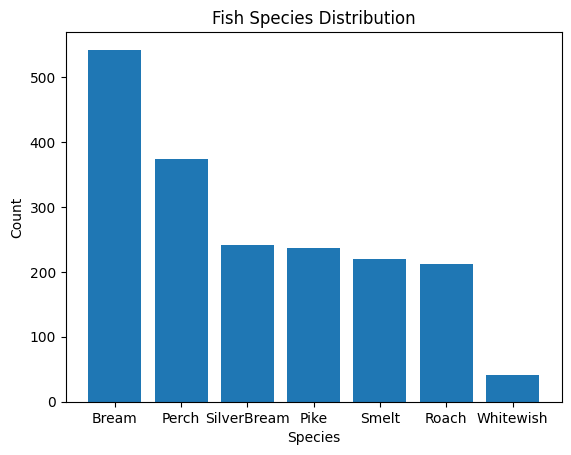

In [8]:

species_counts = fish_y.value_counts()

# Plot the bar chart
plt.bar(species_counts.index, species_counts.values)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Fish Species Distribution')
plt.show()

       Weight         L1         L2         L3     Height      Width Species
1  170.530305  19.323169  22.913269  23.887829  25.233577  14.826372   Perch
2  493.721354  28.299621  31.028229  34.917027  37.856243  13.675772   Bream
3   33.657735  17.435741  18.072636  23.489747  26.765675  13.660683   Roach
4  584.259843  32.491349  33.126297  39.298082  37.610853  13.622560   Bream
5  970.375723  37.122510  39.817489  42.473488  29.878001  17.403387   Perch


C:\Users\Sky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Sky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need 

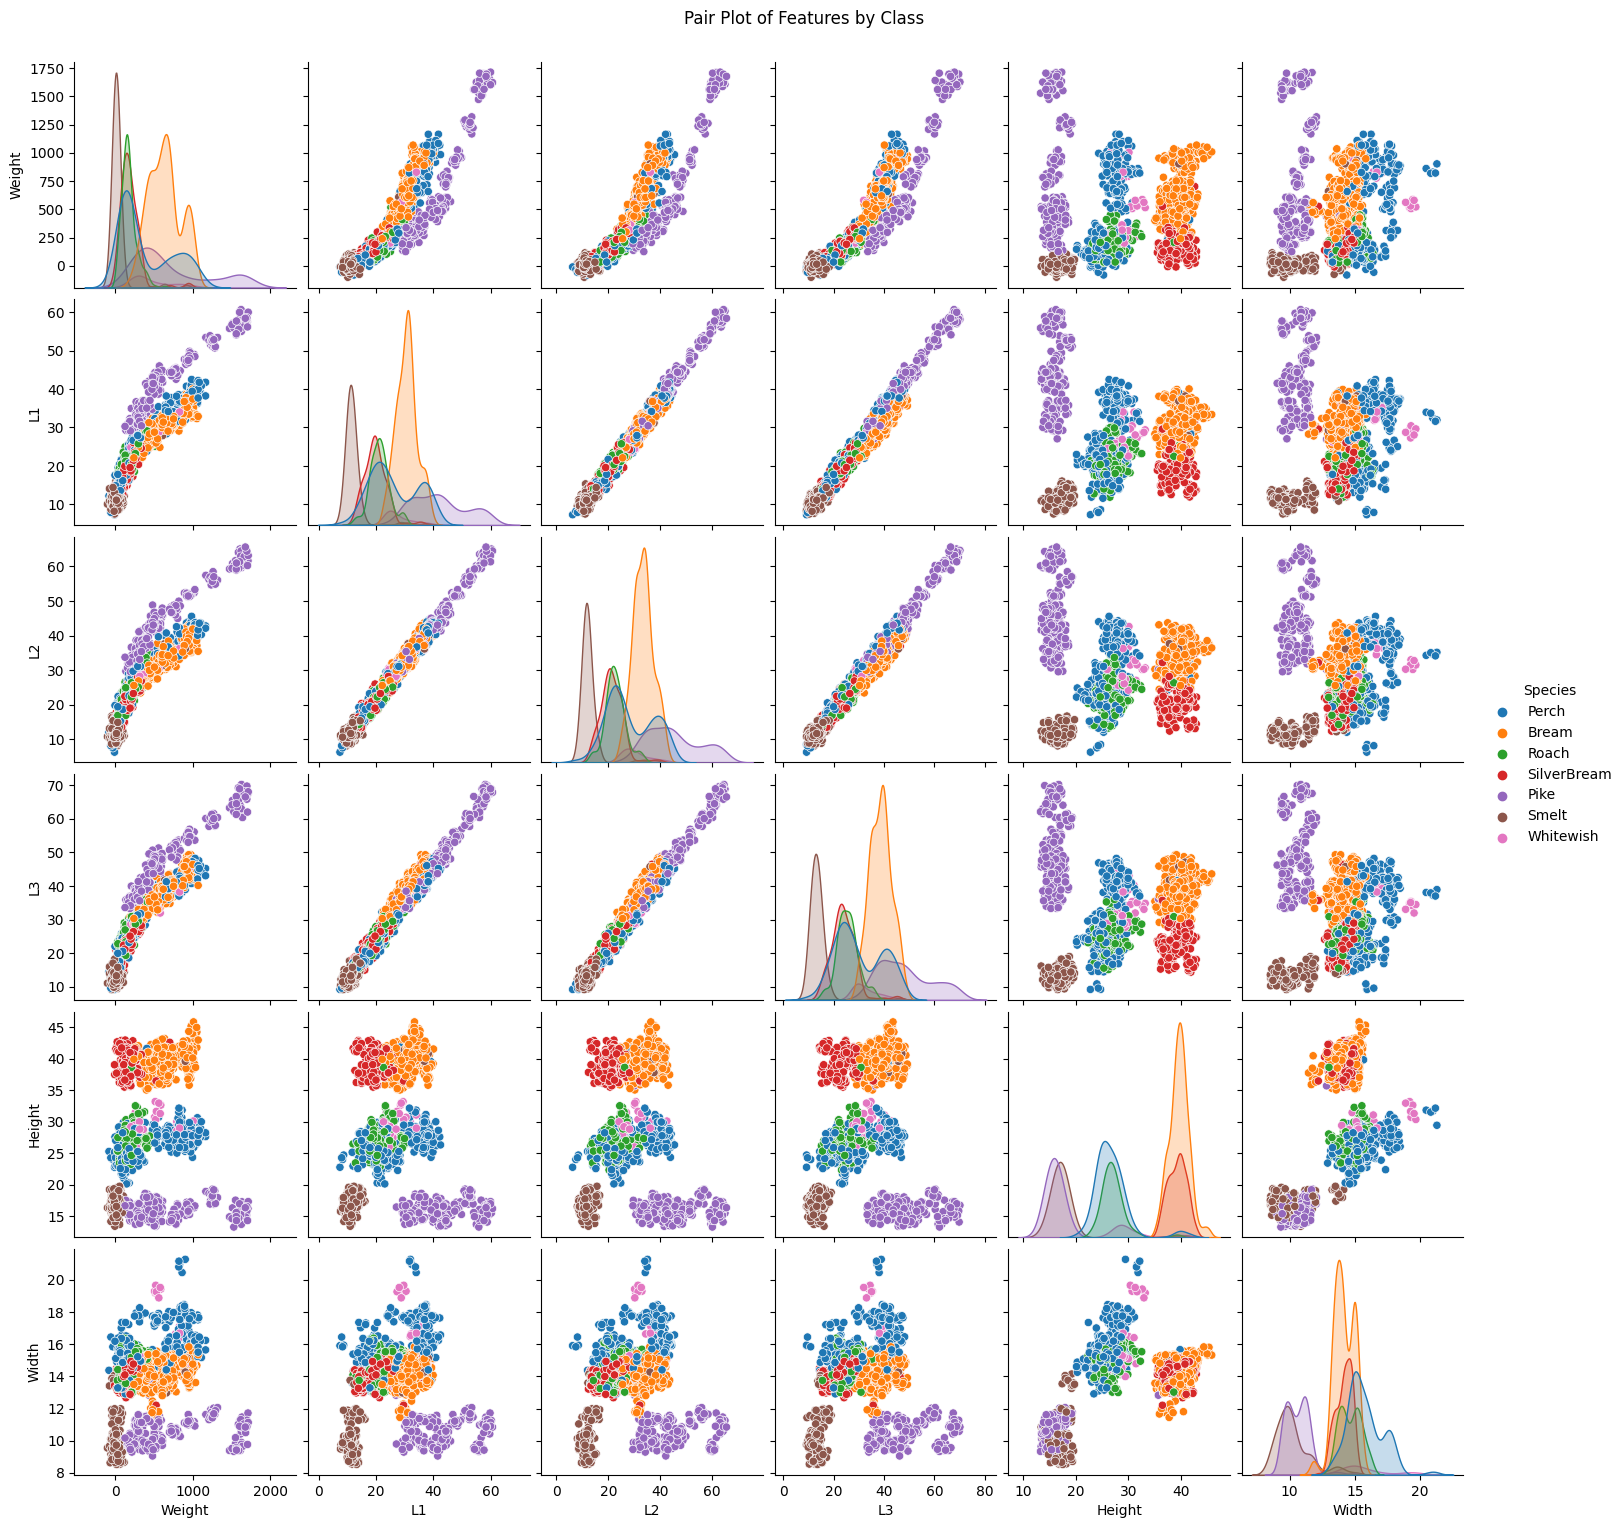

In [9]:
# Combine the features and labels into a single DataFrame
df = pd.concat([fish_X, fish_y], axis=1)

# Pair plot to visualize the distribution and separation of classes
sns.pairplot(df, hue='Species', diag_kind='kde')
plt.suptitle('Pair Plot of Features by Class', y=1.02)
plt.show()

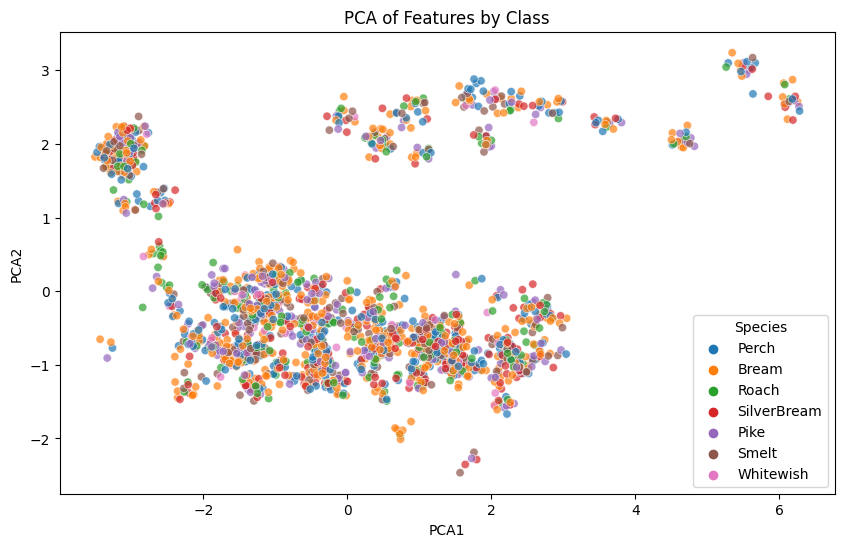

In [9]:
scaler = StandardScaler()
df = pd.concat([fish_X, fish_y], axis=1)
x_scaled = scaler.fit_transform(fish_X)
# PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
components = pca.fit_transform(x_scaled)

pca_df = pd.DataFrame(data=components, columns=['PCA1', 'PCA2'])
pca_df['Species'] = df['Species']

# Scatter plot of the first two PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Species', data=pca_df, alpha=0.7)
plt.title('PCA of Features by Class')
plt.show()

In [ ]:
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(x_scaled)


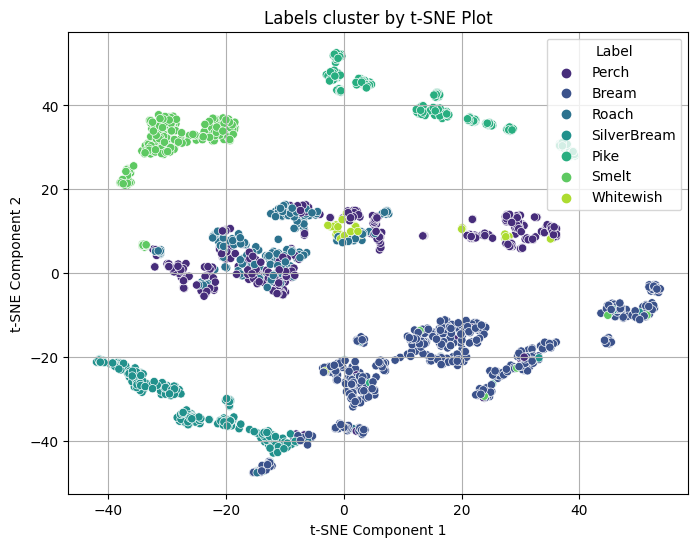

In [16]:
# Create a DataFrame combining the t-SNE components and original labels
tsne_df = pd.DataFrame({'Component 1': tsne_data[:, 0], 'Component 2': tsne_data[:, 1], 'Label': fish_y})

# Plot the data with Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='Component 1', y='Component 2', hue='Label', palette='viridis', legend='full')
plt.title('Labels cluster by t-SNE Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

C:\Users\Sky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


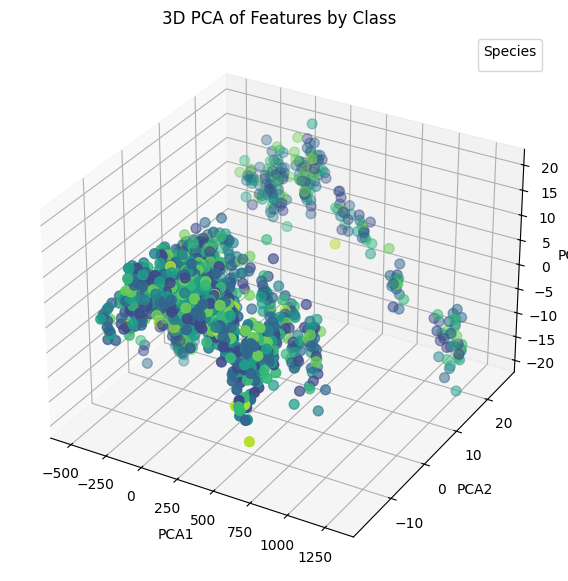

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Assuming df is the combined DataFrame with features and species

# PCA to reduce dimensions to 3 components
pca = PCA(n_components=3)
components = pca.fit_transform(df.drop('Species', axis=1))
pca_df = pd.DataFrame(data=components, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['Species'] = df['Species']

# 3D scatter plot of the three PCA components
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Mapping species to colors
colors = sns.color_palette('viridis', n_colors=len(pca_df['Species'].unique()))
color_dict = dict(zip(pca_df['Species'].unique(), colors))
colors = pca_df['Species'].map(color_dict)

scatter = ax.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'], c=colors, s=50)

# Creating a legend
handles, labels = scatter.legend_elements(prop='colors', alpha=0.6)
legend = ax.legend(handles, pca_df['Species'].unique(), loc='best', title='Species')

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('3D PCA of Features by Class')
plt.show()


# 1a Classification Performance


In [17]:
scaler = StandardScaler()
smote = SMOTE()

x_scaled = scaler.fit_transform(fish_X)

x_resampled_check, y_resampled_check = smote.fit_resample(fish_X,fish_y)



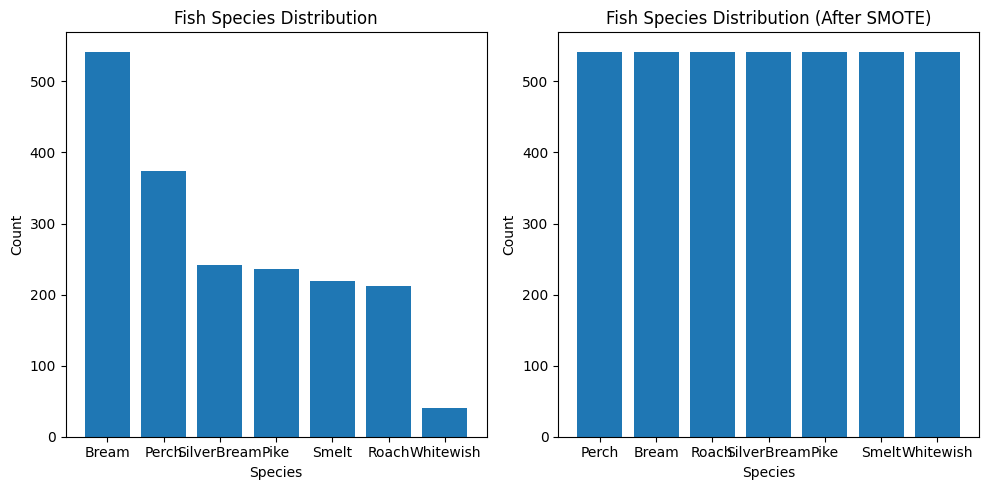

In [28]:

species_counts_resampled = y_resampled_check.value_counts()

species_counts_list = [species_counts,species_counts_resampled ]
plt_idx = 1
plt.figure(figsize=(10,5))
# Plot the bar chart
for idx, c in enumerate(species_counts_list):
    plt.subplot(1, 2,plt_idx)
    plt.bar(c.index, c.values)
    plt.xlabel('Species')
    plt.ylabel('Count')
    if idx == 0:
        plt.title('Fish Species Distribution')
    else:
        plt.title('Fish Species Distribution (After SMOTE)')
    plt_idx +=1
plt.tight_layout()
plt.show()

In [309]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Neural Network": MLPClassifier()
}

param_grids = {
    "Logistic Regression": {
        'clf__C': [0.1, 1, 10],
        'clf__penalty': ['l2']
    },
    "Support Vector Classifier": {
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf']
    },
    "K-Nearest Neighbors": {
        'clf__n_neighbors': [ 5, 10,20,50,100]
    },
    "Decision Tree": {
        'clf__max_depth': [None, 10, 20, 30],
        'clf__min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'clf__n_estimators': [50, 100, 200],
        'clf__max_depth': [None, 10, 20, 30]
    },
    "Neural Network": {
        'clf__activation':['logistic', 'tanh', 'relu'],
        'clf__solver':['sgd','adam']
    }
}


In [295]:
def find_best_param(train_size):
    results = {}
    

    for name, clf in classifiers.items():
        # Create a pipeline
        pipeline = Pipeline([
            ('scaler', StandardScaler()),  # Standardize the data
            ('smote', SMOTE()),  # Handle class imbalance
            ('clf', clf)
        ])
        
        # Define the parameter grid
        param_grid = param_grids[name]
        
        # Create a GridSearchCV object
        grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
        X_train, X_test, y_train, y_test = train_test_split(fish_X, fish_y, train_size=train_size, random_state=42)
        
        # Fit the model   
        grid_search.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = grid_search.predict(X_test) 
        
        
        # Evaluate the model
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
        
        results[name] = {
            "Best Parameters": grid_search.best_params_,
            "Precision": precision,
            "Recall": recall,
            "F1": f1,
        }

    # Display the results
    for name, metrics in results.items():
        print(f"Classifier: {name}")
        for metric, value in metrics.items():
            print(f"{metric}: {value}")
        print("\n" + "="*50 + "\n")


In [ ]:
train_sizes = [0.8]
for train in train_sizes:
    print(f"********************** Training size : {train} *******************")
    find_best_param(train)
    print("\n" + "="*50 + "\n")

### Oversampling: SMOTE
SMOTE (Synthetic Minority Oversampling Technique) : is used to generate artificial/synthetic samples for the minority class.

In [359]:
def classifer_over_sampling_with_grid(name,clf, train_size,X,y):

    param_grids = {
    "Gradient Boosting": {
        'clf__n_estimators': [50, 100, 200],
        'clf__max_depth': [None, 10, 20, 30]
    },
    "Support Vector Classifier": {
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf']
    },
    "K-Nearest Neighbors": {
        'clf__n_neighbors': [ 5, 10,20,50,100]
    },
    "Decision Tree": {
        'clf__max_depth': [None, 10, 20, 30],
        'clf__min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'clf__n_estimators': [50, 100, 200],
        'clf__max_depth': [None, 10, 20, 30]
    },
    "Neural Network": {
        'clf__activation':['logistic', 'tanh', 'relu'],
        'clf__solver':['lbfgs','adam']
    }
    }
    
    report_metrics = {
        "precision_weighted": [],
        "recall_weighted": [],
        "f1_weighted": [],
        "cohen_kappa_score":[]
    }
    
    
    pipeline = Pipeline([
            ('scaler', StandardScaler()),  # Standardize the data
            ('smote', SMOTE()),  # Handle class imbalance with oversampling
            ('clf', clf)
        ])
        
    
    # Define the parameter grid
    param_grid = param_grids[name]
    
    # Create a GridSearchCV object
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)

    n_split_times = 10
    kappa_score_list=[]
    precision_list = []
    recall_list = []
    f1_list = []
    for n in range(n_split_times):    
        # Split the dataset
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)
    
        
        # Fit the model   
        grid_search.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = grid_search.predict(X_test)

        kappa_score = cohen_kappa_score(y_test,y_pred)
        # Precision, Recall, F1-Score (weighted - to account for imbalance)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

        kappa_score_list.append(kappa_score)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
    
    # Compute average
    kappa_score_avg = np.mean(np.array(kappa_score_list))
    precision_avg = np.mean(np.array(precision_list))
    recall_avg = np.mean(np.array(recall_list))
    f1_avg = np.mean(np.array(f1_list))

    # Accumulate the metrics
    report_metrics["precision_weighted"].append(precision_avg)
    report_metrics["recall_weighted"].append(recall_avg)
    report_metrics["f1_weighted"].append(f1_avg)
    report_metrics["cohen_kappa_score"].append(kappa_score_avg)
        
    # Retrieve the best parameters
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)
    print('-------------------------------------')
    # Print the results
    print(f"cohen_kappa_score : {kappa_score_avg:.5f}")
    print(f"precision : {precision_avg:.5f}")
    print(f"recall : {recall_avg:.5f}")
    print(f"f1 : {f1_avg:.5f}")
    # print(classification_report_)
    
    return report_metrics
      
    


In [360]:
classifiers = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}
report_metric_clf = {
    "Gradient Boosting": [],
    "Support Vector Classifier": [],
    "K-Nearest Neighbors": [],
    "Decision Tree": [],
    "Random Forest": [],
    "Neural Network": []
    }

for name, clf in classifiers.items():
    print(f"Classifier: {clf.__class__.__name__}")
    print(" -----------Over sampling---------- ")
    report_metric = classifer_over_sampling_with_grid(name,clf, train_size=0.8, X=fish_X, y=fish_y)
    report_metric_clf[name].append(report_metric)
    print("\n" + "="*50 + "\n")

Classifier: GradientBoostingClassifier
 -----------Over sampling---------- 
Best Parameters: {'clf__max_depth': 10, 'clf__n_estimators': 200}
-------------------------------------
cohen_kappa_score : 0.88994
precision : 0.91454
recall : 0.91016
f1 : 0.91055


Classifier: SVC
 -----------Over sampling---------- 
Best Parameters: {'clf__C': 10, 'clf__kernel': 'rbf'}
-------------------------------------
cohen_kappa_score : 0.88041
precision : 0.91120
recall : 0.90267
f1 : 0.90391


Classifier: KNeighborsClassifier
 -----------Over sampling---------- 
Best Parameters: {'clf__n_neighbors': 10}
-------------------------------------
cohen_kappa_score : 0.89314
precision : 0.92070
recall : 0.91283
f1 : 0.91390


Classifier: DecisionTreeClassifier
 -----------Over sampling---------- 
Best Parameters: {'clf__max_depth': 10, 'clf__min_samples_split': 5}
-------------------------------------
cohen_kappa_score : 0.82758
precision : 0.86391
recall : 0.85882
f1 : 0.85956


Classifier: RandomForestCl

In [293]:
classifiers = {
    "Logistic Regression": LogisticRegression(penalty='l2',max_iter=1000,solver='lbfgs'),
    "Support Vector Classifier": SVC(kernel='rbf'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5),
    "Random Forest": RandomForestClassifier(max_depth=30, n_estimators=200),
    "Naive Bayes": GaussianNB()
}

# metrics for store result
metrics = {
    "Logistic Regression": [],
    "Support Vector Classifier": [],
    "K-Nearest Neighbors":[] ,
    "Decision Tree":[] ,
    "Random Forest":[],
    "Naive Bayes": []
}

# Perform classification for each training size


for name, clf in classifiers.items():
    print(f"Classifier: {clf.__class__.__name__}")
    print(" -----------Over sampling---------- ")
    classifer_over_sampling(clf, train_size=0.8, X=fish_X, y=fish_y)
    print("\n" + "="*50 + "\n")


Classifier: LogisticRegression
 -----------Over sampling---------- 
cohen_kappa_score : 0.78999
              precision    recall  f1-score   support

       Bream       0.91      0.94      0.92       110
       Perch       0.85      0.62      0.72        76
        Pike       1.00      0.98      0.99        41
       Roach       0.59      0.85      0.69        39
 SilverBream       0.88      0.94      0.91        53
       Smelt       0.98      0.96      0.97        46
   Whitewish       0.12      0.11      0.12         9

    accuracy                           0.85       374
   macro avg       0.76      0.77      0.76       374
weighted avg       0.86      0.85      0.85       374



Classifier: SVC
 -----------Over sampling---------- 
cohen_kappa_score : 0.83567
              precision    recall  f1-score   support

       Bream       0.95      0.93      0.94       113
       Perch       0.90      0.68      0.77        65
        Pike       1.00      0.95      0.98        44
       

In [97]:
def plot_confusion_matrix(overall_conf_matrix):
    label_encoder = LabelEncoder()
    fish_y_encoded = label_encoder.fit_transform(fish_y)
    class_labels = label_encoder.classes_

    
    plt.figure(figsize=(8, 5))
    # Create a DataFrame for the coefficients
    conf_df = pd.DataFrame(overall_conf_matrix, columns=class_labels, index=class_labels)
    
    sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues', cbar_kws={'format': '%d'})
    
    plt.xlabel('Predicted')
    plt.ylabel('True')


    # Ensure all cells including zero values are annotated
    for i in range(overall_conf_matrix.shape[0]):
        for j in range(overall_conf_matrix.shape[1]):
            plt.text(j + 0.5, i + 0.5, overall_conf_matrix[i, j], 
                     horizontalalignment='center',
                     verticalalignment='center',
                     color='black')

    plt.show()

In [106]:
def classifier_over_sampling(name, clf, X, y, splits=5):

    report_metrics = {
        "precision_weighted": [],
        "recall_weighted": [],
        "f1_weighted": [],
        "cohen_kappa_score": [],
        "overall_sensitivity": [],
        "overall_specificity": [],
        "class_sensitivity": [],
        "class_specificity": []
    }

    pipeline = ImbPipeline([
        ('scaler', StandardScaler()),  # Standardize the data
        ('smote', SMOTE(random_state=42)),  # Handle class imbalance with oversampling
        ('clf', clf)
    ])

   
    kappa_score_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    overall_sensitivity_list = []
    overall_specificity_list = []
    class_sensitivity_list = []
    class_specificity_list = []


    skf = StratifiedKFold(n_splits=splits, shuffle=True, random_state=42)
    
    
    i = 0
    for train_index, test_index in tqdm(skf.split(X, y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the model
        pipeline.fit(X_train, y_train)

        # Predict on the test set
        y_pred = pipeline.predict(X_test)

        kappa_score = cohen_kappa_score(y_test, y_pred)
        # Precision, Recall, F1-Score (weighted - to account for imbalance)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

        # Confusion Matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        if i == 0:
            plot_confusion_matrix(conf_matrix)   

        # Overall Sensitivity (Recall)
        overall_sensitivity = recall_score(y_test, y_pred, average='weighted')

        # Overall Specificity
        TN = conf_matrix.sum() - (conf_matrix.sum(axis=1) - conf_matrix.diagonal()) - (conf_matrix.sum(axis=0) - conf_matrix.diagonal()) + conf_matrix.diagonal()
        FP = conf_matrix.sum(axis=0) - conf_matrix.diagonal()
        overall_specificity = (TN / (TN + FP)).mean()

        # Sensitivity and Specificity for each class
        class_sensitivity = []
        class_specificity = []
        for i in range(len(conf_matrix)):
            TP = conf_matrix[i, i]
            FN = conf_matrix[i, :].sum() - TP
            TN = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - TP)
            FP = conf_matrix[:, i].sum() - TP
            sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
            specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
            class_sensitivity.append(sensitivity)
            class_specificity.append(specificity)

        kappa_score_list.append(kappa_score)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        overall_sensitivity_list.append(overall_sensitivity)
        overall_specificity_list.append(overall_specificity)
        class_sensitivity_list.append(class_sensitivity)
        class_specificity_list.append(class_specificity)
        i+=1
        

    # Compute average
    kappa_score_avg = np.mean(np.array(kappa_score_list))
    precision_avg = np.mean(np.array(precision_list))
    recall_avg = np.mean(np.array(recall_list))
    f1_avg = np.mean(np.array(f1_list))
    overall_sensitivity_avg = np.mean(np.array(overall_sensitivity_list))
    overall_specificity_avg = np.mean(np.array(overall_specificity_list))
    class_sensitivity_avg = np.mean(np.array(class_sensitivity_list), axis=0)
    class_specificity_avg = np.mean(np.array(class_specificity_list), axis=0)
    # Accumulate the metrics
    report_metrics["precision_weighted"].append(precision_avg)
    report_metrics["recall_weighted"].append(recall_avg)
    report_metrics["f1_weighted"].append(f1_avg)
    report_metrics["cohen_kappa_score"].append(kappa_score_avg)
    report_metrics["overall_sensitivity"].append(overall_sensitivity_avg)
    report_metrics["overall_specificity"].append(overall_specificity_avg)
    report_metrics["class_sensitivity"].append(class_sensitivity_avg)
    report_metrics["class_specificity"].append(class_specificity_avg)

    
    print('-------------------------------------')
    # Print the results
    print(f"cohen_kappa_score : {kappa_score_avg:.5f}")
    print(f"precision : {precision_avg:.5f}")
    print(f"recall : {recall_avg:.5f}")
    print(f"f1 : {f1_avg:.5f}")
    print(f"overall_sensitivity : {overall_sensitivity_avg:.5f}")
    print(f"overall_specificity : {overall_specificity_avg:.5f}")
    print(f"class_sensitivity : {class_sensitivity_avg}")
    print(f"class_specificity : {class_specificity_avg}")

    return report_metrics

Classifier: KNeighborsClassifier


0it [00:00, ?it/s]

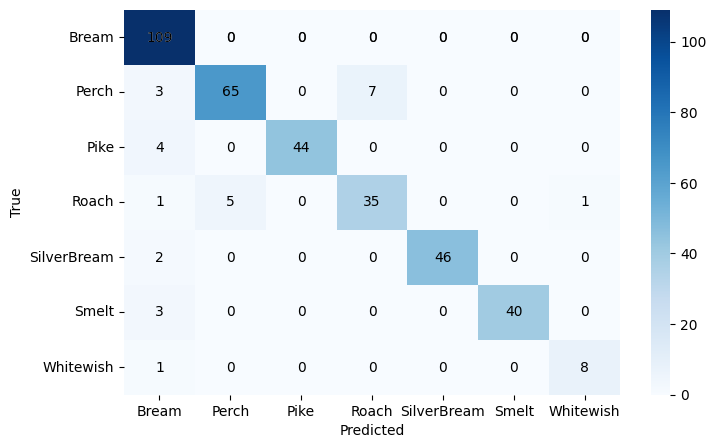

5it [00:00,  7.96it/s]


-------------------------------------
cohen_kappa_score : 0.90088
precision : 0.92729
recall : 0.91907
f1 : 0.91989
overall_sensitivity : 0.91907
overall_specificity : 0.98970
class_sensitivity : [0.98525314 0.77527928 0.97056738 0.83466224 0.96692177 0.97241015
 0.92777778]
class_specificity : [0.96827902 0.98391057 1.         0.96612644 0.99876543 0.9993921
 0.98575342]


Classifier: GradientBoostingClassifier


0it [00:00, ?it/s]

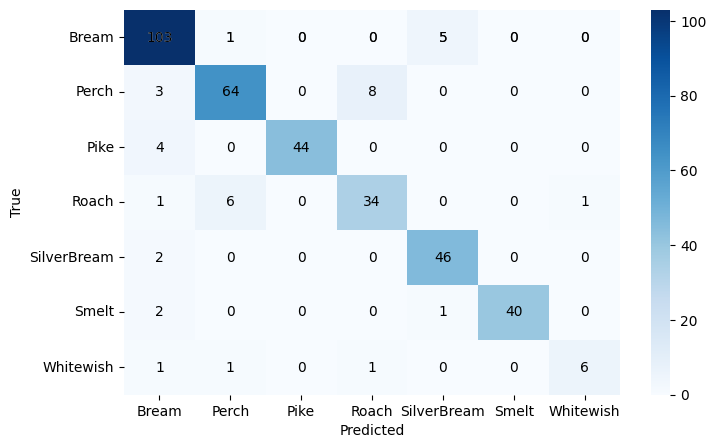

5it [05:40, 68.05s/it]


-------------------------------------
cohen_kappa_score : 0.88892
precision : 0.91220
recall : 0.90944
f1 : 0.90971
overall_sensitivity : 0.90944
overall_specificity : 0.98848
class_sensitivity : [0.95759429 0.8101982  0.97056738 0.82513843 0.9545068  0.97241015
 0.65833333]
class_specificity : [0.96903373 0.97318354 1.         0.96734404 0.99138834 0.99817629
 0.99068493]


Classifier: SVC


0it [00:00, ?it/s]

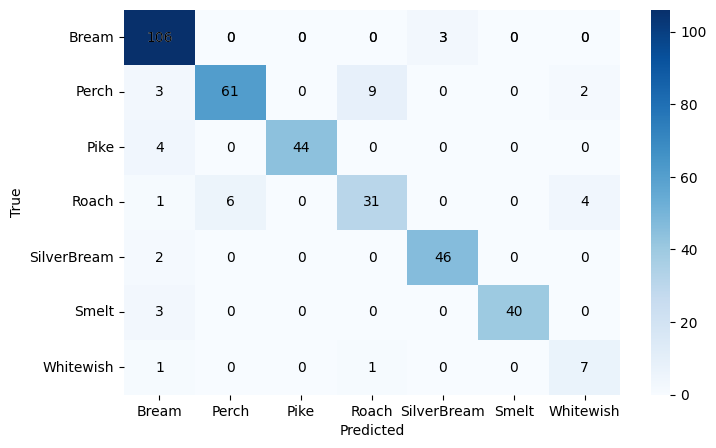

5it [00:01,  3.71it/s]


-------------------------------------
cohen_kappa_score : 0.86893
precision : 0.90398
recall : 0.89282
f1 : 0.89411
overall_sensitivity : 0.89282
overall_specificity : 0.98602
class_sensitivity : [0.97787971 0.71906306 0.97056738 0.73089701 0.96692177 0.97241015
 0.88055556]
class_specificity : [0.96827902 0.97720141 1.         0.95705747 0.99322883 1.
 0.9769863 ]


Classifier: DecisionTreeClassifier


0it [00:00, ?it/s]

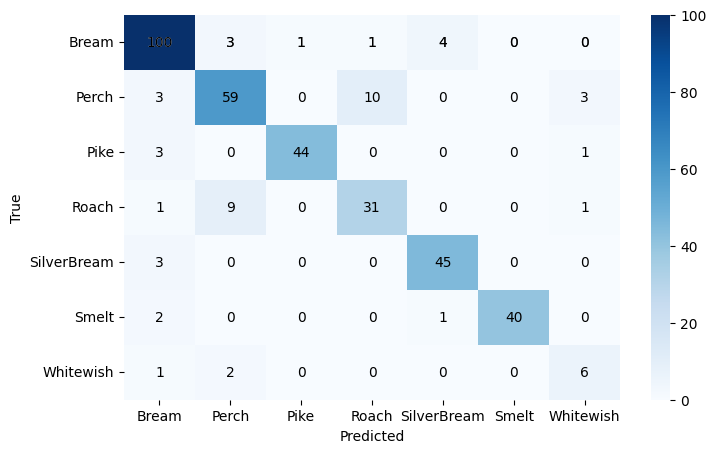

5it [00:01,  4.97it/s]


-------------------------------------
cohen_kappa_score : 0.85582
precision : 0.88758
recall : 0.88211
f1 : 0.88370
overall_sensitivity : 0.88211
overall_specificity : 0.98475
class_sensitivity : [0.91326877 0.78342342 0.97056738 0.75470653 0.94617347 0.97241015
 0.65833333]
class_specificity : [0.96752716 0.96113219 0.99631902 0.96311075 0.99077297 0.99635258
 0.9830137 ]


Classifier: RandomForestClassifier


0it [00:00, ?it/s]

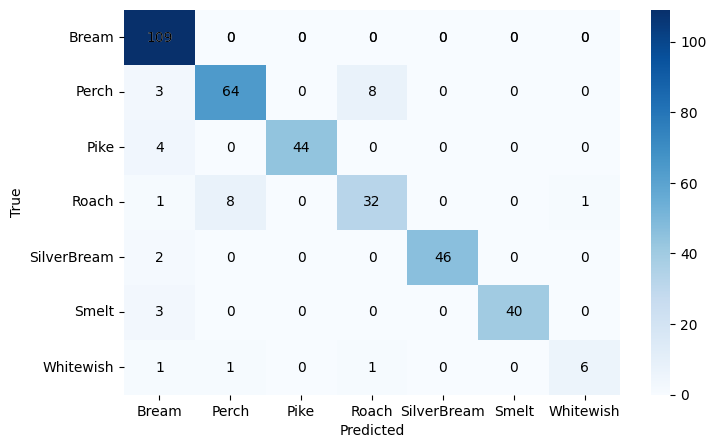

5it [00:18,  3.61s/it]


-------------------------------------
cohen_kappa_score : 0.90445
precision : 0.92353
recall : 0.92230
f1 : 0.92189
overall_sensitivity : 0.92230
overall_specificity : 0.99025
class_sensitivity : [0.98525314 0.83156757 0.97056738 0.81572536 0.96692177 0.97241015
 0.65833333]
class_specificity : [0.96827902 0.97519472 1.         0.96977194 0.99630199 1.
 0.99452055]


Classifier: MLPClassifier


0it [00:00, ?it/s]

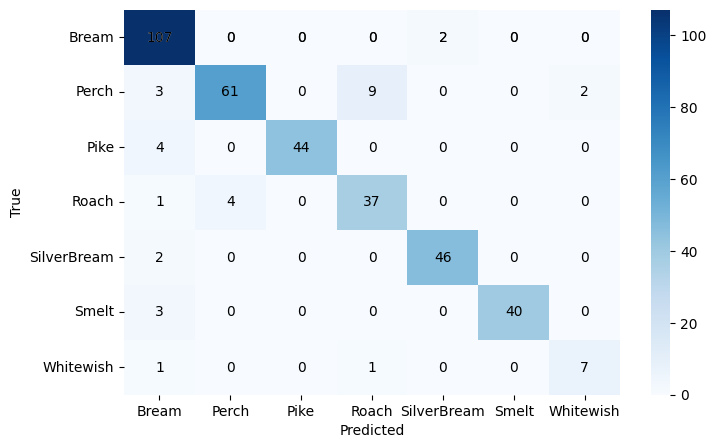

5it [00:48,  9.78s/it]

-------------------------------------
cohen_kappa_score : 0.89089
precision : 0.91755
recall : 0.91104
f1 : 0.91181
overall_sensitivity : 0.91104
overall_specificity : 0.98868
class_sensitivity : [0.97607883 0.79927928 0.97056738 0.78294574 0.9627551  0.97241015
 0.75555556]
class_specificity : [0.9675243  0.97384122 1.         0.96795192 0.99568849 1.
 0.98684932]




In [107]:
classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10),
    "Gradient Boosting": GradientBoostingClassifier(max_depth=10, n_estimators=200),
    "Support Vector Classifier": SVC(C=10, kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5),
    "Random Forest": RandomForestClassifier(max_depth=30, n_estimators=200),
    "Neural Network": MLPClassifier(max_iter=1000, activation='relu',solver='adam')
}
report_metric_clf = {
    "K-Nearest Neighbors": [],
    "Gradient Boosting": [],
    "Support Vector Classifier": [],
    "Decision Tree": [],
    "Random Forest": [],
    "Neural Network": []
    }

for name, clf in classifiers.items():
    print(f"Classifier: {clf.__class__.__name__}")
    report_metric = classifier_over_sampling(name,clf, X=fish_X, y=fish_y)
    report_metric_clf[name].append(report_metric)
    print("\n" + "="*50 + "\n")

In [172]:
# Manually save result
result = {
    0.2: {
        'Logistic Regression': {'precision_weighted': 0.86243, 'recall_weighted': 0.85124, 'f1_weighted': 0.85400},
        'SVC': {'precision_weighted': 0.88899, 'recall_weighted': 0.88139, 'f1_weighted': 0.88262},
        'KNeighborsClassifier': {'precision_weighted': 0.87292, 'recall_weighted': 0.86539, 'f1_weighted': 0.86661},
        'DecisionTreeClassifier': {'precision_weighted': 0.83908, 'recall_weighted': 0.83372, 'f1_weighted': 0.83483},
        'RandomForestClassifier': {'precision_weighted': 0.87271, 'recall_weighted': 0.87146, 'f1_weighted': 0.87073},
        'GaussianNB': {'precision_weighted': 0.85118, 'recall_weighted': 0.80423, 'f1_weighted': 0.79824}
    },
    0.5: {
        'Logistic Regression': {'precision_weighted': 0.84349, 'recall_weighted': 0.82919, 'f1_weighted': 0.83281},
        'SVC': {'precision_weighted': 0.90351, 'recall_weighted': 0.90098, 'f1_weighted': 0.90118},
        'KNeighborsClassifier': {'precision_weighted': 0.90621, 'recall_weighted': 0.90323, 'f1_weighted': 0.90329},
        'DecisionTreeClassifier': {'precision_weighted': 0.86431, 'recall_weighted': 0.86212, 'f1_weighted': 0.86258},
        'RandomForestClassifier': {'precision_weighted': 0.91533, 'recall_weighted': 0.91447, 'f1_weighted': 0.91415},
        'GaussianNB': {'precision_weighted': 0.86397, 'recall_weighted': 0.78841, 'f1_weighted': 0.77268}
    },
    0.8: {
        'Logistic Regression': {'precision_weighted': 0.82440, 'recall_weighted': 0.80837, 'f1_weighted': 0.81129},
        'SVC': {'precision_weighted': 0.90580, 'recall_weighted': 0.89963, 'f1_weighted': 0.90026},
        'KNeighborsClassifier': {'precision_weighted': 0.93297, 'recall_weighted': 0.93067, 'f1_weighted': 0.93047},
        'DecisionTreeClassifier': {'precision_weighted': 0.88546, 'recall_weighted': 0.88310, 'f1_weighted': 0.88321},
        'RandomForestClassifier': {'precision_weighted': 0.92214, 'recall_weighted': 0.92163, 'f1_weighted': 0.92109},
        'GaussianNB': {'precision_weighted': 0.87453, 'recall_weighted': 0.80730, 'f1_weighted': 0.79406}
    },
    0.95: {
        'Logistic Regression': {'precision_weighted': 0.88737, 'recall_weighted': 0.88202, 'f1_weighted': 0.88100},
        'SVC': {'precision_weighted': 0.95249, 'recall_weighted': 0.95096, 'f1_weighted': 0.95037},
        'KNeighborsClassifier': {'precision_weighted': 0.97226, 'recall_weighted': 0.97128, 'f1_weighted': 0.97103},
        'DecisionTreeClassifier': {'precision_weighted': 0.90609, 'recall_weighted': 0.89979, 'f1_weighted': 0.89821},
        'RandomForestClassifier': {'precision_weighted': 0.94911, 'recall_weighted': 0.94564, 'f1_weighted': 0.94516},
        'GaussianNB': {'precision_weighted': 0.88121, 'recall_weighted': 0.85351, 'f1_weighted': 0.84128}
    }
}

training_sizes = sorted(result.keys())
classifiers = result[0.2].keys()


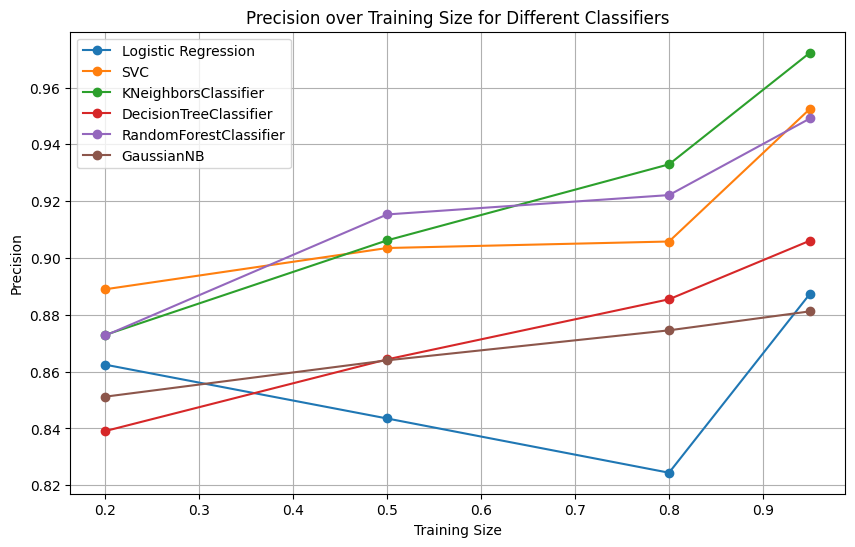

In [173]:
# Plot precision
plt.figure(figsize=(10, 6))

for clf in classifiers:
    precision_means = [result[size][clf]['precision_weighted'] for size in training_sizes]
    plt.plot(training_sizes, precision_means, marker='o', label=clf)

plt.xlabel('Training Size')
plt.ylabel('Precision')
plt.title('Precision over Training Size for Different Classifiers')
plt.legend()
plt.grid(True)
plt.show()

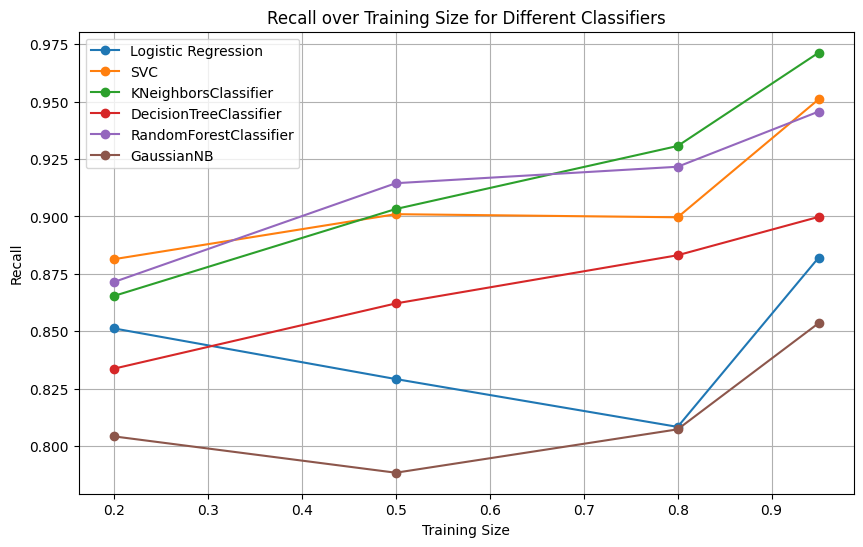

In [174]:
# Plot Recall
plt.figure(figsize=(10, 6))

for clf in classifiers:
    precision_means = [result[size][clf]['recall_weighted'] for size in training_sizes]
    plt.plot(training_sizes, precision_means, marker='o', label=clf)

plt.xlabel('Training Size')
plt.ylabel('Recall')
plt.title('Recall over Training Size for Different Classifiers')
plt.legend()
plt.grid(True)
plt.show()

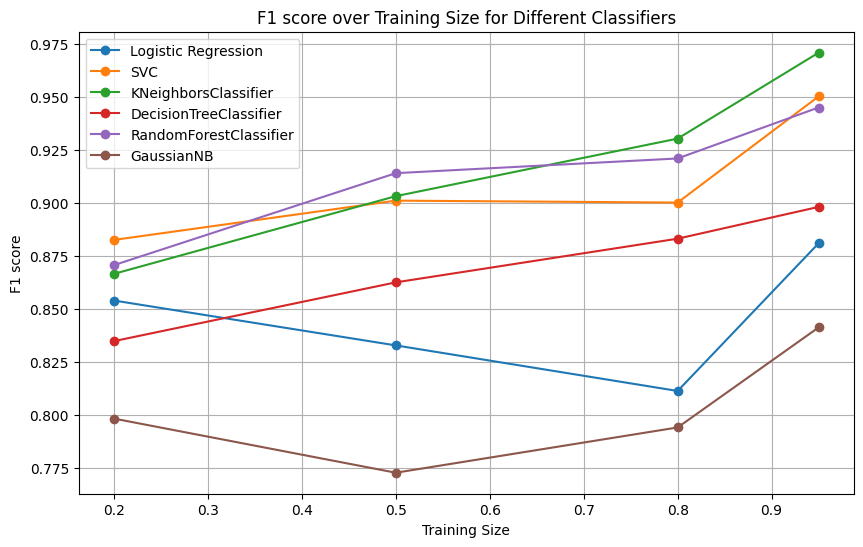

In [175]:
# Plot F1 score
plt.figure(figsize=(10, 6))

for clf in classifiers:
    precision_means = [result[size][clf]['f1_weighted'] for size in training_sizes]
    plt.plot(training_sizes, precision_means, marker='o', label=clf)

plt.xlabel('Training Size')
plt.ylabel('F1 score')
plt.title('F1 score over Training Size for Different Classifiers')
plt.legend()
plt.grid(True)
plt.show()

# 1b Feature Selection

In [181]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fish_X, fish_y, train_size=0.8, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [184]:
# Find best parameters for RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(fish_X, fish_y, train_size=0.8, random_state=42)
# Define a Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define a parameter grid for grid search
param_grid = {
    'n_estimators': [25,50,100, 150],  # Number of trees
    
}

# Set up GridSearchCV with cross-validation and a scoring method (e.g., accuracy)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',  # You can choose other metrics like F1-score, precision, etc.
    cv=5,  # Number of cross-validation folds
    verbose=1,  # Print progress during grid search
    n_jobs=-1  # Use multiple cores for faster execution
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train a model with the best parameters
best_rf = grid_search.best_estimator_

# Test the model on the test set
y_pred = best_rf.predict(X_test)

# Calculate accuracy or other metrics
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'n_estimators': 100}
Test Set Accuracy: 0.9037433155080213


In [183]:
# Find best parameters for RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(fish_X, fish_y, train_size=0.8, random_state=42)
# Define a Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

# Define a parameter grid for grid search
param_grid = {
    'n_estimators': [50,100,120,150]  # Number of trees
    
}

# Set up GridSearchCV with cross-validation and a scoring method (e.g., accuracy)
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='accuracy',  # You can choose other metrics like F1-score, precision, etc.
    cv=5,  # Number of cross-validation folds
    verbose=1,  # Print progress during grid search
    n_jobs=-1  # Use multiple cores for faster execution
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train a model with the best parameters
best_gb = grid_search.best_estimator_

# Test the model on the test set
y_pred = best_gb.predict(X_test)

# Calculate accuracy or other metrics
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'n_estimators': 100}
Test Set Accuracy: 0.8957219251336899


RandomForestClassifer Classification Report
              precision    recall  f1-score   support

       Bream       0.94      0.97      0.96       110
       Perch       0.89      0.85      0.87        74
        Pike       1.00      0.98      0.99        41
       Roach       0.79      0.83      0.81        46
 SilverBream       0.95      0.96      0.96        56
       Smelt       1.00      1.00      1.00        38
   Whitewish       1.00      0.67      0.80         9

    accuracy                           0.93       374
   macro avg       0.94      0.89      0.91       374
weighted avg       0.93      0.93      0.92       374



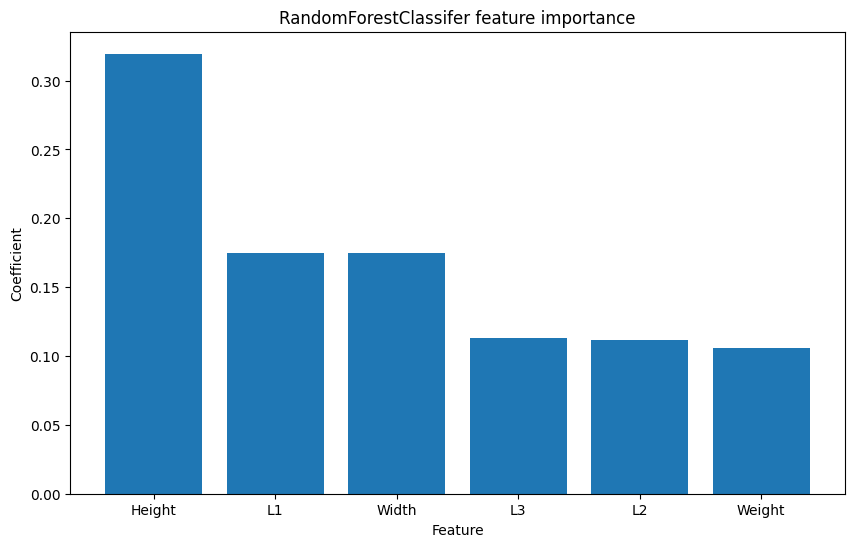

In [275]:
# RandomForestClassifer
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(fish_X, fish_y, train_size=0.8, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)


best_rf.fit(X_resampled, y_resampled)

# Get feature importances
importances_rf = best_rf.feature_importances_


# Classification report
rf_predictions = best_rf.predict(X_test_scaled)
print("RandomForestClassifer Classification Report")
print(classification_report(y_test, rf_predictions))

importance_sorted_indices = np.argsort(importances_rf)[::-1]
sorted_features = X_train.columns[importance_sorted_indices]
sorted_importance = importances_rf[importance_sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importance)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('RandomForestClassifer feature importance')
plt.show()

GradientBoostingClassifier Classification Report
              precision    recall  f1-score   support

       Bream       0.93      0.93      0.93       110
       Perch       0.83      0.84      0.83        74
        Pike       1.00      0.98      0.99        41
       Roach       0.75      0.72      0.73        46
 SilverBream       0.90      0.93      0.91        56
       Smelt       0.97      1.00      0.99        38
   Whitewish       0.88      0.78      0.82         9

    accuracy                           0.89       374
   macro avg       0.89      0.88      0.89       374
weighted avg       0.89      0.89      0.89       374



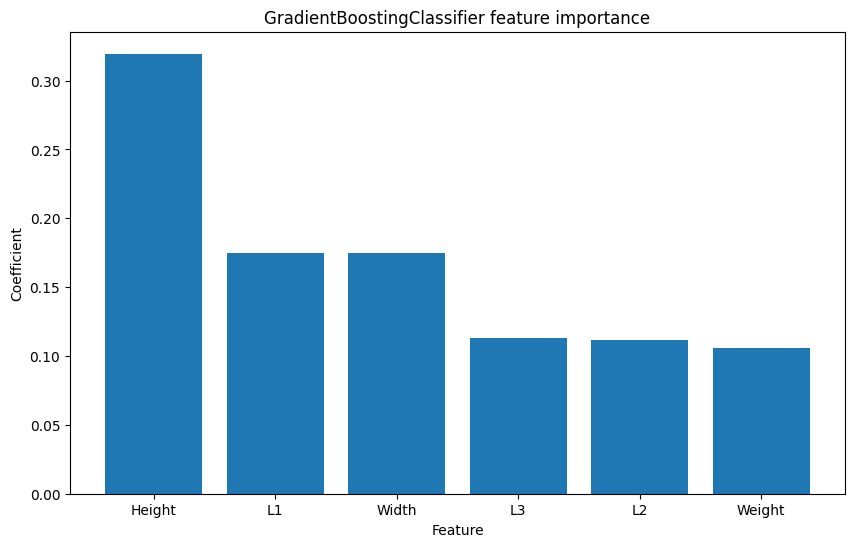

In [270]:
# GradientBoostingClassifier
# Initialize the classifier

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(fish_X, fish_y, train_size=0.8, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

best_gb.fit(X_resampled, y_resampled)

# Get feature importances
importances_gb = best_rf.feature_importances_


# Classification report
gb_predictions = best_gb.predict(X_test_scaled)

print("GradientBoostingClassifier Classification Report")
print(classification_report(y_test, gb_predictions))

importance_sorted_indices = np.argsort(importances_gb)[::-1]
sorted_features = X_train.columns[importance_sorted_indices]
sorted_importance = importances_gb[importance_sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importance)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('GradientBoostingClassifier feature importance')
plt.show()

LASSO Logistic Regression Classification Report
              precision    recall  f1-score   support

       Bream       0.95      0.92      0.94       110
       Perch       0.75      0.53      0.62        74
        Pike       0.98      0.98      0.98        41
       Roach       0.55      0.63      0.59        46
 SilverBream       0.86      0.96      0.91        56
       Smelt       0.93      1.00      0.96        38
   Whitewish       0.17      0.33      0.22         9

    accuracy                           0.81       374
   macro avg       0.74      0.76      0.74       374
weighted avg       0.83      0.81      0.82       374



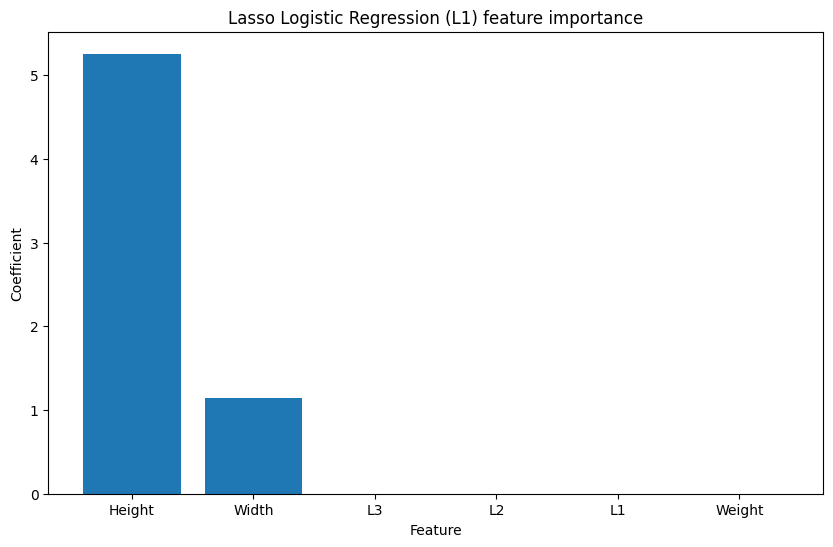

In [135]:
#LASSO
label_encoder = LabelEncoder()
fish_y_encoded = label_encoder.fit_transform(fish_y)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(fish_X, fish_y, train_size=0.8, random_state=42)
# Standardize the features



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)


# Lasso Logistic Regression (L1)
lasso_model = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)
lasso_model.fit(X_resampled, y_resampled)

# coefficients
lasso_coefficients = np.abs(lasso_model.coef_[0])

# Classification report
lasso_predictions = lasso_model.predict(X_test_scaled)

print("LASSO Logistic Regression Classification Report")
print(classification_report(y_test, lasso_predictions))

importance_sorted_indices = np.argsort(lasso_coefficients)[::-1]
sorted_features = X_train.columns[importance_sorted_indices]
sorted_importance = lasso_coefficients[importance_sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importance)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Lasso Logistic Regression (L1) feature importance')
plt.show()

Ridge Logistic Regression Classification Report
              precision    recall  f1-score   support

       Bream       0.95      0.93      0.94       110
       Perch       0.76      0.53      0.62        74
        Pike       1.00      0.98      0.99        41
       Roach       0.56      0.65      0.60        46
 SilverBream       0.86      0.96      0.91        56
       Smelt       0.95      1.00      0.97        38
   Whitewish       0.16      0.33      0.21         9

    accuracy                           0.82       374
   macro avg       0.75      0.77      0.75       374
weighted avg       0.84      0.82      0.82       374



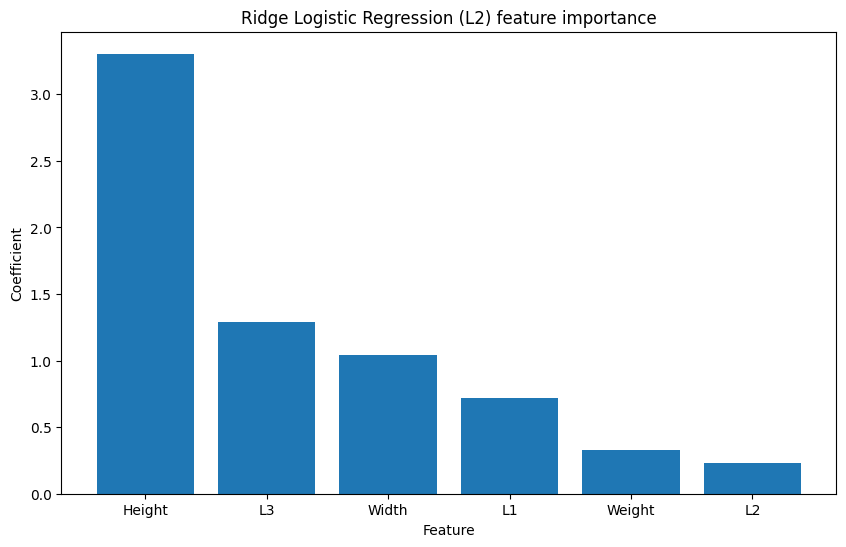

In [136]:
#RIDGE
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(fish_X, fish_y, train_size=0.8, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)


# Ridge Logistic Regression (L2)
ridge_model = LogisticRegression(penalty='l2', solver='saga', max_iter=10000)
ridge_model.fit(X_resampled, y_resampled)

# coefficients, heatmap
ridge_coefficients = np.abs(ridge_model.coef_[0])

# Classification report
ridge_predictions = ridge_model.predict(X_test_scaled)

print("Ridge Logistic Regression Classification Report")
print(classification_report(y_test, ridge_predictions))

importance_sorted_indices = np.argsort(ridge_coefficients)[::-1]
sorted_features = X_train.columns[importance_sorted_indices]
sorted_importance = ridge_coefficients[importance_sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importance)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Ridge Logistic Regression (L2) feature importance')
plt.show()

ElasticNet Logistic Regression (L1 and L2) Classification Report
              precision    recall  f1-score   support

       Bream       0.95      0.93      0.94       110
       Perch       0.75      0.53      0.62        74
        Pike       1.00      0.98      0.99        41
       Roach       0.55      0.63      0.59        46
 SilverBream       0.86      0.96      0.91        56
       Smelt       0.95      1.00      0.97        38
   Whitewish       0.16      0.33      0.21         9

    accuracy                           0.82       374
   macro avg       0.75      0.77      0.75       374
weighted avg       0.83      0.82      0.82       374



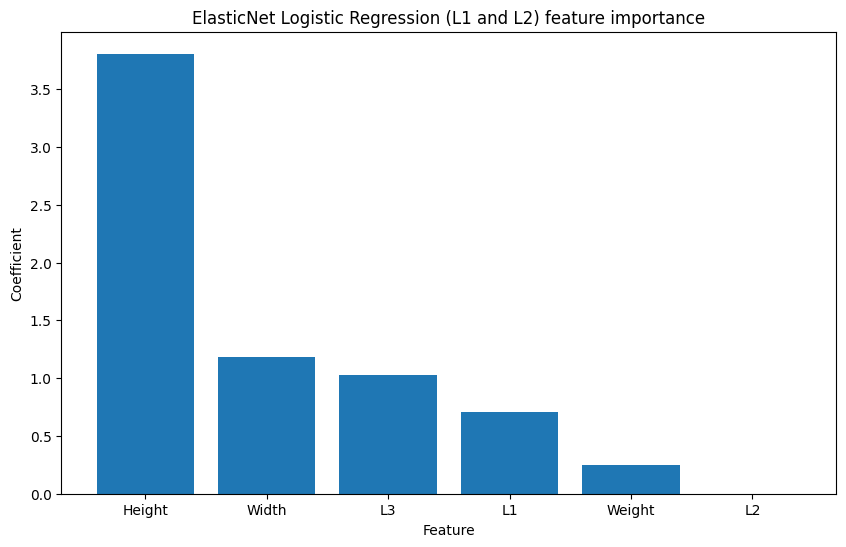

In [137]:
#ELASTICNET
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(fish_X, fish_y, train_size=0.8, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)


# ElasticNet Logistic Regression (L1 and L2)
elasticnet_model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=10000)
elasticnet_model.fit(X_resampled, y_resampled)

# coefficients
elasticnet_coefficients = np.abs(elasticnet_model.coef_[0])

# Classification report
elasticnet_predictions = elasticnet_model.predict(X_test_scaled)

print("ElasticNet Logistic Regression (L1 and L2) Classification Report")
print(classification_report(y_test, elasticnet_predictions))


importance_sorted_indices = np.argsort(elasticnet_coefficients)[::-1]
sorted_features = X_train.columns[importance_sorted_indices]
sorted_importance = elasticnet_coefficients[importance_sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importance)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('ElasticNet Logistic Regression (L1 and L2) feature importance')
plt.show()

In [514]:
# Correctly lebel
feature_names = X_train.columns
# Number of iterations
n_iterations = 5

# Models to evaluate
models = {
    'Lasso Logistic Regression': lasso_model,
    'Ridge Logistic Regression': ridge_model,
    'Elasticnet Logistic Regression': elasticnet_model
}

results = {}

for model_name, model in models.items():
    selected_features_count = []
    feature_selection_frequency = np.zeros(len(feature_names))
    
    for i in range(n_iterations):
        # Split the dataset
        X_train, X_test, y_train, y_test = train_test_split(fish_X, fish_y, train_size=0.8)

        # Standardize the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Initialize SMOTE
        smote = SMOTE()
        X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)
        # Fit the model
        model.fit(X_resampled, y_resampled)
        
        # Make predictions
        predictions = model.predict(X_test_scaled)
        
        

        # Get the coefficients or feature importances
        coefficients = np.abs(model.coef_[0])
        selected_features = coefficients > 0
        
        num_selected_features = np.sum(selected_features)
        selected_features_count.append(num_selected_features)
        feature_selection_frequency += selected_features
        
        # Classification report (optional, only on the first iteration to save time)
        if i == 0:
            predictions = model.predict(X_test_scaled)
            print(f"{model_name} Classification Report (Iteration 1)")
            print(classification_report(y_test, predictions))
    
    # Calculate mean and confidence interval for the number of selected features
    mean_selected_features = np.mean(selected_features_count)
    std_selected_features = np.std(selected_features_count)
    confidence_interval = (mean_selected_features - 1.96 * std_selected_features / np.sqrt(n_iterations),
                           mean_selected_features + 1.96 * std_selected_features / np.sqrt(n_iterations))
    
    results[model_name] = {
        'mean': mean_selected_features,
        'confidence_interval': confidence_interval,
        'feature_selection_frequency': feature_selection_frequency / n_iterations
    }


Lasso Logistic Regression Classification Report (Iteration 1)
              precision    recall  f1-score   support

       Bream       0.96      0.87      0.92       111
       Perch       0.71      0.59      0.65        68
        Pike       0.98      0.98      0.98        49
       Roach       0.67      0.65      0.66        46
 SilverBream       0.81      1.00      0.90        52
       Smelt       0.94      0.89      0.92        38
   Whitewish       0.26      0.60      0.36        10

    accuracy                           0.82       374
   macro avg       0.76      0.80      0.77       374
weighted avg       0.84      0.82      0.83       374

Ridge Logistic Regression Classification Report (Iteration 1)
              precision    recall  f1-score   support

       Bream       0.95      0.95      0.95       114
       Perch       0.83      0.58      0.68        74
        Pike       1.00      0.98      0.99        48
       Roach       0.53      0.70      0.61        33
 SilverB

In [138]:
def add_label_noise(y, noise_level):
    np.random.seed(42)
    y_noisy = y.copy()
    n_samples = len(y)
    n_noisy = int(noise_level * n_samples)

    # Randomly choose indices to change
    noisy_indices = np.random.choice(n_samples, n_noisy, replace=False)

    # Randomly change the labels at the chosen indices
    unique_classes = np.unique(y)
    for idx in noisy_indices:
        current_label = y.iloc[idx]
        new_label = np.random.choice(unique_classes[unique_classes != current_label])
        y_noisy.iloc[idx] = new_label

    return y_noisy

In [139]:
# Mislabeled data
feature_names = X_train.columns
# Number of iterations
n_iterations = 5
# Models to evaluate
models = {
    'Lasso Logistic Regression': lasso_model,
    'Ridge Logistic Regression': ridge_model,
    'Elasticnet Logistic Regression': elasticnet_model
}

results_mislabeled = {}

for model_name, model in models.items():
    selected_features_count = []
    feature_selection_frequency = np.zeros(len(feature_names))
    
    for i in range(n_iterations):
        # Split the dataset
        X_train, X_test, y_train, y_test = train_test_split(fish_X, fish_y, train_size=0.8)

        
        # Add noise to the training labels
        noise_level = 0.5 # 30% noise
        y_train_noisy = add_label_noise(y_train, noise_level)

        # Standardize the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Initialize SMOTE
        smote = SMOTE()
        X_resampled, y_resampled = smote.fit_resample(X_train_scaled,y_train_noisy)

        # Fit the model
        model.fit(X_resampled, y_resampled)
        model_noisy = model.fit(X_resampled, y_resampled)
        
        # Make predictions
        predictions = model.predict(X_test_scaled)
        predictions_noisy = model_noisy.predict(X_test_scaled)
        
        # Get the coefficients or feature importances
        coefficients = np.abs(model.coef_[0])
        coefficients_noisy = np.abs(model_noisy.coef_[0])
        selected_features = coefficients > 0
        
        num_selected_features = np.sum(selected_features)
        selected_features_count.append(num_selected_features)
        feature_selection_frequency += selected_features
        
        # Classification report (optional, only on the first iteration to save time)
        if i == 0:
            predictions = model.predict(X_test_scaled)
            print(f"{model_name} Classification Report (Iteration 1)")
            print(classification_report(y_test, predictions))
    
    # Calculate mean and confidence interval for the number of selected features
    mean_selected_features = np.mean(selected_features_count)
    std_selected_features = np.std(selected_features_count)
    confidence_interval = (mean_selected_features - 1.96 * std_selected_features / np.sqrt(n_iterations),
                           mean_selected_features + 1.96 * std_selected_features / np.sqrt(n_iterations))
    
    results_mislabeled[model_name] = {
        'mean': mean_selected_features,
        'confidence_interval': confidence_interval,
        'feature_selection_frequency': feature_selection_frequency / n_iterations
    }

Lasso Logistic Regression Classification Report (Iteration 1)
              precision    recall  f1-score   support

       Bream       0.88      0.85      0.87        99
       Perch       0.73      0.67      0.70        73
        Pike       1.00      0.98      0.99        54
       Roach       0.58      0.73      0.65        45
 SilverBream       0.79      0.95      0.86        57
       Smelt       0.97      0.94      0.96        35
   Whitewish       0.00      0.00      0.00        11

    accuracy                           0.82       374
   macro avg       0.71      0.73      0.72       374
weighted avg       0.80      0.82      0.81       374



C:\Users\Sky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: Unde

Ridge Logistic Regression Classification Report (Iteration 1)
              precision    recall  f1-score   support

       Bream       0.86      0.87      0.86       114
       Perch       0.75      0.81      0.78        79
        Pike       0.98      0.98      0.98        45
       Roach       0.62      0.49      0.55        41
 SilverBream       0.77      0.94      0.85        53
       Smelt       1.00      0.89      0.94        36
   Whitewish       0.00      0.00      0.00         6

    accuracy                           0.83       374
   macro avg       0.71      0.71      0.71       374
weighted avg       0.81      0.83      0.82       374



C:\Users\Sky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: Unde

Elasticnet Logistic Regression Classification Report (Iteration 1)
              precision    recall  f1-score   support

       Bream       0.91      0.92      0.92       103
       Perch       0.61      0.75      0.68        65
        Pike       1.00      0.98      0.99        48
       Roach       0.59      0.50      0.54        40
 SilverBream       0.85      0.95      0.90        56
       Smelt       0.98      0.92      0.95        49
   Whitewish       0.00      0.00      0.00        13

    accuracy                           0.83       374
   macro avg       0.71      0.72      0.71       374
weighted avg       0.81      0.83      0.81       374



Lasso Logistic Regression Classification Report (Iteration 1, Correctly Labeled)
              precision    recall  f1-score   support

       Bream       0.90      0.98      0.94       105
       Perch       0.74      0.82      0.78        80
        Pike       0.98      0.97      0.97        59
       Roach       0.61      0.56      0.59        39
 SilverBream       0.89      0.86      0.88        37
       Smelt       1.00      0.89      0.94        45
   Whitewish       0.00      0.00      0.00         9

    accuracy                           0.86       374
   macro avg       0.73      0.73      0.73       374
weighted avg       0.84      0.86      0.84       374

Lasso Logistic Regression Classification Report (Iteration 1, Mislabeled)
              precision    recall  f1-score   support

       Bream       0.90      0.98      0.94       105
       Perch       0.74      0.82      0.78        80
        Pike       0.98      0.97      0.97        59
       Roach       0.61      0.

C:\Users\Sky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: Unde

Ridge Logistic Regression Classification Report (Iteration 1, Correctly Labeled)
              precision    recall  f1-score   support

       Bream       0.93      0.92      0.93       122
       Perch       0.73      0.88      0.79        64
        Pike       0.98      0.93      0.96        61
       Roach       0.70      0.43      0.53        37
 SilverBream       0.76      1.00      0.87        39
       Smelt       0.98      0.87      0.92        46
   Whitewish       0.25      0.20      0.22         5

    accuracy                           0.86       374
   macro avg       0.76      0.75      0.75       374
weighted avg       0.86      0.86      0.85       374

Ridge Logistic Regression Classification Report (Iteration 1, Mislabeled)
              precision    recall  f1-score   support

       Bream       0.93      0.92      0.93       122
       Perch       0.73      0.88      0.79        64
        Pike       0.98      0.93      0.96        61
       Roach       0.70      0.

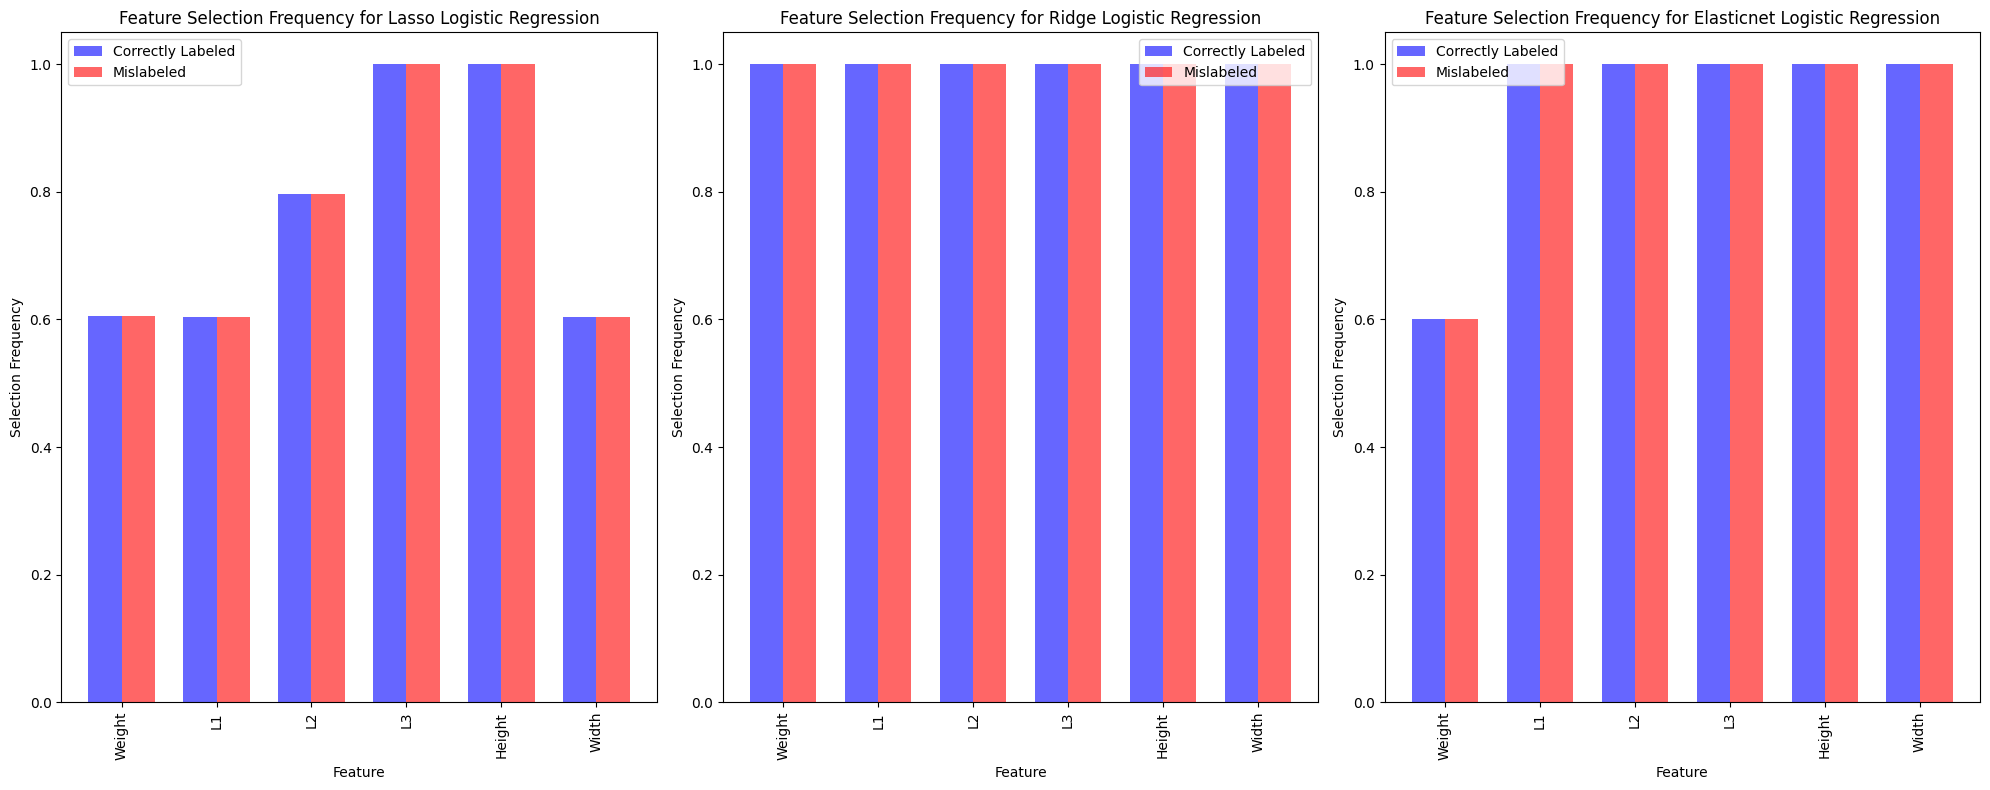

In [161]:
feature_names = X_train.columns
# Number of iterations
n_iterations = 500
# Models to evaluate
models = {
    'Lasso Logistic Regression': lasso_model,
    'Ridge Logistic Regression': ridge_model,
    'Elasticnet Logistic Regression': elasticnet_model
}

results = {}
results_mislabeled = {}

for model_name, model in models.items():
    selected_features_count = []
    feature_selection_frequency = np.zeros(len(feature_names))
    
    selected_features_count_noisy = []
    feature_selection_frequency_noisy = np.zeros(len(feature_names))
    
    for i in range(n_iterations):
        # Split the dataset
        X_train, X_test, y_train, y_test = train_test_split(fish_X, fish_y, train_size=0.8)

        # Add noise to the training labels
        noise_level = 0.5  # 50% noise
        y_train_noisy = add_label_noise(y_train, noise_level)

        # Standardize the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Initialize SMOTE
        smote = SMOTE()
        X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)
        X_resampled_noisy, y_resampled_noisy = smote.fit_resample(X_train_scaled, y_train_noisy)

        # Fit the model on correctly labeled data
        model.fit(X_resampled, y_resampled)
        # Fit the model on noisy labeled data
        model_noisy = model.fit(X_resampled_noisy, y_resampled_noisy)
        
        # Make predictions
        predictions = model.predict(X_test_scaled)
        predictions_noisy = model_noisy.predict(X_test_scaled)
        
        # Get the coefficients or feature importances
        coefficients = np.abs(model.coef_[0])
        coefficients_noisy = np.abs(model_noisy.coef_[0])
        
        selected_features = coefficients > 0
        selected_features_noisy = coefficients_noisy > 0
        
        num_selected_features = np.sum(selected_features)
        num_selected_features_noisy = np.sum(selected_features_noisy)
        
        selected_features_count.append(num_selected_features)
        selected_features_count_noisy.append(num_selected_features_noisy)
        
        feature_selection_frequency += selected_features
        feature_selection_frequency_noisy += selected_features_noisy
        
        # Classification report (optional, only on the first iteration to save time)
        if i == 0:
            print(f"{model_name} Classification Report (Iteration 1, Correctly Labeled)")
            print(classification_report(y_test, predictions))
            print(f"{model_name} Classification Report (Iteration 1, Mislabeled)")
            print(classification_report(y_test, predictions_noisy))
    
    # Calculate mean and confidence interval for the number of selected features for correctly labeled data
    mean_selected_features = np.mean(selected_features_count)
    std_selected_features = np.std(selected_features_count)
    confidence_interval = (mean_selected_features - 1.96 * std_selected_features / np.sqrt(n_iterations),
                           mean_selected_features + 1.96 * std_selected_features / np.sqrt(n_iterations))
    
    results[model_name] = {
        'mean': mean_selected_features,
        'confidence_interval': confidence_interval,
        'feature_selection_frequency': feature_selection_frequency / n_iterations
    }
    
    # Calculate mean and confidence interval for the number of selected features for mislabeled data
    mean_selected_features_noisy = np.mean(selected_features_count_noisy)
    std_selected_features_noisy = np.std(selected_features_count_noisy)
    confidence_interval_noisy = (mean_selected_features_noisy - 1.96 * std_selected_features_noisy / np.sqrt(n_iterations),
                                 mean_selected_features_noisy + 1.96 * std_selected_features_noisy / np.sqrt(n_iterations))
    
    results_mislabeled[model_name] = {
        'mean': mean_selected_features_noisy,
        'confidence_interval': confidence_interval_noisy,
        'feature_selection_frequency': feature_selection_frequency_noisy / n_iterations
    }

# Plot feature selection frequency for comparison
fig, axs = plt.subplots(1, len(results), figsize=(20, 8))

bar_width = 0.35
index = np.arange(len(feature_names))

for idx, (model_name, result) in enumerate(results.items()):
    freq_correctly = result['feature_selection_frequency']
    freq_mislabeled = results_mislabeled[model_name]['feature_selection_frequency']
    
    axs[idx].bar(index, freq_correctly, bar_width, label='Correctly Labeled', alpha=0.6, color='blue')
    axs[idx].bar(index + bar_width, freq_mislabeled, bar_width, label='Mislabeled', alpha=0.6, color='red')
    
    axs[idx].set_xlabel('Feature')
    axs[idx].set_ylabel('Selection Frequency')
    axs[idx].set_title(f'Feature Selection Frequency for {model_name}')
    axs[idx].set_xticks(index + bar_width / 2)
    axs[idx].set_xticklabels(feature_names, rotation=90)
    axs[idx].legend()

plt.tight_layout()
plt.show()

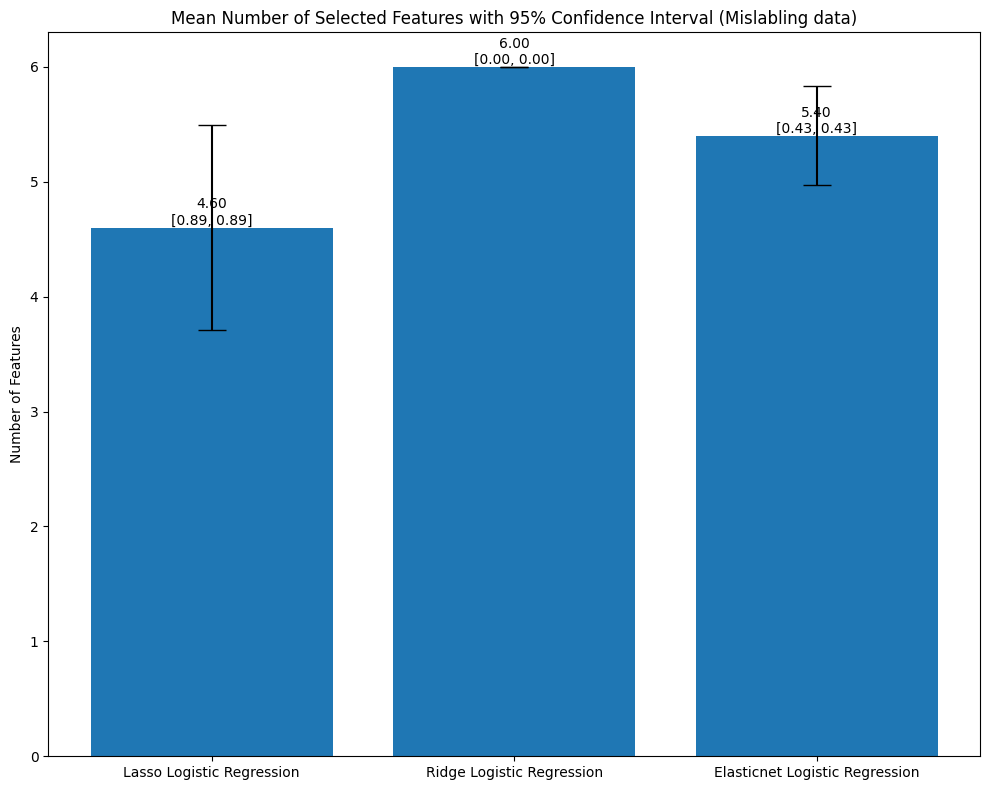

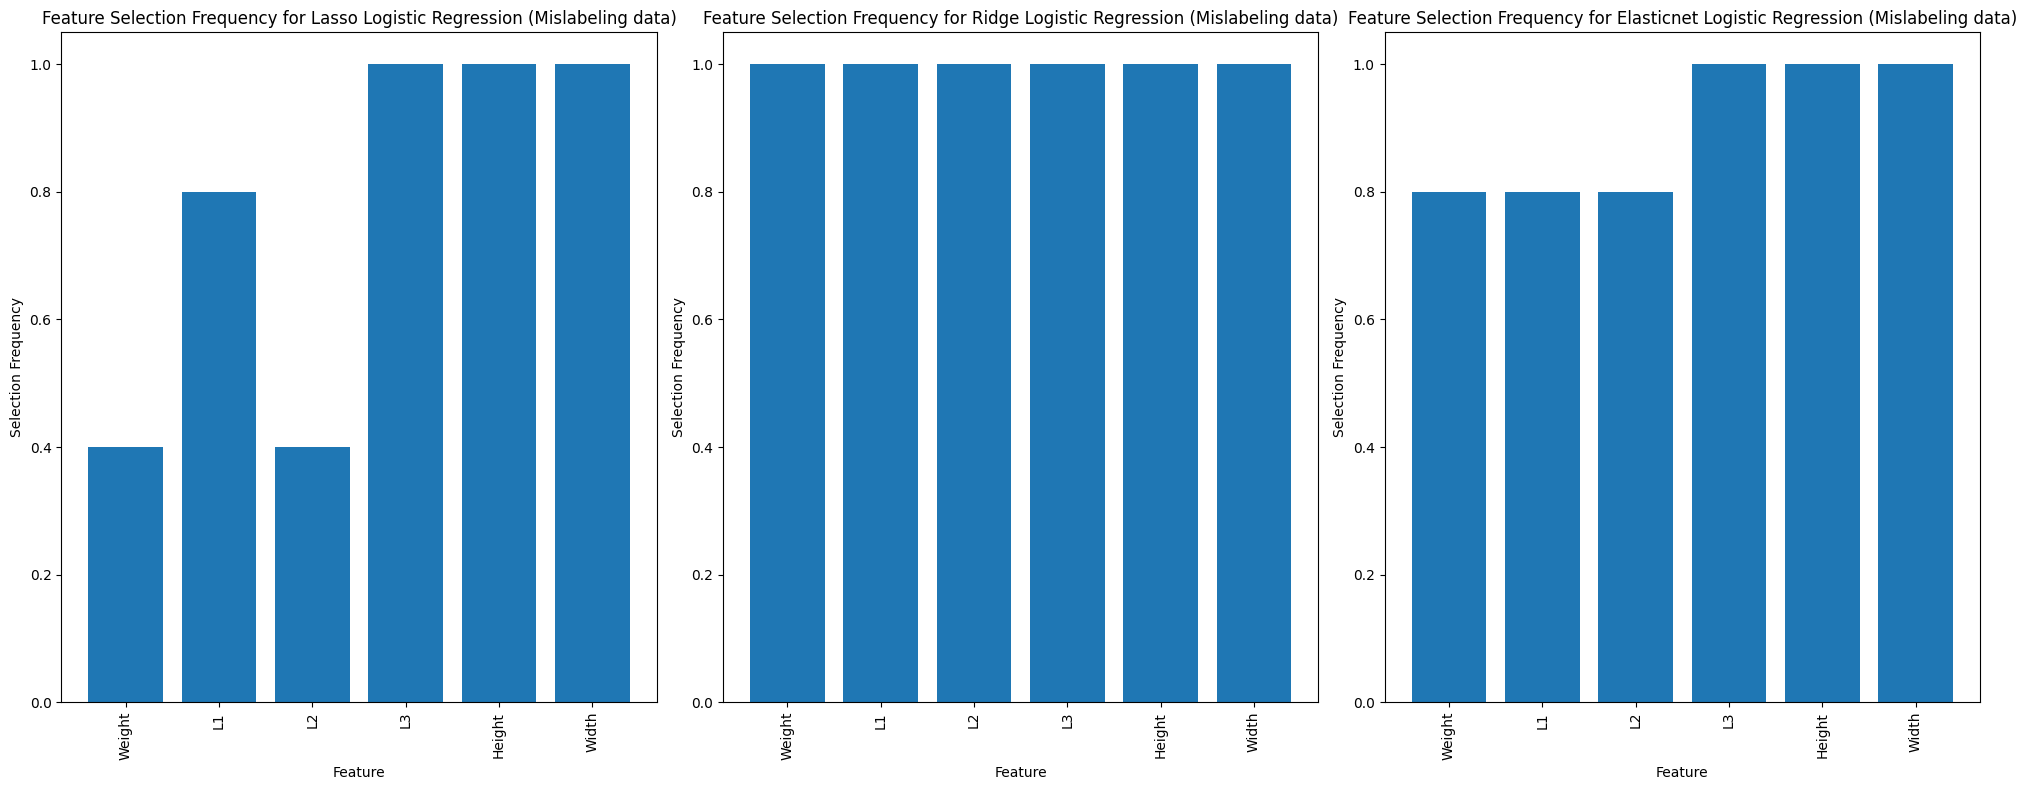

In [141]:
# Plotting mean number of selected features with confidence intervals in one figure
fig, ax = plt.subplots(figsize=(10, 8))
# Plot mean number of selected features with error bars
model_names = list(results_mislabeled.keys())
mean_values_mislabled = [results_mislabeled[model]['mean'] for model in model_names]
error_bars_mislabled = [[results_mislabeled[model]['mean'] - results_mislabeled[model]['confidence_interval'][0] for model in model_names],
              [results_mislabeled[model]['confidence_interval'][1] - results_mislabeled[model]['mean'] for model in model_names]]

bars = ax.bar(model_names, mean_values_mislabled, yerr=error_bars_mislabled, capsize=10)
ax.set_ylabel('Number of Features')
ax.set_title('Mean Number of Selected Features with 95% Confidence Interval (Mislabling data)')

# Add confidence interval annotations
for bar, mean, (lower, upper) in zip(bars, mean_values_mislabled, zip(*error_bars_mislabled)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height,
            f'{mean:.2f}\n[{lower:.2f}, {upper:.2f}]',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plotting feature selection frequency in a separate figure
fig, axs = plt.subplots(1, len(results_mislabeled), figsize=(20, 8))

for idx, (model_name, result) in enumerate(results_mislabeled.items()):
    axs[idx].bar(feature_names, result['feature_selection_frequency'])
    axs[idx].set_xlabel('Feature')
    axs[idx].set_ylabel('Selection Frequency')
    axs[idx].set_title(f'Feature Selection Frequency for {model_name} (Mislabeling data)')
    axs[idx].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

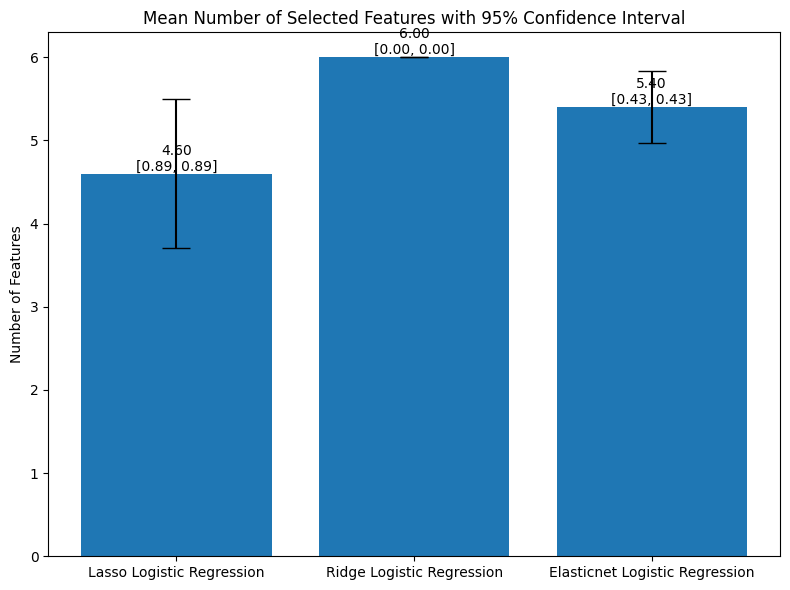

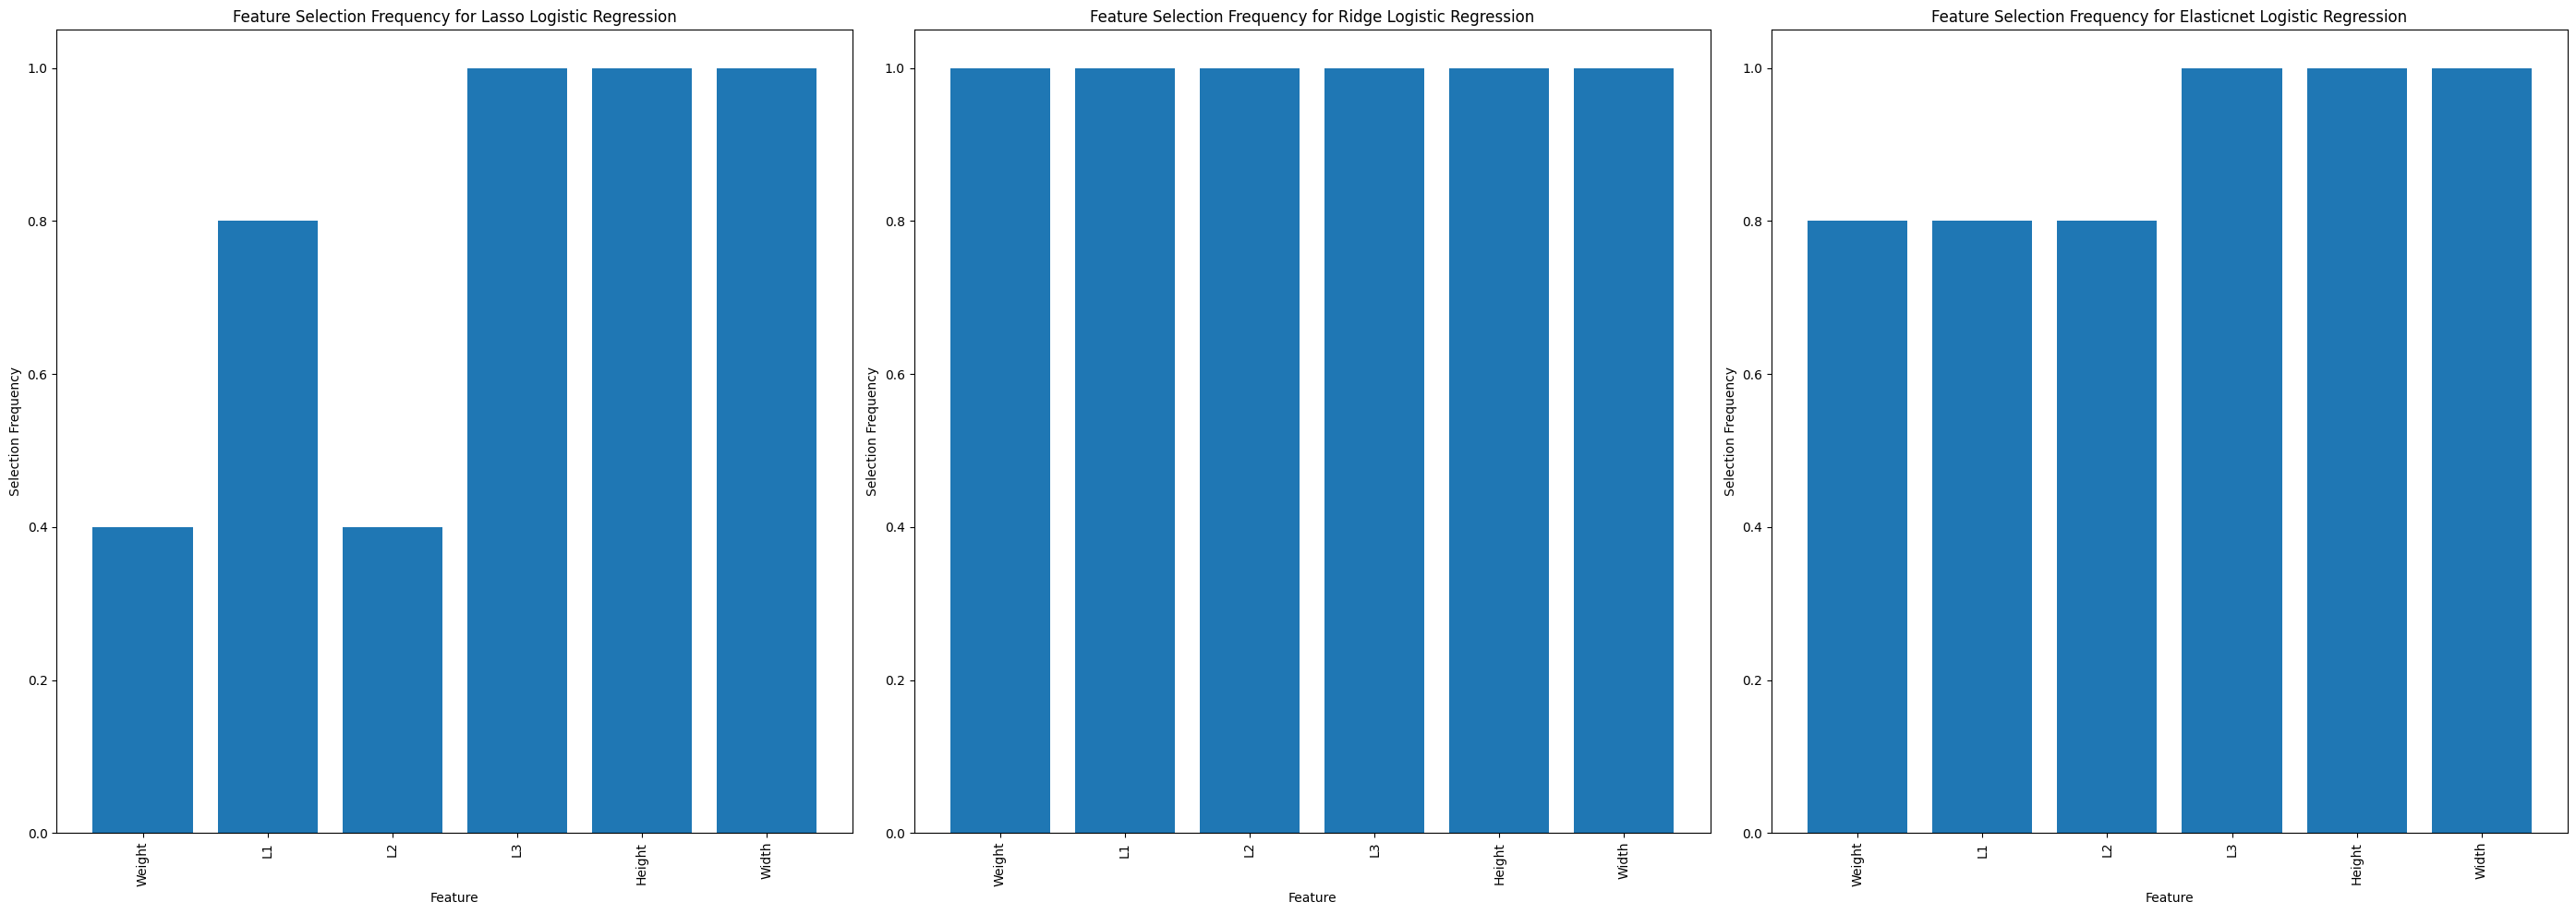

In [142]:
# Plotting mean number of selected features with confidence intervals in one figure
fig, ax = plt.subplots(figsize=(8, 6))
# Plot mean number of selected features with error bars
model_names = list(results.keys())
mean_values = [results[model]['mean'] for model in model_names]
error_bars = [[results[model]['mean'] - results[model]['confidence_interval'][0] for model in model_names],
              [results[model]['confidence_interval'][1] - results[model]['mean'] for model in model_names]]

bars = ax.bar(model_names, mean_values, yerr=error_bars, capsize=10)
ax.set_ylabel('Number of Features')
ax.set_title('Mean Number of Selected Features with 95% Confidence Interval')

# Add confidence interval annotations
for bar, mean, (lower, upper) in zip(bars, mean_values, zip(*error_bars)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height,
            f'{mean:.2f}\n[{lower:.2f}, {upper:.2f}]',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plotting feature selection frequency in a separate figure
fig, axs = plt.subplots(1, len(results), figsize=(28, 10))

for idx, (model_name, result) in enumerate(results.items()):
    axs[idx].bar(feature_names, result['feature_selection_frequency'])
    axs[idx].set_xlabel('Feature')
    axs[idx].set_ylabel('Selection Frequency')
    axs[idx].set_title(f'Feature Selection Frequency for {model_name}')
    axs[idx].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [ ]:

# Plotting mean number of selected features with confidence intervals for comparison
fig, ax = plt.subplots(figsize=(14, 8))

# Plot mean number of selected features with error bars for mislabeled data
model_names = list(results_mislabeled.keys())
mean_values_mislabled = [results_mislabeled[model]['mean'] for model in model_names]
error_bars_mislabled = [[results_mislabeled[model]['mean'] - results_mislabeled[model]['confidence_interval'][0] for model in model_names],
                        [results_mislabeled[model]['confidence_interval'][1] - results_mislabeled[model]['mean'] for model in model_names]]

bars_mislabled = ax.bar([f'{model} (Mislabeled)' for model in model_names], mean_values_mislabled, yerr=error_bars_mislabled, capsize=10, alpha=0.6, label='Mislabeled')

# Plot mean number of selected features with error bars for correctly labeled data
mean_values_correctly = [results[model]['mean'] for model in model_names]
error_bars_correctly = [[results[model]['mean'] - results[model]['confidence_interval'][0] for model in model_names],
                        [results[model]['confidence_interval'][1] - results[model]['mean'] for model in model_names]]

bars_correctly = ax.bar([f'{model} (Correctly)' for model in model_names], mean_values_correctly, yerr=error_bars_correctly, capsize=10, alpha=0.6, label='Correctly Labeled')

ax.set_ylabel('Number of Features')
ax.set_title('Mean Number of Selected Features with 95% Confidence Interval')
ax.legend()

# Add confidence interval annotations for mislabeled data
for bar, mean, (lower, upper) in zip(bars_mislabled, mean_values_mislabled, zip(*error_bars_mislabled)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height,
            f'{mean:.2f}\n[{lower:.2f}, {upper:.2f}]',
            ha='center', va='bottom', fontsize=8)

# Add confidence interval annotations for correctly labeled data
for bar, mean, (lower, upper) in zip(bars_correctly, mean_values_correctly, zip(*error_bars_correctly)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height,
            f'{mean:.2f}\n[{lower:.2f}, {upper:.2f}]',
            ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Plotting feature selection frequency for comparison
fig, axs = plt.subplots(2, len(results_mislabeled), figsize=(20, 16))

for idx, (model_name, result) in enumerate(results_mislabeled.items()):
    axs[0, idx].bar(feature_names, result['feature_selection_frequency'], alpha=0.6, label='Mislabeled')
    axs[0, idx].set_xlabel('Feature')
    axs[0, idx].set_ylabel('Selection Frequency')
    axs[0, idx].set_title(f'Feature Selection Frequency for {model_name} (Mislabeled)')
    axs[0, idx].tick_params(axis='x', rotation=90)

for idx, (model_name, result) in enumerate(results.items()):
    axs[1, idx].bar(feature_names, result['feature_selection_frequency'], alpha=0.6, label='Correctly Labeled')
    axs[1, idx].set_xlabel('Feature')
    axs[1, idx].set_ylabel('Selection Frequency')
    axs[1, idx].set_title(f'Feature Selection Frequency for {model_name} (Correctly Labeled)')
    axs[1, idx].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


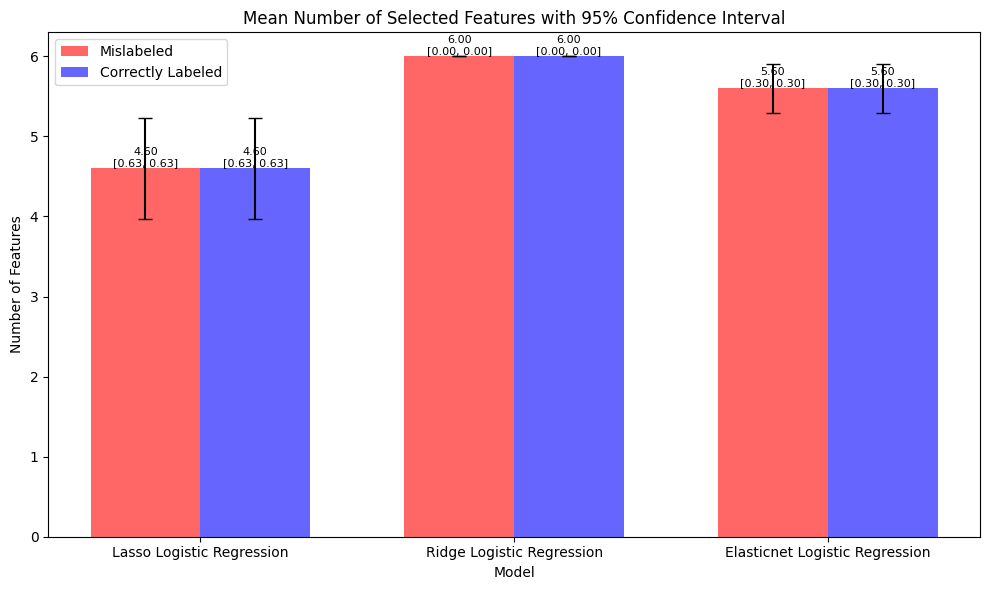

In [144]:
# Assuming you have results for both correctly labeled and mislabeled data
# Example data setup
# results = ...
# results_mislabled = ...

# Prepare data for plotting
model_names = list(results_mislabeled.keys())
mean_values_mislabled = [results_mislabeled[model]['mean'] for model in model_names]
error_bars_mislabled = [[results_mislabeled[model]['mean'] - results_mislabeled[model]['confidence_interval'][0] for model in model_names],
                        [results_mislabeled[model]['confidence_interval'][1] - results_mislabeled[model]['mean'] for model in model_names]]

mean_values_correctly = [results[model]['mean'] for model in model_names]
error_bars_correctly = [[results[model]['mean'] - results[model]['confidence_interval'][0] for model in model_names],
                        [results[model]['confidence_interval'][1] - results[model]['mean'] for model in model_names]]

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(model_names))

bars1 = ax.bar(index, mean_values_mislabled, bar_width, yerr=error_bars_mislabled, capsize=5, label='Mislabeled', alpha=0.6, color='red')
bars2 = ax.bar(index + bar_width, mean_values_correctly, bar_width, yerr=error_bars_correctly, capsize=5, label='Correctly Labeled', alpha=0.6, color='blue')

ax.set_xlabel('Model')
ax.set_ylabel('Number of Features')
ax.set_title('Mean Number of Selected Features with 95% Confidence Interval')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()

# Add annotations
def add_labels(bars, mean_values, error_bars):
    for bar, mean, (lower, upper) in zip(bars, mean_values, zip(*error_bars)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height,
                f'{mean:.2f}\n[{lower:.2f}, {upper:.2f}]',
                ha='center', va='bottom', fontsize=8)

add_labels(bars1, mean_values_mislabled, error_bars_mislabled)
add_labels(bars2, mean_values_correctly, error_bars_correctly)

plt.tight_layout()
plt.show()


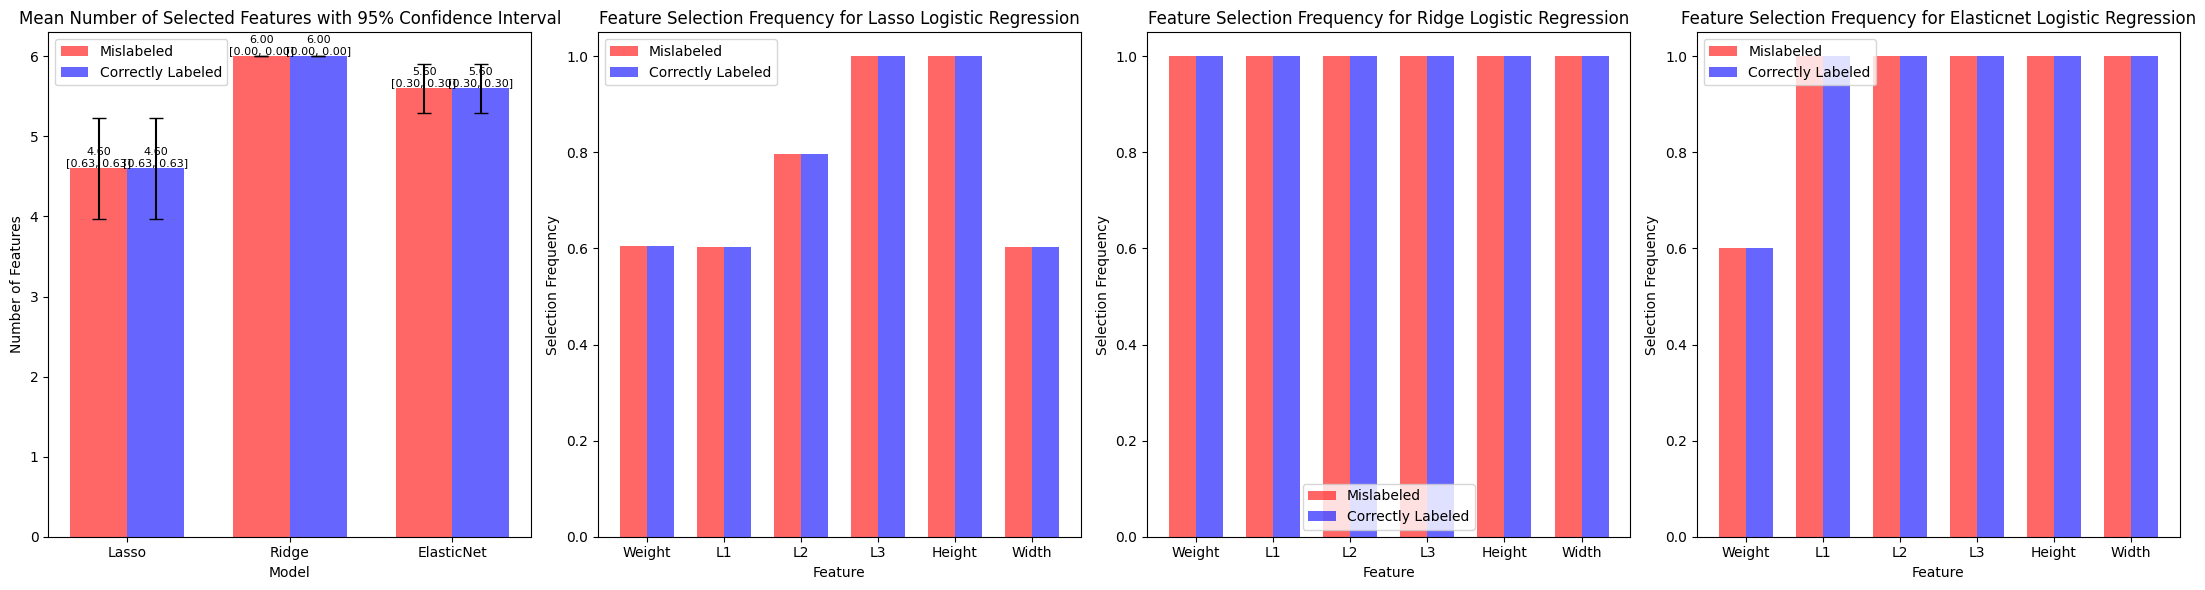

In [163]:
fig, axs = plt.subplots(1, len(results_mislabeled) + 1, figsize=(22, 6))

bar_width = 0.35
index = np.arange(len(model_names))  # Corrected to match the number of models

# Plot mean number of selected features
bars1 = axs[0].bar(index, mean_values_mislabled, bar_width, yerr=error_bars_mislabled, capsize=5, label='Mislabeled', alpha=0.6, color='red')
bars2 = axs[0].bar(index + bar_width, mean_values_correctly, bar_width, yerr=error_bars_correctly, capsize=5, label='Correctly Labeled', alpha=0.6, color='blue')

axs[0].set_xlabel('Model')
axs[0].set_ylabel('Number of Features')
axs[0].set_title('Mean Number of Selected Features with 95% Confidence Interval')
axs[0].set_xticks(index + bar_width / 2)
axs[0].set_xticklabels(model_names)
axs[0].legend()

def add_labels(ax, bars, mean_values, error_bars):
    for bar, mean, (lower, upper) in zip(bars, mean_values, zip(*error_bars)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height,
                f'{mean:.2f}\n[{lower:.2f}, {upper:.2f}]',
                ha='center', va='bottom', fontsize=8)

add_labels(axs[0], bars1, mean_values_mislabled, error_bars_mislabled)
add_labels(axs[0], bars2, mean_values_correctly, error_bars_correctly)


# Plot feature selection frequency for each model
index = np.arange(len(feature_names))  # Adjusted to match the number of features

for idx, (model_name, result) in enumerate(results_mislabeled.items()):
    freq_mislabeled = result['feature_selection_frequency']
    freq_correctly = results[model_name]['feature_selection_frequency']
    
    axs[idx + 1].bar(index, freq_mislabeled, bar_width, label='Mislabeled', alpha=0.6, color='red')
    axs[idx + 1].bar(index + bar_width, freq_correctly, bar_width, label='Correctly Labeled', alpha=0.6, color='blue')
    
    axs[idx + 1].set_xlabel('Feature')
    axs[idx + 1].set_ylabel('Selection Frequency')
    axs[idx + 1].set_title(f'Feature Selection Frequency for {model_name}')
    axs[idx + 1].set_xticks(index + bar_width / 2)
    axs[idx + 1].set_xticklabels(feature_names)
    axs[idx + 1].legend()

plt.tight_layout()
plt.show()

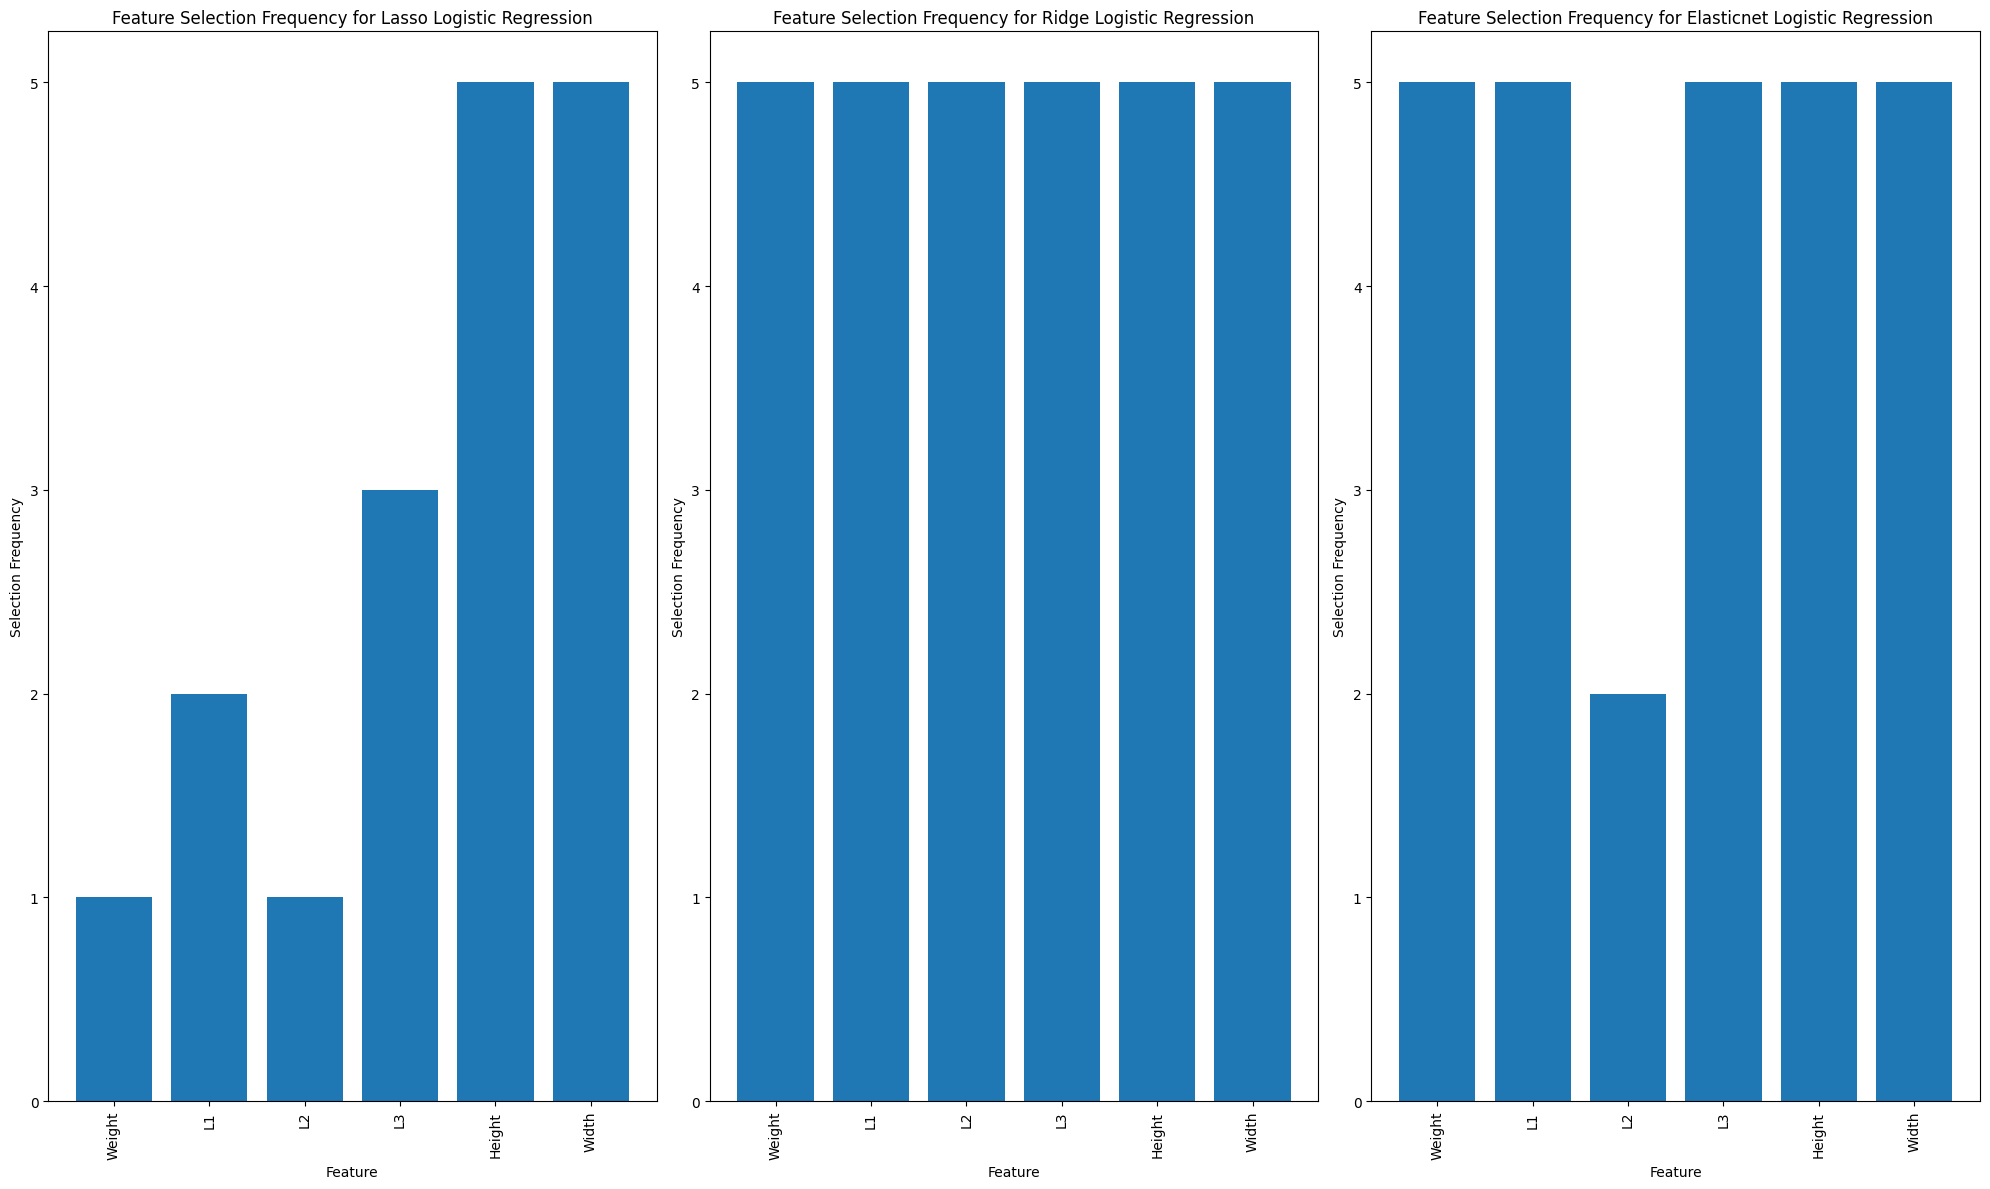

In [434]:
# Plotting mean number of selected features with confidence intervals and feature selection frequency in subplots

fig, axs = plt.subplots(1, len(results), figsize=(20, 12))

# Plot mean number of selected features with confidence intervals
model_names = list(results.keys())
mean_values = [results[model]['mean'] for model in model_names]
error_bars = [[results[model]['mean'] - results[model]['confidence_interval'][0] for model in model_names],
              [results[model]['confidence_interval'][1] - results[model]['mean'] for model in model_names]]



# Plot feature selection frequency
for idx, (model_name, result) in enumerate(results.items()):
    axs[idx].bar(feature_names, result['feature_selection_frequency'])
    axs[idx].set_xlabel('Feature')
    axs[idx].set_ylabel('Selection Frequency')
    axs[idx].set_title(f'Feature Selection Frequency for {model_name}')
    axs[idx].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


Optimal number of features for Lasso: 6
Selected Features:
['Weight' 'L1' 'L2' 'L3' 'Height' 'Width']
Optimal number of features for Ridge: 6
Selected Features:
['Weight' 'L1' 'L2' 'L3' 'Height' 'Width']
Optimal number of features for ElasticNet: 6
Selected Features:
['Weight' 'L1' 'L2' 'L3' 'Height' 'Width']


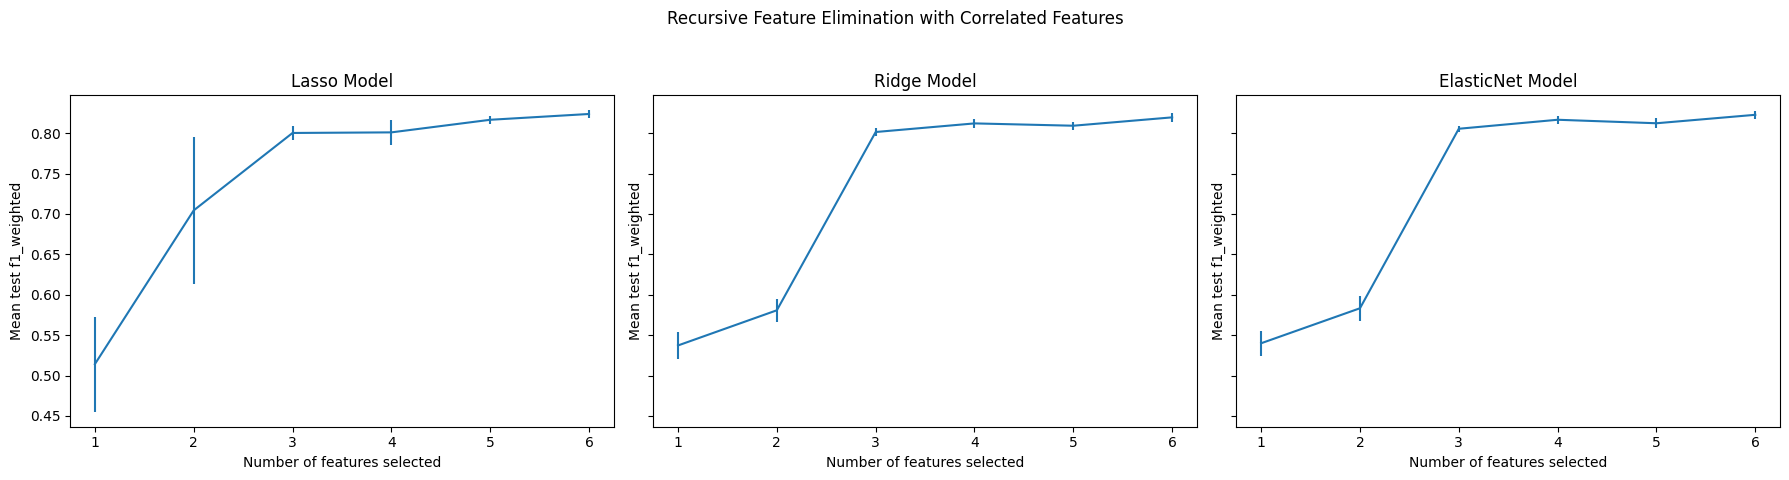

In [164]:
feature_selection_models = [lasso_model, ridge_model, elasticnet_model]
model_names = ["Lasso", "Ridge", "ElasticNet"]
# Set up the subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for idx, (clf, model_name) in enumerate(zip(feature_selection_models, model_names)):
    min_features_to_select = 1  # Minimum number of features to consider
    cv = StratifiedKFold(5)

    rfecv = RFECV(
        estimator=clf,
        step=1,
        cv=cv,
        scoring="f1_weighted",
        min_features_to_select=min_features_to_select,
        n_jobs=2,
    )
    rfecv.fit(X_resampled, y_resampled)

    print(f"Optimal number of features for {model_name}: {rfecv.n_features_}")
    
    selected_features = np.array(feature_names)[rfecv.support_]
    print("Selected Features:")
    print(selected_features)

    cv_results = pd.DataFrame(rfecv.cv_results_)
    # Extract the number of features at each step
    n_features = list(range(min_features_to_select, len(cv_results) + min_features_to_select))

    axs[idx].errorbar(
        x=n_features,
        y=cv_results["mean_test_score"],
        yerr=cv_results["std_test_score"],
    )
    axs[idx].set_xlabel("Number of features selected")
    axs[idx].set_ylabel("Mean test f1_weighted")
    axs[idx].set_title(f"{model_name} Model")

plt.suptitle("Recursive Feature Elimination with Correlated Features")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
classifiers_feature_importance = {
    "Gradient Bosting": GradientBoostingClassifier(max_depth=10, n_estimators=200),
    "Support Vector Classifier": SVC(kernel='rbf'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5),
    "Random Forest": RandomForestClassifier(max_depth=30, n_estimators=200),
    "Neural Network": MLPClassifier(max_iter=10000, activation='relu',solver='adam')
}

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for idx, (clf, model_name) in enumerate(zip(feature_selection_models, model_names)):
    min_features_to_select = 1  # Minimum number of features to consider
    cv = StratifiedKFold(5)

    rfecv = RFECV(
        estimator=clf,
        step=1,
        cv=cv,
        scoring="f1_weighted",
        min_features_to_select=min_features_to_select,
        n_jobs=2,
    )
    rfecv.fit(X_resampled, y_resampled)

    print(f"Optimal number of features for {model_name}: {rfecv.n_features_}")
    
    selected_features = np.array(feature_names)[rfecv.support_]
    print("Selected Features:")
    print(selected_features)

    cv_results = pd.DataFrame(rfecv.cv_results_)
    # Extract the number of features at each step
    n_features = list(range(min_features_to_select, len(cv_results) + min_features_to_select))

    axs[idx].errorbar(
        x=n_features,
        y=cv_results["mean_test_score"],
        yerr=cv_results["std_test_score"],
    )
    axs[idx].set_xlabel("Number of features selected")
    axs[idx].set_ylabel("Mean test f1_weighted")
    axs[idx].set_title(f"{model_name} Model")

plt.suptitle("Recursive Feature Elimination with Correlated Features")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [169]:
def feature_importance_over_sampling(name,clf, train_size,X,y,n_iter):
    feature_importance_list = []

    for _ in range(n_iter):
        # Split the dataset
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)
        # Standardize the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Initialize SMOTE
        smote = SMOTE()
        X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

        # Fit the model   
        clf.fit(X_resampled, y_resampled)
        
        # Predict on the test set
        y_pred = clf.predict(X_test_scaled)
        
        if name == "Gradient Bosting":
            importance = clf.feature_importances_
        elif name == "Support Vector Classifier":
            result_svc = permutation_importance(clf, X_test_scaled, y_test, n_repeats=10, random_state=42)
            importance = result_svc.importances_mean
        elif name == "K-Nearest Neighbors":
            # Permutation importance
            result_knn = permutation_importance(clf, X_test_scaled, y_test, n_repeats=10, random_state=42)
            importance = result_knn.importances_mean
        elif name =="Decision Tree":
            importance = clf.feature_importances_
        elif name == "Random Forest":
            importance = clf.feature_importances_
        elif name == "Neural Network":
            result_nb = permutation_importance(clf, X_test_scaled, y_test, n_repeats=10, random_state=42)
            importance = result_nb.importances_mean
        else:
            importance = np.abs(clf.coef_[0])

        feature_importance_list.append(importance)

        if _ == n_iter-1:
            # Evaluation metrics
            # Precision, Recall, F1-Score (weighted - to account for imbalance)
            classification_report_ = classification_report(y_test,y_pred)
            # Print the results
            print(classification_report_)

            importance_sorted_indices = np.argsort(importance)[::-1]
            sorted_features = X_train.columns[importance_sorted_indices]
            sorted_importance = importance[importance_sorted_indices]

            plt.figure(figsize=(10, 6))
            plt.bar(sorted_features, sorted_importance)
            plt.xlabel('Feature')
            plt.ylabel('Coefficient')
            plt.title(f'Feature Importance for {name}')
            plt.show()
    importance_arr = np.array(feature_importance_list)
    return importance_arr

Lasso
              precision    recall  f1-score   support

       Bream       0.91      0.89      0.90        99
       Perch       0.82      0.61      0.70        67
        Pike       1.00      0.98      0.99        48
       Roach       0.64      0.60      0.62        50
 SilverBream       0.88      0.96      0.92        51
       Smelt       0.94      0.94      0.94        53
   Whitewish       0.17      0.67      0.27         6

    accuracy                           0.83       374
   macro avg       0.76      0.81      0.76       374
weighted avg       0.86      0.83      0.84       374



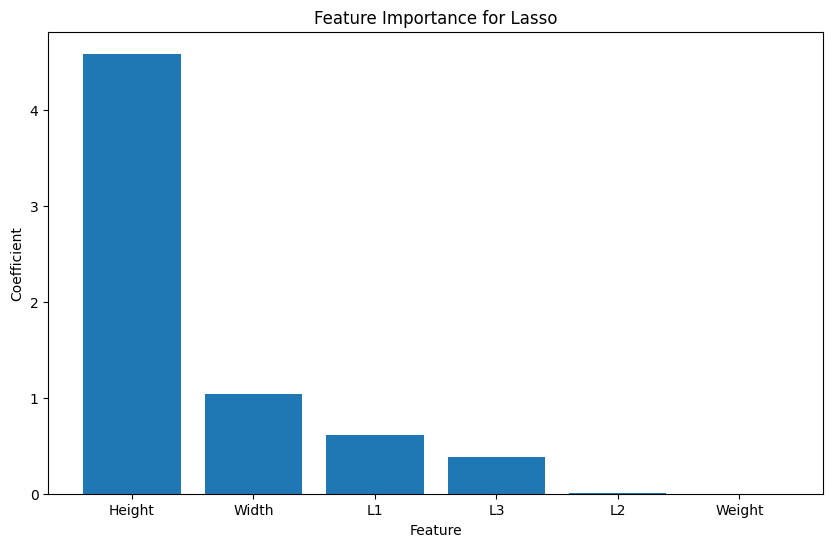

Ridge
              precision    recall  f1-score   support

       Bream       0.93      0.93      0.93       107
       Perch       0.76      0.59      0.66        75
        Pike       1.00      0.98      0.99        49
       Roach       0.55      0.67      0.60        42
 SilverBream       0.90      0.98      0.94        47
       Smelt       0.97      0.95      0.96        39
   Whitewish       0.23      0.33      0.27        15

    accuracy                           0.82       374
   macro avg       0.76      0.77      0.76       374
weighted avg       0.84      0.82      0.82       374



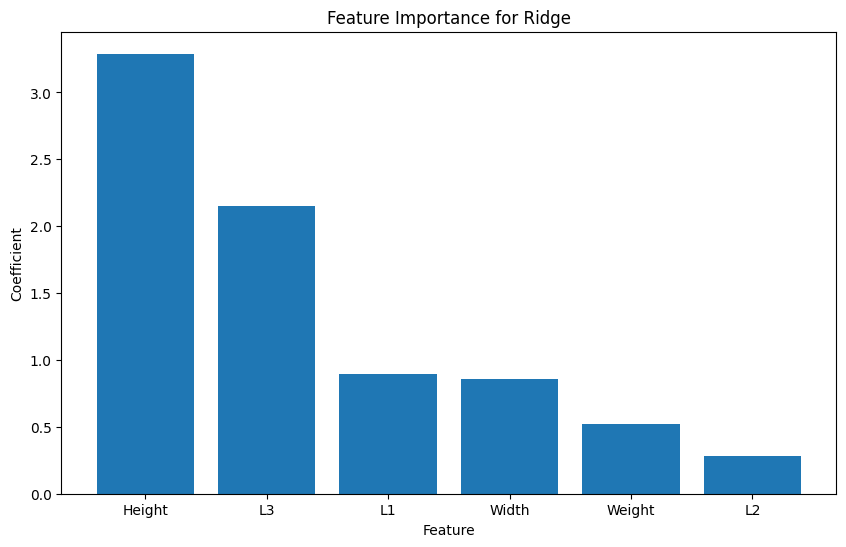

ElasticNet
              precision    recall  f1-score   support

       Bream       0.90      0.96      0.93       118
       Perch       0.90      0.61      0.73        77
        Pike       1.00      0.94      0.97        47
       Roach       0.52      0.64      0.57        39
 SilverBream       0.89      0.92      0.90        51
       Smelt       0.95      0.95      0.95        38
   Whitewish       0.07      0.25      0.11         4

    accuracy                           0.84       374
   macro avg       0.75      0.75      0.74       374
weighted avg       0.87      0.84      0.85       374



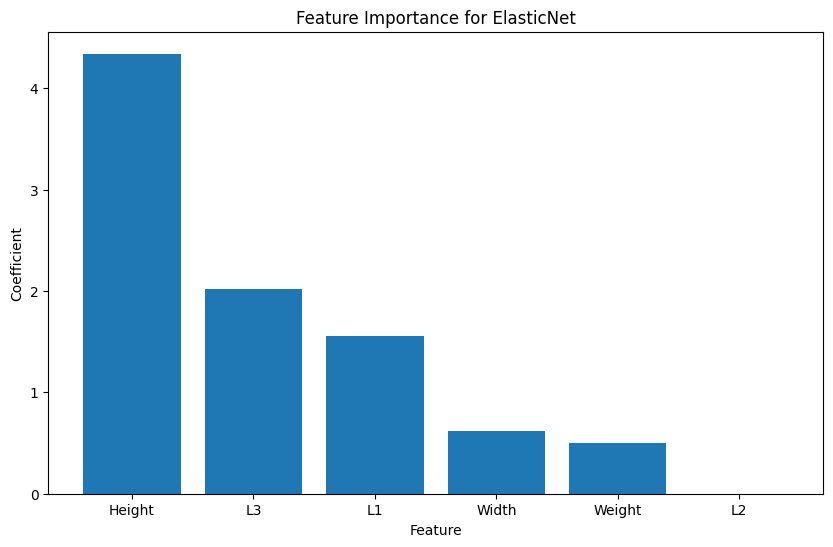

Gradient Bosting
              precision    recall  f1-score   support

       Bream       0.95      0.97      0.96       125
       Perch       0.87      0.77      0.82        62
        Pike       1.00      1.00      1.00        41
       Roach       0.72      0.82      0.77        38
 SilverBream       0.96      0.96      0.96        51
       Smelt       0.96      1.00      0.98        46
   Whitewish       0.67      0.55      0.60        11

    accuracy                           0.91       374
   macro avg       0.88      0.87      0.87       374
weighted avg       0.91      0.91      0.91       374



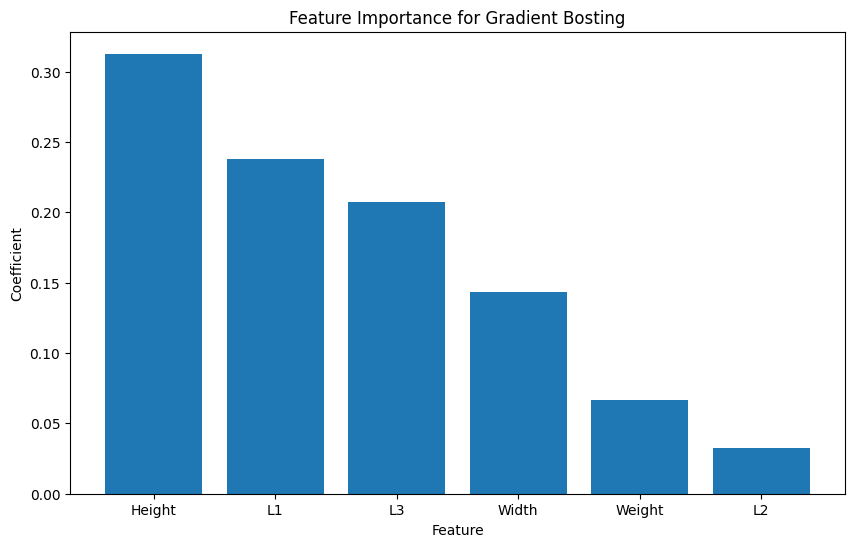

Support Vector Classifier
              precision    recall  f1-score   support

       Bream       0.91      0.97      0.94       107
       Perch       0.82      0.65      0.73        69
        Pike       1.00      0.97      0.99        40
       Roach       0.64      0.73      0.68        44
 SilverBream       0.95      0.93      0.94        59
       Smelt       1.00      0.98      0.99        45
   Whitewish       0.36      0.50      0.42        10

    accuracy                           0.87       374
   macro avg       0.81      0.82      0.81       374
weighted avg       0.87      0.87      0.87       374



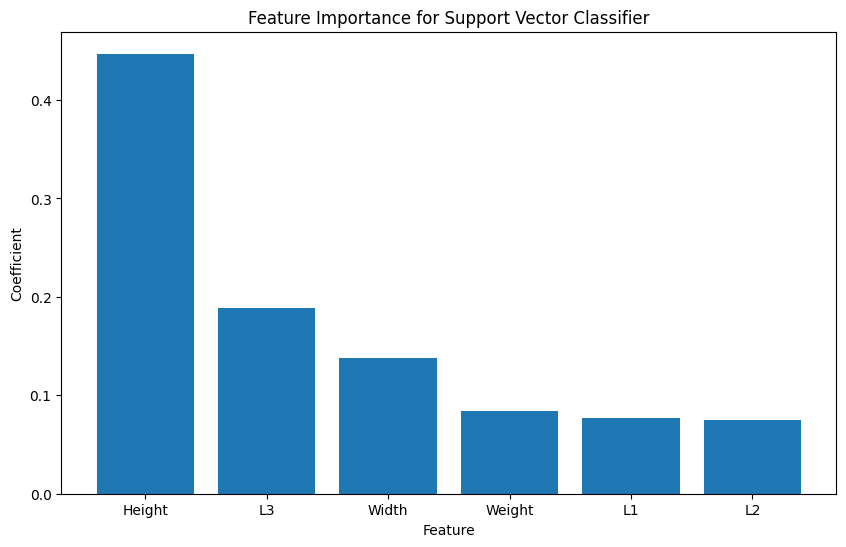

K-Nearest Neighbors
              precision    recall  f1-score   support

       Bream       0.94      1.00      0.97       108
       Perch       0.90      0.83      0.86        75
        Pike       1.00      1.00      1.00        52
       Roach       0.81      0.90      0.85        42
 SilverBream       1.00      0.94      0.97        53
       Smelt       1.00      0.97      0.98        31
   Whitewish       0.82      0.69      0.75        13

    accuracy                           0.93       374
   macro avg       0.92      0.90      0.91       374
weighted avg       0.93      0.93      0.93       374



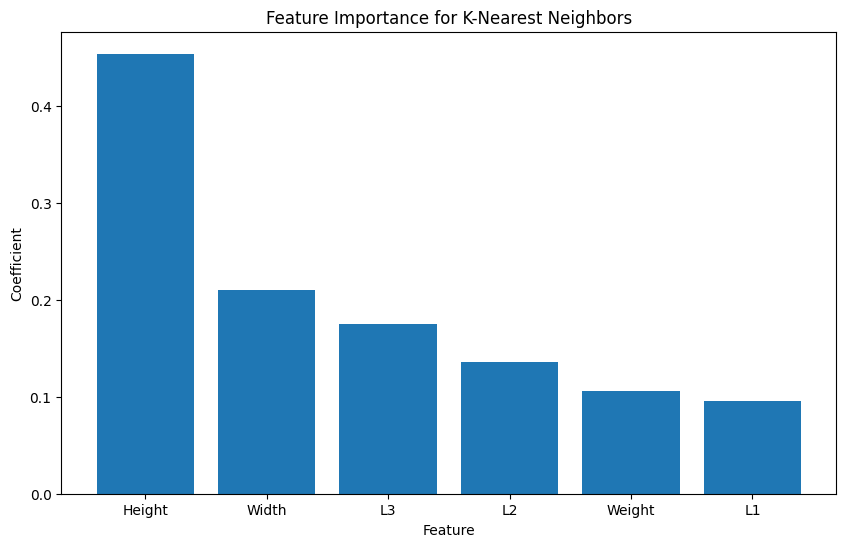

Decision Tree
              precision    recall  f1-score   support

       Bream       0.88      0.90      0.89       104
       Perch       0.89      0.67      0.77        73
        Pike       1.00      1.00      1.00        48
       Roach       0.67      0.80      0.73        46
 SilverBream       0.90      0.88      0.89        52
       Smelt       0.96      0.98      0.97        46
   Whitewish       0.36      0.80      0.50         5

    accuracy                           0.86       374
   macro avg       0.81      0.86      0.82       374
weighted avg       0.88      0.86      0.87       374



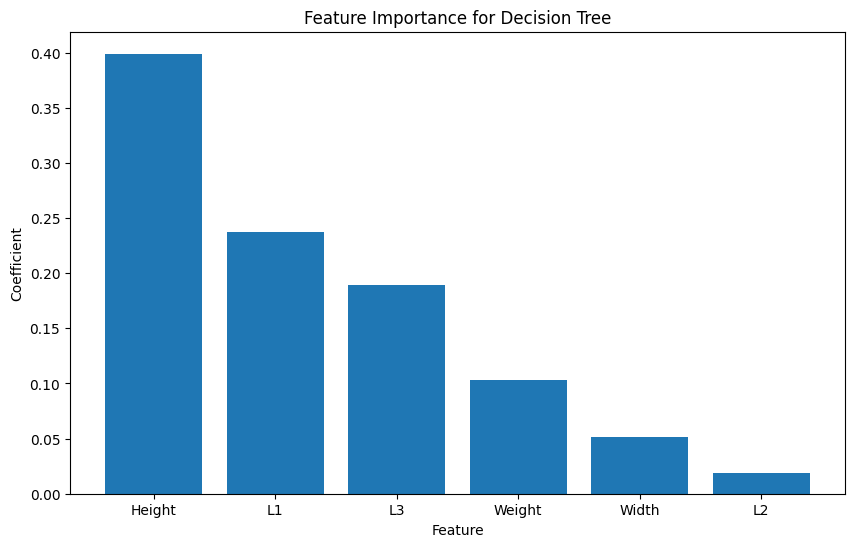

Random Forest
              precision    recall  f1-score   support

       Bream       0.90      1.00      0.95       113
       Perch       0.89      0.88      0.89        85
        Pike       1.00      0.93      0.96        40
       Roach       0.65      0.73      0.69        30
 SilverBream       1.00      0.89      0.94        53
       Smelt       1.00      0.97      0.99        40
   Whitewish       0.86      0.46      0.60        13

    accuracy                           0.91       374
   macro avg       0.90      0.84      0.86       374
weighted avg       0.91      0.91      0.91       374



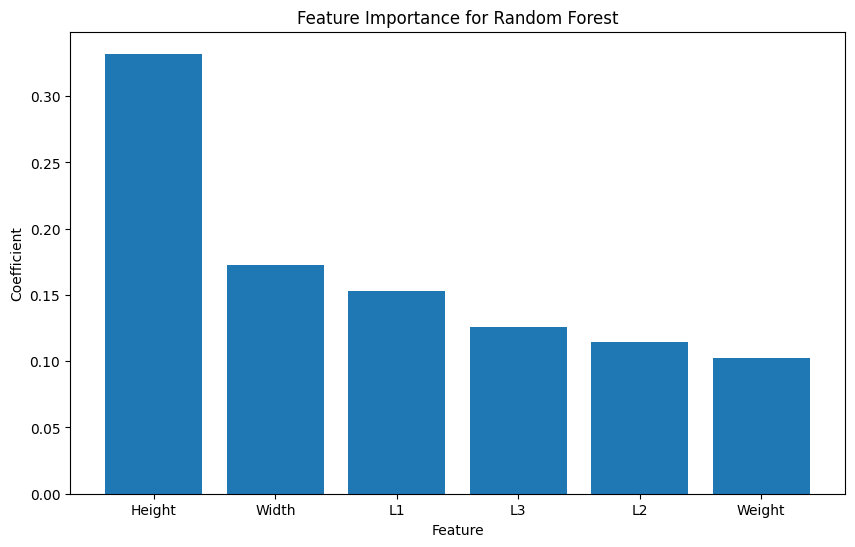

Neural Network
              precision    recall  f1-score   support

       Bream       0.91      0.98      0.95       120
       Perch       0.90      0.90      0.90        71
        Pike       1.00      0.94      0.97        50
       Roach       0.92      0.84      0.88        43
 SilverBream       0.98      0.93      0.95        45
       Smelt       0.98      0.95      0.96        42
   Whitewish       0.75      1.00      0.86         3

    accuracy                           0.94       374
   macro avg       0.92      0.94      0.92       374
weighted avg       0.94      0.94      0.94       374



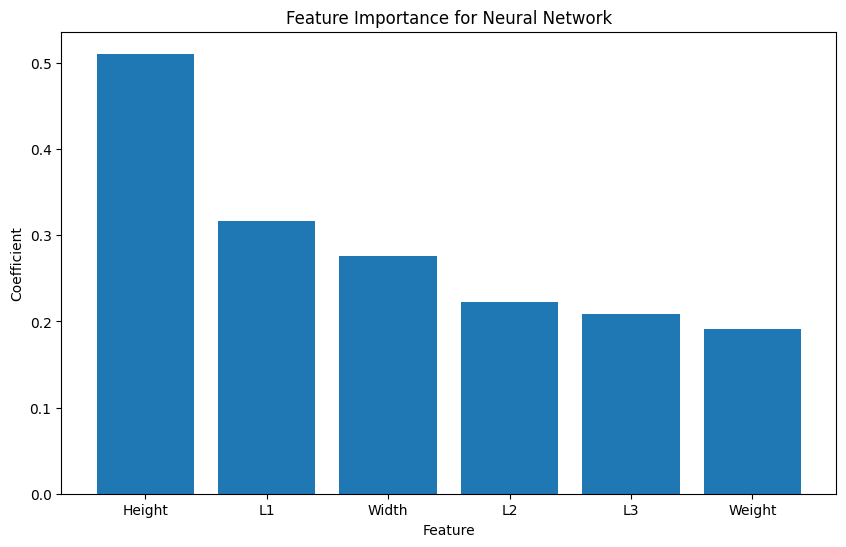

In [171]:

classifiers_feature_importance = {
    "Lasso":lasso_model,
    "Ridge":ridge_model,
    "ElasticNet":elasticnet_model,
    "Gradient Bosting": GradientBoostingClassifier(max_depth=10, n_estimators=200),
    "Support Vector Classifier": SVC(kernel='rbf'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5),
    "Random Forest": RandomForestClassifier(max_depth=30, n_estimators=200),
    "Neural Network": MLPClassifier(max_iter=10000, activation='relu',solver='adam')
}

n_iteration=5
feature_importance_list = {
    "Lasso":[],
    "Ridge":[],
    "ElasticNet":[],
    "Gradient Bosting": [],
    "Support Vector Classifier": [],
    "K-Nearest Neighbors": [],
    "Decision Tree": [],
    "Random Forest": [],
    "Neural Network": []
}
for name, clf in classifiers_feature_importance.items():
    print(name)
    feature = feature_importance_over_sampling( name,clf,0.8,fish_X,fish_y,n_iteration)
    feature_importance_list[name].append(feature)

Optimal number of features for Lasso: 6
Selected Features for Lasso:
['Weight' 'L1' 'L2' 'L3' 'Height' 'Width']
Optimal number of features for Ridge: 6
Selected Features for Ridge:
['Weight' 'L1' 'L2' 'L3' 'Height' 'Width']
Optimal number of features for ElasticNet: 6
Selected Features for ElasticNet:
['Weight' 'L1' 'L2' 'L3' 'Height' 'Width']
Optimal number of features for Gradient Boosting: 6
Selected Features for Gradient Boosting:
['Weight' 'L1' 'L2' 'L3' 'Height' 'Width']
Optimal number of features for Decision Tree: 5
Selected Features for Decision Tree:
['Weight' 'L1' 'L3' 'Height' 'Width']
Optimal number of features for Random Forest: 6
Selected Features for Random Forest:
['Weight' 'L1' 'L2' 'L3' 'Height' 'Width']


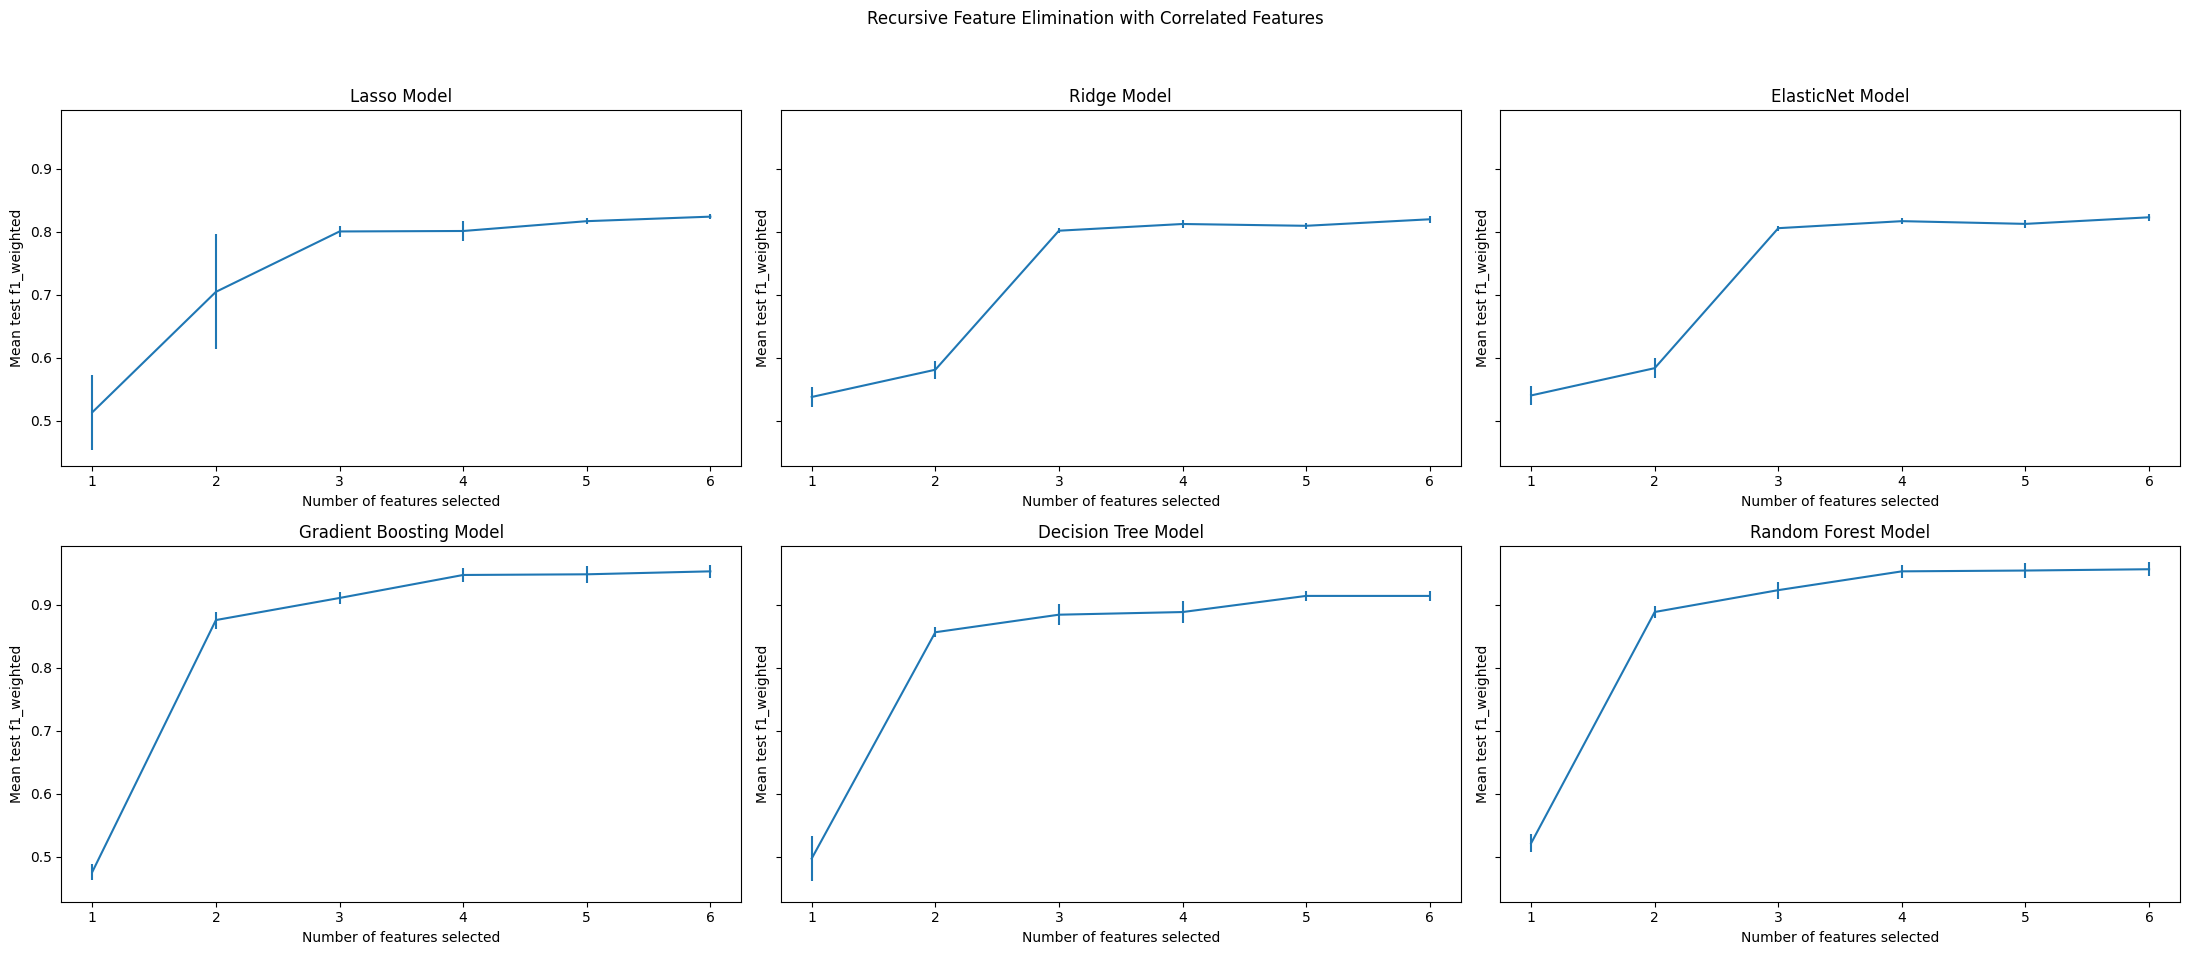

In [184]:
feature_selection_models = [lasso_model, ridge_model, elasticnet_model]
model_names = ["Lasso", "Ridge", "ElasticNet"]

# Additional classifiers
classifiers_feature_importance = {
    "Gradient Boosting": GradientBoostingClassifier(max_depth=10, n_estimators=200),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5),
    "Random Forest": RandomForestClassifier(max_depth=30, n_estimators=200),
}

# Combine all models
all_models = feature_selection_models + list(classifiers_feature_importance.values())
all_model_names = model_names + list(classifiers_feature_importance.keys())

# Set up the subplots
fig, axs = plt.subplots(2, 3, figsize=(22, 10), sharey=True)
axs = axs.ravel()  # Flatten the 2D array to easily iterate over it

min_features_to_select = 1  # Minimum number of features to consider
cv = StratifiedKFold(5)

for idx, (clf, model_name) in enumerate(zip(all_models, all_model_names)):
    rfecv = RFECV(
        estimator=clf,
        step=1,
        cv=cv,
        scoring="f1_weighted",
        min_features_to_select=min_features_to_select,
        n_jobs=2,
    )
    rfecv.fit(X_resampled, y_resampled)

    print(f"Optimal number of features for {model_name}: {rfecv.n_features_}")
    
    selected_features = np.array(feature_names)[rfecv.support_]
    print(f"Selected Features for {model_name}:")
    print(selected_features)

    cv_results = pd.DataFrame(rfecv.cv_results_)
    # Extract the number of features at each step
    n_features = list(range(min_features_to_select, len(cv_results) + min_features_to_select))

    axs[idx].errorbar(
        x=n_features,
        y=cv_results["mean_test_score"],
        yerr=cv_results["std_test_score"],
    )
    axs[idx].set_xlabel("Number of features selected")
    axs[idx].set_ylabel("Mean test f1_weighted")
    axs[idx].set_title(f"{model_name} Model")

plt.suptitle("Recursive Feature Elimination with Correlated Features")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [368]:
feature_importance_list



{'Gradient Bosting': [array([[0.06133607, 0.23368095, 0.04394866, 0.1927226 , 0.349707  ,
          0.11860471],
         [0.08149671, 0.13059008, 0.03949729, 0.30594621, 0.28593195,
          0.15653777],
         [0.05612448, 0.25054302, 0.06030607, 0.21321461, 0.2818428 ,
          0.13796902],
         [0.06432206, 0.12980116, 0.07247709, 0.30361332, 0.31119613,
          0.11859024],
         [0.05802495, 0.30558621, 0.03079595, 0.19486335, 0.2668335 ,
          0.14389603],
         [0.04533153, 0.14009094, 0.04305218, 0.33626547, 0.32558846,
          0.10967143],
         [0.05202135, 0.20459931, 0.02589924, 0.2919158 , 0.28144442,
          0.14411987],
         [0.05909914, 0.14880466, 0.17373982, 0.19824129, 0.28533546,
          0.13477964],
         [0.0584561 , 0.27385141, 0.05301769, 0.19955949, 0.27111988,
          0.14399543],
         [0.06489464, 0.25889865, 0.05221423, 0.17549632, 0.29419612,
          0.15430005]])],
 'Support Vector Classifier': [array([[0.075133

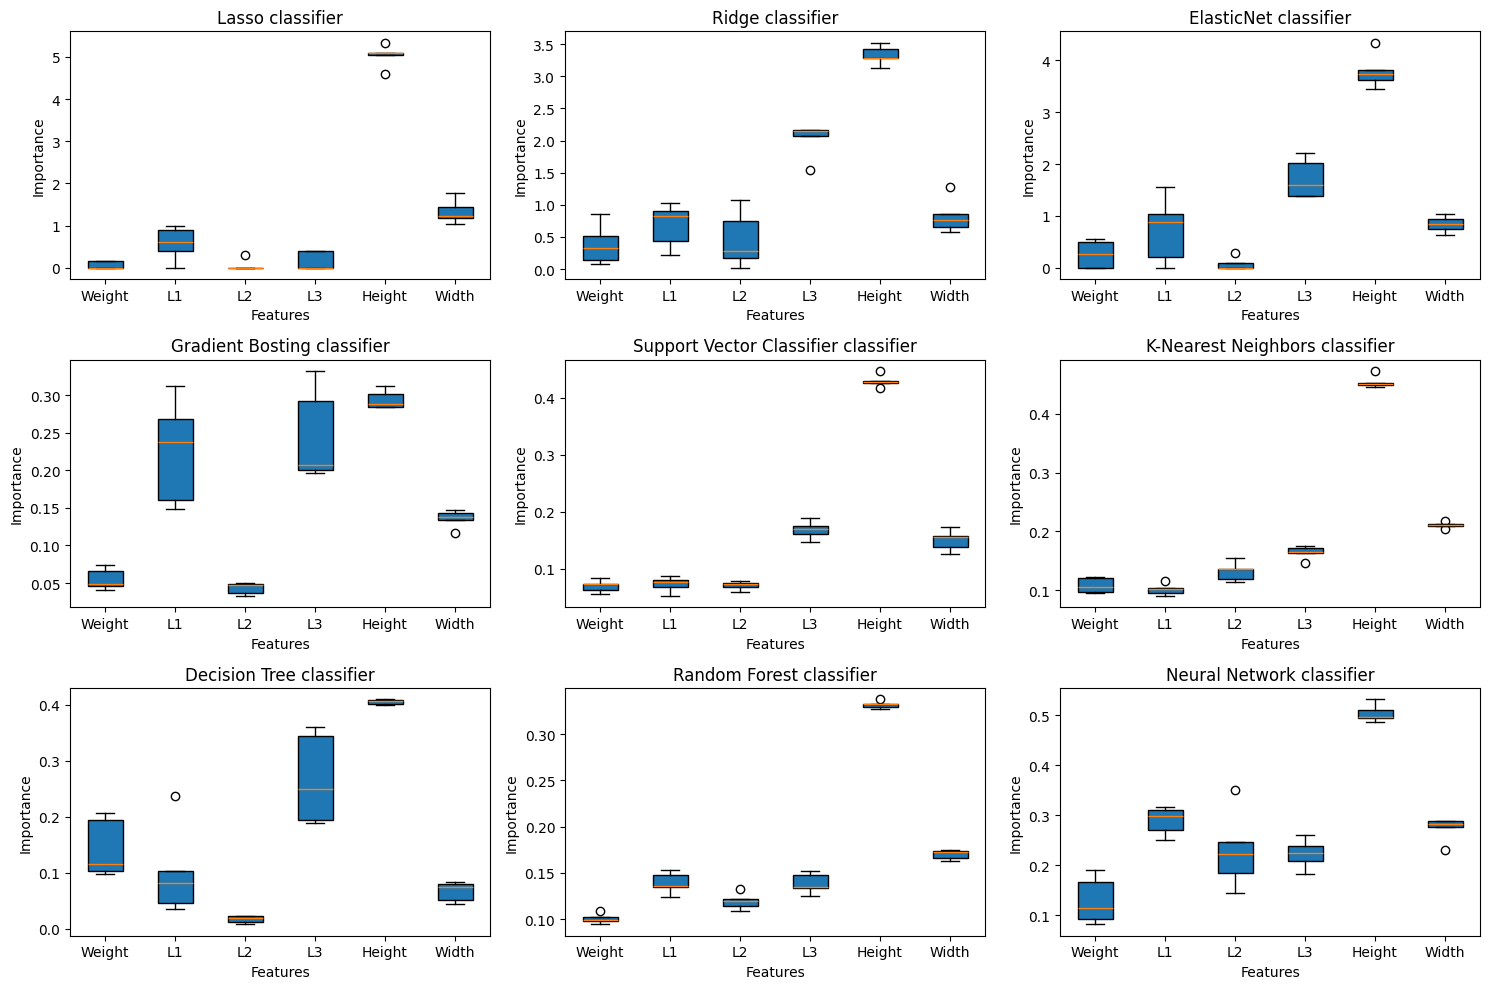

In [180]:
classifiers_feature_importance = {
    "Lasso":lasso_model,
    "Ridge":ridge_model,
    "ElasticNet":elasticnet_model,
    "Gradient Bosting": GradientBoostingClassifier(max_depth=10, n_estimators=200),
    "Support Vector Classifier": SVC(kernel='rbf'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5),
    "Random Forest": RandomForestClassifier(max_depth=30, n_estimators=200),
    "Neural Network": MLPClassifier(max_iter=10000, activation='relu',solver='adam')
}
# Set up the plot grid
n_row = 3
n_col = 3
plt.figure(figsize=(15, 10))
feature_list = ['Weight','L1','L2','L3','Height','Width']
# Plotting each classifier's feature importances
plt_idx = 1
for name, _ in classifiers_feature_importance.items():
    data = feature_importance_list[name][0]
    plt.subplot(n_row, n_col, plt_idx)
    plt.boxplot(data, vert=True, patch_artist=True)
    plt.title(f'{name} classifier')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(ticks=np.arange(1, len(feature_list)+1), labels=[f'{f}' for f in feature_list])
    plt_idx += 1

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

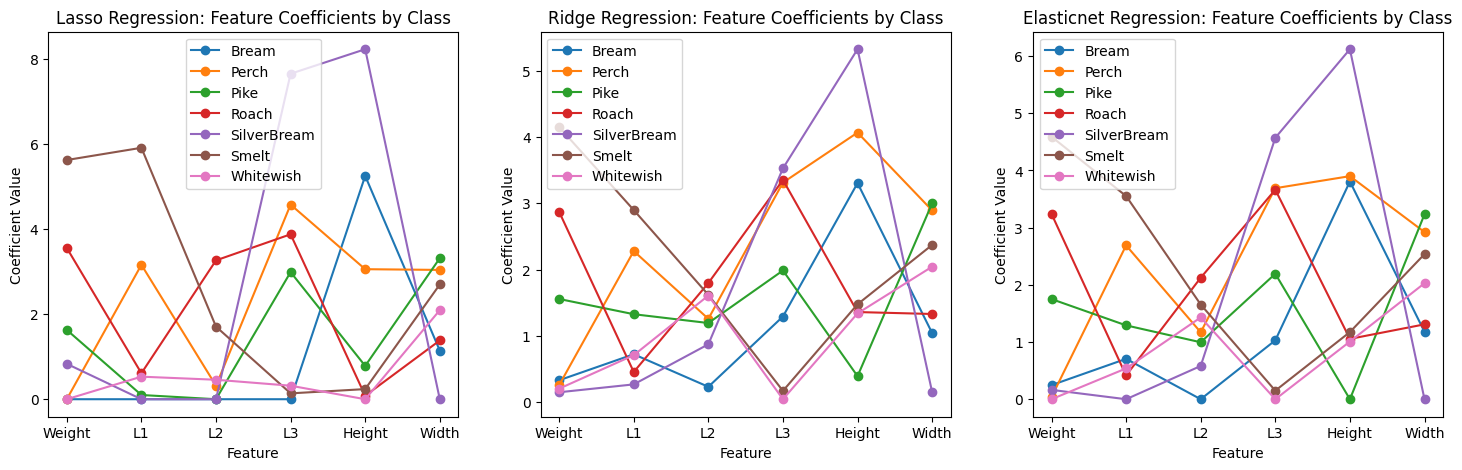

In [44]:
# Does this differ between the classes?
feature_names = fish_X.columns
class_labels = label_encoder.classes_
feature_selecton_model = {"Lasso":lasso_model, "Ridge":ridge_model, "Elasticnet":elasticnet_model}

n_row = 1
n_col = 3
plt.figure(figsize=(18,5))
plt_idx = 1
for name,model in feature_selecton_model.items():
    coefficients = np.abs(model.coef_)
    
    # Plot coefficients for each class
    for i, class_coef in enumerate(coefficients):
        plt.subplot(n_row, n_col, plt_idx)
        plt.plot(feature_names, class_coef, marker='o', label=f'{class_labels[i]}')
    plt.title(f"{name} Regression: Feature Coefficients by Class")
    plt.xlabel("Feature")
    plt.ylabel("Coefficient Value")
    plt.legend()
    plt_idx+=1
plt.show()

In [118]:
lasso_model.coef_.shape

(7, 56)

In [ ]:
label_encoder = LabelEncoder()
fish_y_encoded = label_encoder.fit_transform(fish_y)
class_labels = label_encoder.classes_
feature_selection_model = {"Lasso": lasso_model, "Ridge": ridge_model, "Elasticnet": elasticnet_model}

n_row = 1
n_col = 3
plt.figure(figsize=(22, 8))
plt_idx = 1

for name, model in feature_selection_model.items():
    coefficients = np.abs(model.coef_)

    # Create a DataFrame for the coefficients
    coef_df = pd.DataFrame(coefficients, columns=feature_names, index=class_labels)
    
    # Plot heatmap
    plt.subplot(n_row, n_col, plt_idx)
    ax = sns.heatmap(coef_df, annot=False, cmap='bwr', center=0, cbar=True)
    plt.title(f"{name} Regression: Feature Coefficients by Class")
    plt.xlabel("Feature")
    plt.ylabel("Class")
    
    # Ensure all cells, including zero values, are annotated
    for i in range(coef_df.shape[0]):
        for j in range(coef_df.shape[1]):
            text = coef_df.iloc[i, j]
            ax.text(j + 0.5, i + 0.5, f'{text:.2f}', 
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='black')
    
    plt_idx += 1

plt.tight_layout()
plt.show()

In [186]:
np.random.normal(0, 1, data.shape[0])

array([ 1.37917164,  1.01859477,  0.37831708, -0.81037824,  0.36799376])

# 1c Adding Features

In [523]:
# Function to add unrelated features
def add_unrelated_features(data, num_features):
    for i in range(num_features):
        data[f'unrelated_feature_{i+1}'] = np.random.normal(0, 1, data.shape[0])
    return data

# Function to add correlated features
def add_correlated_features(data, num_features):
    for i in range(num_features):
        correlated_feature = data.iloc[:, i % data.shape[1]] + np.random.normal(0, 0.1, data.shape[0])
        data[f'correlated_feature_{i+1}'] = correlated_feature
    return data


In [48]:
# Function to add new correlated features using specified methods
def add_correlated_features(data, num_features):
    new_features = data.copy()
    current_features = list(data.columns)
    
    for i in range(num_features):
        method = i % 4  # Cycle through 4 different methods
        
        if method == 0:
            # Linear combination
            new_feature_name = f'feature_{i+1}'
            base_feature1 = current_features[i % len(current_features)]
            base_feature2 = current_features[(i + 1) % len(current_features)]
            new_features[new_feature_name] = data[base_feature1] + data[base_feature2] + np.random.normal(0, 0.1, data.shape[0])
        
        elif method == 1:
            # Polynomial feature
            new_feature_name = f'feature_{i+1}'
            base_feature = current_features[i % len(current_features)]
            new_features[new_feature_name] = data[base_feature] ** 2 + np.random.normal(0, 0.1, data.shape[0])
        
        elif method == 2:
            # Add noise
            new_feature_name = f'feature_{i+1}'
            base_feature = current_features[i % len(current_features)]
            new_features[new_feature_name] = data[base_feature] + np.random.normal(0, 0.1, data.shape[0])
        
        elif method == 3:
            # Statistical transformation
            new_feature_name = f'feature_{i+1}'
            base_feature = current_features[i % len(current_features)]
            if np.any(data[base_feature] < 0):
                base_feature_data = np.abs(data[base_feature])  # Ensure all values are non-negative for log and sqrt
            else:
                base_feature_data = data[base_feature]
            if i % 4 == 0:
                new_features[new_feature_name] = np.log(base_feature_data + 1) + np.random.normal(0, 0.1, data.shape[0])
            elif i % 4 == 1:
                new_features[new_feature_name] = np.exp(base_feature_data) + np.random.normal(0, 0.1, data.shape[0])
            elif i % 4 == 2:
                new_features[new_feature_name] = np.sqrt(base_feature_data) + np.random.normal(0, 0.1, data.shape[0])
            else:
                new_features[new_feature_name] = np.log(base_feature_data + 1) + np.random.normal(0, 0.1, data.shape[0])
    
    return new_features


In [47]:
# Function to add unrelated features to the dataset
def add_unrelated_features(data, num_features):
    np.random.seed(42)  # For reproducibility
    new_features = data.copy()
    for i in range(num_features):
        unrelated_feature = np.random.normal(0, 1, data.shape[0])
        new_features[f'unrelated_feature_{i+1}'] = unrelated_feature
    return new_features

## Add correlated features

In [50]:
# Add 50 correlated features to the dataset
augmented_data = add_correlated_features(fish_X, 50)
augmented_data.head()

Weight         L1         L2         L3     Height      Width  \
1  170.530305  19.323169  22.913269  23.887829  25.233577  14.826372   
2  493.721354  28.299621  31.028229  34.917027  37.856243  13.675772   
3   33.657735  17.435741  18.072636  23.489747  26.765675  13.660683   
4  584.259843  32.491349  33.126297  39.298082  37.610853  13.622560   
5  970.375723  37.122510  39.817489  42.473488  29.878001  17.403387   

     feature_1    feature_2  feature_3  feature_4  ...  feature_41  \
1   189.812406   373.505213  23.016532   3.337725  ...   40.001454   
2   522.070629   800.992983  31.095962   3.591066  ...   51.637242   
3    51.073633   303.899148  18.244565   3.165493  ...   40.341126   
4   616.619636  1055.603776  33.020466   3.662664  ...   51.245173   
5  1007.379973  1378.070878  39.742053   3.837464  ...   47.177584   

   feature_42  feature_43  feature_44  feature_45   feature_46  feature_47  \
1  219.658514  170.586753    2.878882   46.809243   570.754357   25.226403   
2  187.021745  493.790877    3.533300   66.018911  1219.053888   37.838996   
3  186.835008   33.559719    2.873966   41.717205   551.820341   26.776606   
4  185.800358  584.149435    3.607228   72.489010  1544.307021   37.527122   
5  302.775582  970.382495    3.852970   82.426789  1803.949764   29.948882   

   feature_48   feature_49   feature_50  
1    2.793254   190.040427   373.095013  
2    2.713597   521.924291   800.822072  
3    2.736317    51.087231   304.065836  
4    2.749846   616.665118  1055.831328  
5    2.828098  1007.366502  1377.965189  

[5 rows x 56 columns]

In [51]:
# numbser of adding feature
n_adding_features = [1,5,10,15,20,25,40,50]
num_feature = 6 # number of original feature

num_iteration = 10

classifiers_sim = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10),
    "Support Vector Classifier": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(max_depth=30, n_estimators=200),
}
selection_sim = {
    'Lasso Logistic Regression': lasso_model,
    'Elasticnet Logistic Regression': elasticnet_model
}

# Correlated feature
performance_clf = {
    "K-Nearest Neighbors": [],
    "Support Vector Classifier": [],
    "Random Forest": [],
}

selection_feature_num = {
    'Lasso Logistic Regression': [],
    'Elasticnet Logistic Regression': []
}

conf_intervals = {
    "K-Nearest Neighbors": [],
    "Support Vector Classifier": [],
    "Random Forest": [],
}

for name, clf in classifiers_sim.items(): 
    print(clf)
    for n_feat_add in tqdm(n_adding_features):
        kappa_score_list = []
        for _ in range(num_iteration):
            X_train, X_test, y_train, y_test = train_test_split(augmented_data, fish_y, train_size=0.8)
            # Add new features
            X_train_aug = X_train.iloc[:,0:num_feature + n_feat_add]
            X_test_aug = X_test.iloc[:,0:num_feature + n_feat_add]
            # Standardize the features
            
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_aug)
            X_test_scaled = scaler.transform(X_test_aug)
            
            # Initialize SMOTE
            smote = SMOTE()
            X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)
            # Fit the model   
            clf.fit(X_resampled, y_resampled)

            # Predict on the test set
            y_pred = clf.predict(X_test_scaled)
            
            # Classification performance 
            kappa_score = cohen_kappa_score(y_test, y_pred)
            kappa_score_list.append(kappa_score)
        
        # Calculate mean and standard deviation
        kappa_score_mean = np.mean(kappa_score_list)
        kappa_score_std = np.std(kappa_score_list)
        conf_interval = 1.96 * kappa_score_std / np.sqrt(num_iteration)
        
        # Store results
        performance_clf[name].append(kappa_score_mean)
        conf_intervals[name].append(conf_interval)
        
                 

KNeighborsClassifier(n_neighbors=10)


100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


SVC()


100%|██████████| 8/8 [00:22<00:00,  2.79s/it]


RandomForestClassifier(max_depth=30, n_estimators=200)


100%|██████████| 8/8 [07:48<00:00, 58.52s/it]


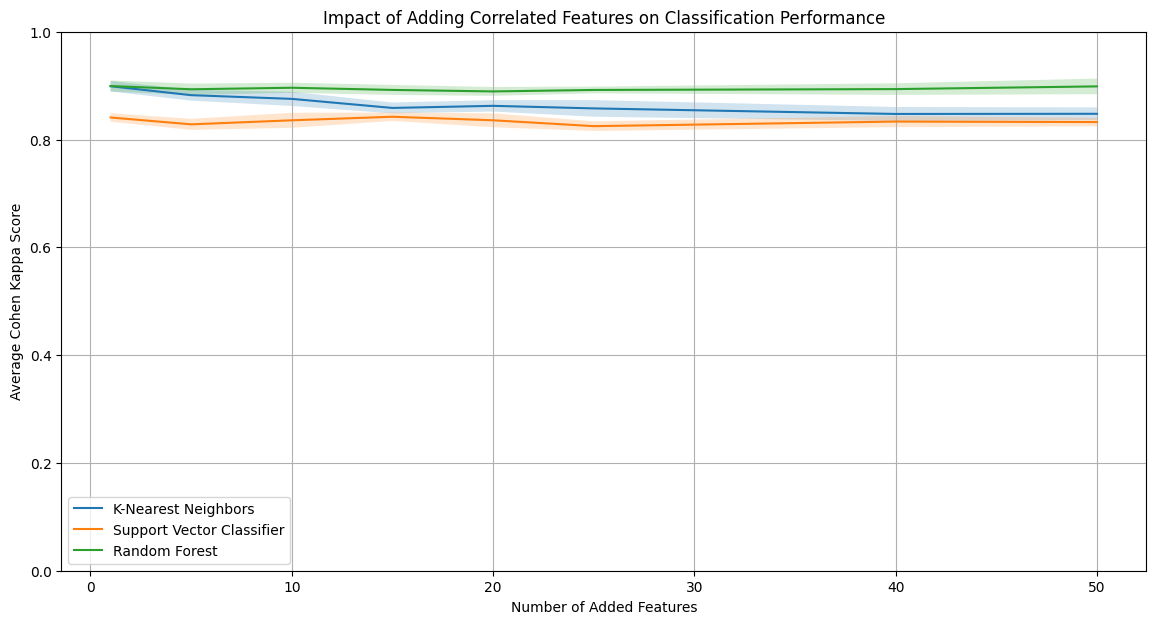

In [59]:
# Plotting classification performance with confidence intervals
plt.figure(figsize=(14, 7))
for name, scores in performance_clf.items():
    plt.plot(n_adding_features, scores, label=name)
    conf = conf_intervals[name]
    plt.fill_between(n_adding_features, np.array(scores) - np.array(conf), np.array(scores) + np.array(conf), alpha=0.2)
plt.xlabel('Number of Added Features')
plt.ylabel('Average Cohen Kappa Score')
plt.title('Impact of Adding Correlated Features on Classification Performance')
plt.legend()
plt.ylim(0,1)
plt.grid(True)
plt.show()

In [52]:
# Simulation parameters
n_adding_features = [1,5,10,15,20,25,40,50]
step_size = 10
num_iterations = 10

selection_feature_num = {
    'Lasso Logistic Regression': [],
    'Elasticnet Logistic Regression': []
}
# Perform feature selection simulation
for sel_name, sel in selection_sim.items():
    print(sel_name)
    for n_feat_add in tqdm(n_adding_features):
        
        selected_features_count = []
        for _ in range(num_iterations):
            X_train, X_test, y_train, y_test = train_test_split(augmented_data, fish_y, train_size=0.8)

            # Add new features
            X_train_aug = X_train.iloc[:,0:num_feature + n_feat_add]
            X_test_aug = X_test.iloc[:,0:num_feature + n_feat_add]
            # Standardize the features

            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_aug)
            X_test_scaled = scaler.transform(X_test_aug)
            
            # Initialize SMOTE
            smote = SMOTE()
            X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

            sel.fit(X_resampled, y_resampled)
            
            coefficients = np.abs(sel.coef_[0])
            selected_features = coefficients > 0
            num_selected_features = np.sum(selected_features)
            selected_features_count.append(num_selected_features)

        mean_selected_features = np.mean(selected_features_count)
        std_selected_features = np.std(selected_features_count)
        confidence_interval = (
            mean_selected_features - 1.96 * std_selected_features / np.sqrt(num_iterations),
            mean_selected_features + 1.96 * std_selected_features / np.sqrt(num_iterations)
        )
        
        selection_feature_num[sel_name].append((mean_selected_features, confidence_interval))



Lasso Logistic Regression


100%|██████████| 8/8 [22:09<00:00, 166.22s/it]


Elasticnet Logistic Regression


100%|██████████| 8/8 [07:17<00:00, 54.74s/it]


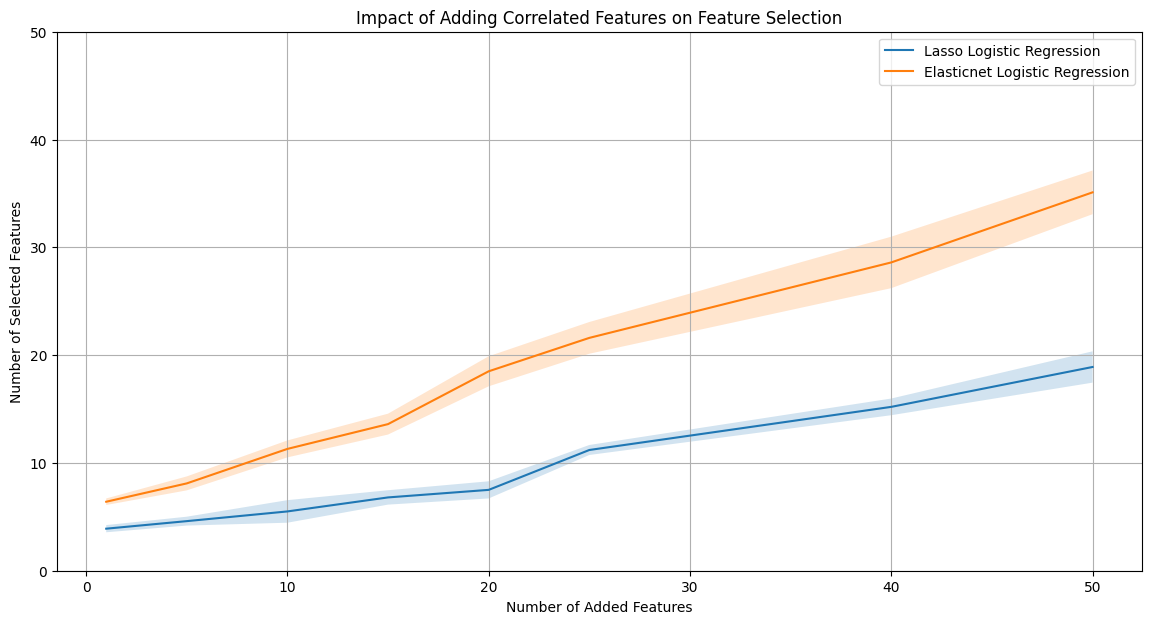

In [185]:
# Plotting the results
plt.figure(figsize=(14, 7))
for sel_name, results in selection_feature_num.items():
    mean_selected_features = [res[0] for res in results]
    lower_bound = [res[1][0] for res in results]
    upper_bound = [res[1][1] for res in results]
    
    plt.plot(n_adding_features, mean_selected_features, label=sel_name)
    plt.fill_between(n_adding_features, lower_bound, upper_bound, alpha=0.2)

plt.xlabel('Number of Added Features')
plt.ylabel('Number of Selected Features')
plt.title('Impact of Adding Correlated Features on Feature Selection')
plt.legend()
plt.ylim(0,50)
plt.grid(True)
plt.show()


## Add unrelated features

In [54]:
augmented_data_unrelated = add_unrelated_features(fish_X,50)
augmented_data_unrelated.head()

Weight         L1         L2         L3     Height      Width  \
1  170.530305  19.323169  22.913269  23.887829  25.233577  14.826372   
2  493.721354  28.299621  31.028229  34.917027  37.856243  13.675772   
3   33.657735  17.435741  18.072636  23.489747  26.765675  13.660683   
4  584.259843  32.491349  33.126297  39.298082  37.610853  13.622560   
5  970.375723  37.122510  39.817489  42.473488  29.878001  17.403387   

   unrelated_feature_1  unrelated_feature_2  unrelated_feature_3  \
1             0.496714             1.032546            -2.018488   
2            -0.138264             1.126705             0.145064   
3             0.647689            -1.090966             0.793176   
4             1.523030            -0.410814            -0.122057   
5            -0.234153            -1.105705            -0.457848   

   unrelated_feature_4  ...  unrelated_feature_41  unrelated_feature_42  \
1             0.113394  ...              0.724892             -1.355076   
2             0.458994  ...             -1.060821              0.758334   
3            -0.188202  ...              0.407482              1.005850   
4            -0.103587  ...             -1.788559              1.971346   
5            -0.213875  ...              0.071089              2.423541   

   unrelated_feature_43  unrelated_feature_44  unrelated_feature_45  \
1             -1.303815             -1.095280             -0.040651   
2             -0.871618             -1.706377              1.646878   
3             -0.130639             -0.597994              0.347955   
4             -1.894095              0.048710              0.023545   
5              0.085469             -0.708750              0.909453   

   unrelated_feature_46  unrelated_feature_47  unrelated_feature_48  \
1              1.177086              1.133184             -0.447398   
2             -0.018976              1.261291              0.078370   
3             -0.150088              0.049221              0.676529   
4             -1.123912             -0.239188              1.090454   
5             -0.209873             -1.544780              1.551541   

   unrelated_feature_49  unrelated_feature_50  
1             -1.221831             -0.489136  
2             -0.081986             -0.559591  
3             -0.908497             -0.782348  
4              1.116051             -1.385410  
5             -1.854376             -2.102754  

[5 rows x 56 columns]

In [55]:
# Unrrelated feature
performance_clf_unrelated = {
    "K-Nearest Neighbors": [],
    "Support Vector Classifier": [],
    "Random Forest": [],
}

selection_feature_num_unrelated = {
    'Lasso Logistic Regression': [],
    'Elasticnet Logistic Regression': []
}

conf_intervals_unrelated = {
    "K-Nearest Neighbors": [],
    "Support Vector Classifier": [],
    "Random Forest": [],
}

for name, clf in classifiers_sim.items(): 
    print(clf)
    for n_feat_add in tqdm(n_adding_features):
        kappa_score_list = []
        for _ in range(num_iteration):
            X_train, X_test, y_train, y_test = train_test_split(augmented_data_unrelated, fish_y, train_size=0.8)
            # Add new features
            X_train_aug = X_train.iloc[:,0:num_feature + n_feat_add]
            X_test_aug = X_test.iloc[:,0:num_feature + n_feat_add]
            # Standardize the features
            
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_aug)
            X_test_scaled = scaler.transform(X_test_aug)
            
            # Initialize SMOTE
            smote = SMOTE()
            X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)
            # Fit the model   
            clf.fit(X_resampled, y_resampled)

            # Predict on the test set
            y_pred = clf.predict(X_test_scaled)
            
            # Classification performance 
            kappa_score = cohen_kappa_score(y_test, y_pred)
            kappa_score_list.append(kappa_score)
        
        # Calculate mean and standard deviation
        kappa_score_mean = np.mean(kappa_score_list)
        kappa_score_std = np.std(kappa_score_list)
        conf_interval = 1.96 * kappa_score_std / np.sqrt(num_iteration)
        
        # Store results
        performance_clf_unrelated[name].append(kappa_score_mean)
        conf_intervals_unrelated[name].append(conf_interval)
        

KNeighborsClassifier(n_neighbors=10)


100%|██████████| 8/8 [00:06<00:00,  1.17it/s]


SVC()


100%|██████████| 8/8 [00:39<00:00,  4.91s/it]


RandomForestClassifier(max_depth=30, n_estimators=200)


100%|██████████| 8/8 [09:11<00:00, 68.95s/it]


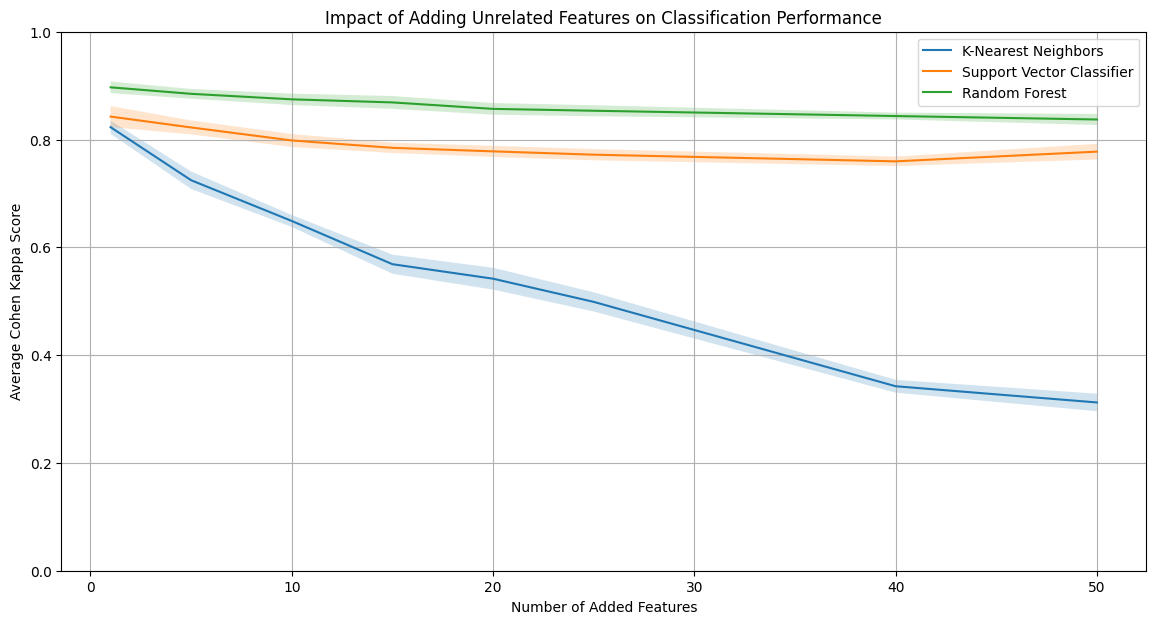

In [56]:
# Plotting classification performance with confidence intervals
plt.figure(figsize=(14, 7))
for name, scores in performance_clf_unrelated.items():
    plt.plot(n_adding_features, scores, label=name)
    conf = conf_intervals_unrelated[name]
    plt.fill_between(n_adding_features, np.array(scores) - np.array(conf), np.array(scores) + np.array(conf), alpha=0.2)
plt.xlabel('Number of Added Features')
plt.ylabel('Average Cohen Kappa Score')
plt.title('Impact of Adding Unrelated Features on Classification Performance')
plt.legend()
plt.grid(True)
plt.ylim(0,1)
plt.show()

In [57]:
# Simulation parameters
n_adding_features = [1,5,10,15,20,25,40,50]
step_size = 10
num_iterations = 10

selection_feature_num_unrelated = {
    'Lasso Logistic Regression': [],
    'Elasticnet Logistic Regression': []
}
# Perform feature selection simulation
for sel_name, sel in selection_sim.items():
    print(sel_name)
    for n_feat_add in tqdm(n_adding_features):
        
        selected_features_count = []
        for _ in range(num_iterations):
            X_train, X_test, y_train, y_test = train_test_split(augmented_data_unrelated, fish_y, train_size=0.8)

            # Add new features
            X_train_aug = X_train.iloc[:,0:num_feature + n_feat_add]
            X_test_aug = X_test.iloc[:,0:num_feature + n_feat_add]
            # Standardize the features

            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_aug)
            X_test_scaled = scaler.transform(X_test_aug)
            
            # Initialize SMOTE
            smote = SMOTE()
            X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

            sel.fit(X_resampled, y_resampled)
            
            coefficients = np.abs(sel.coef_[0])
            selected_features = coefficients > 0
            num_selected_features = np.sum(selected_features)
            selected_features_count.append(num_selected_features)

        mean_selected_features = np.mean(selected_features_count)
        std_selected_features = np.std(selected_features_count)
        confidence_interval = (
            mean_selected_features - 1.96 * std_selected_features / np.sqrt(num_iterations),
            mean_selected_features + 1.96 * std_selected_features / np.sqrt(num_iterations)
        )
        
        selection_feature_num_unrelated[sel_name].append((mean_selected_features, confidence_interval))



Lasso Logistic Regression


100%|██████████| 8/8 [06:57<00:00, 52.17s/it]


Elasticnet Logistic Regression


100%|██████████| 8/8 [02:11<00:00, 16.42s/it]


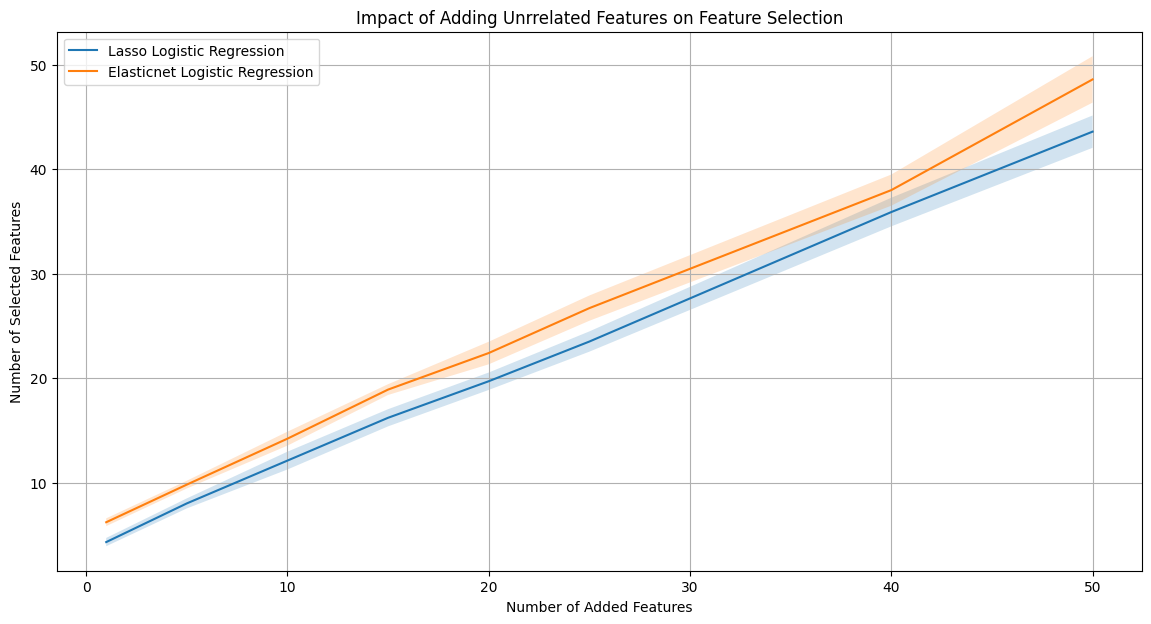

In [58]:
# Plotting the results
plt.figure(figsize=(14, 7))
for sel_name, results in selection_feature_num_unrelated.items():
    mean_selected_features = [res[0] for res in results]
    lower_bound = [res[1][0] for res in results]
    upper_bound = [res[1][1] for res in results]
    
    plt.plot(n_adding_features, mean_selected_features, label=sel_name)
    plt.fill_between(n_adding_features, lower_bound, upper_bound, alpha=0.2)

plt.xlabel('Number of Added Features')
plt.ylabel('Number of Selected Features')
plt.title('Impact of Adding Unrrelated Features on Feature Selection')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt_idx = 1

# 1d Classification with confidence and mislabeled data

In [190]:
classifiers = {
    "Gradient Bosting": GradientBoostingClassifier(max_depth=10, n_estimators=200),
    "Support Vector Classifier": SVC(kernel='rbf',probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5),
    "Random Forest": RandomForestClassifier(max_depth=30, n_estimators=200),
    "Neural Network": MLPClassifier(max_iter=10000, activation='relu',solver='adam')
}

In [63]:
prob_predictions = {}
class_labels = label_encoder.classes_

probability_threshold = 0.5
# Split the dataset

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(fish_X)

# Train classifiers and collect predictions and performance
prob_predictions = {}
pred_clf = {}
performance_clf ={}
performance_clf_prob = {}
clf_mismatches = {}

for name, clf in tqdm(classifiers.items()):
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(fish_X, fish_y, train_size=0.8)
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize SMOTE
    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

    # Train model
    clf.fit(X_resampled, y_resampled)

    # Prediction with probability
    y_prob = clf.predict_proba(X_scaled)
    y_pred = np.argmax(y_prob, axis=1)

    predicted_labels = [class_labels[label] for label in y_pred]
    prob_predictions[name] = predicted_labels
    
    # Identify mismatches
    mismatches = []
    for i, (pred_label, true_label, prob) in enumerate(zip(predicted_labels, fish_y, y_prob)):
        max_prob = np.max(prob)
        if pred_label != true_label and max_prob > probability_threshold:
            mismatches.append(i)

    # Store mismatches if not empty
    if len(mismatches) > 0:
        clf_mismatches[name] = set(mismatches)
   


100%|██████████| 6/6 [01:15<00:00, 12.61s/it]


In [64]:
# Find common mispredicted observations
if clf_mismatches:
    common_mismatches = set.intersection(*clf_mismatches.values())
    common_mismatches = list(common_mismatches)
else:
    common_mismatches = []
common_mismatches

[1091,
 612,
 1061,
 1507,
 955,
 1706,
 333,
 1582,
 655,
 1302,
 310,
 632,
 953,
 1112,
 1564,
 447]

In [191]:
# Assuming you have a label encoder object used to encode the labels
label_encoder = LabelEncoder()
fish_y_encoded = label_encoder.fit_transform(fish_y)
class_labels = label_encoder.classes_

# Split the data
X_train, X_test, y_train, y_test = train_test_split(fish_X, fish_y_encoded, test_size=0.2, random_state=42)

# Reset the index of y_test to ensure it's aligned
y_test = pd.Series(y_test).reset_index(drop=True)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Define a confidence threshold
confidence_threshold = 0.8

# Store results for each classifier
results = {}

for name, clf in tqdm(classifiers.items()):
    # Create a pipeline with scaling, SMOTE, and classifier
    pipeline = Pipeline([
        ('scaler', scaler),
        ('smote', smote),
        ('classifier', clf)
    ])
    
    # Perform cross-validation and get cross-validated predictions and probabilities
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_pred = cross_val_predict(pipeline, fish_X, fish_y_encoded, cv=skf)
    y_proba = cross_val_predict(pipeline, fish_X, fish_y_encoded, cv=skf, method='predict_proba')
    
    # Determine confident and set predictions
    confident_predictions = []
    set_predictions = []
    mislabeled_high_confidence = []

    for i, prob in enumerate(y_proba):
        max_prob = np.max(prob)
        predicted_class = np.argmax(prob)
        actual_class = fish_y_encoded[i]

        if max_prob > confidence_threshold:
            confident_predictions.append((i, predicted_class, max_prob, actual_class))
            if predicted_class != actual_class:
                mislabeled_high_confidence.append((i, predicted_class, max_prob, actual_class))
        else:
            set_predictions.append(np.argsort(prob)[::-1])  # Classes sorted by probability

    # Confusion matrix analysis
    conf_matrix = confusion_matrix(fish_y_encoded, y_pred)
    
    # Map numerical labels to their class names
    mislabeled_high_confidence_named = [(index, class_labels[predicted], confidence, class_labels[actual])
                                        for index, predicted, confidence, actual in mislabeled_high_confidence]
    
    # Store results for the current classifier
    results[name] = {
        "Confident Predictions": len(confident_predictions),
        "Set Predictions": len(set_predictions),
        "Confusion Matrix": conf_matrix,
        "Mislabeled High Confidence": mislabeled_high_confidence_named
    }



100%|██████████| 6/6 [13:42<00:00, 137.11s/it]


In [680]:
# Output the results for each classifier
for name, result in results.items():
    print(f"\nClassifier: {name}")
    print(f"Confident predictions: {result['Confident Predictions']}")
    print(f"Set predictions: {result['Set Predictions']}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print(f"Mislabeled observations with high confidence: {len(result['Mislabeled High Confidence'])}")
    if result['Mislabeled High Confidence']:
        print(f"Mislabeled High Confidence (index, predicted, confidence, actual):")
        df_mislabeled = pd.DataFrame(result['Mislabeled High Confidence'], columns=["Index", "Predicted", "Confidence", "Actual"])
        print(df_mislabeled.head())


Classifier: Gradient Bosting
Confident predictions: 1824
Set predictions: 42
Confusion Matrix:
[[525   4   1   1   7   1   3]
 [ 15 308   0  44   0   0   7]
 [  7   0 229   0   0   0   0]
 [  4  32   0 171   0   0   5]
 [ 11   1   0   0 230   0   0]
 [  6   0   0   0   0 213   0]
 [  2   4   0   5   0   0  30]]
Mislabeled observations with high confidence: 144
Mislabeled High Confidence (index, predicted, confidence, actual):
   Index Predicted  Confidence Actual
0     28     Roach    0.999998  Perch
1     44     Perch    0.803563  Roach
2     69     Perch    1.000000  Roach
3     70     Perch    0.865960  Roach
4     75     Roach    0.999999  Perch

Classifier: Support Vector Classifier
Confident predictions: 1480
Set predictions: 386
Confusion Matrix:
[[514   0   0   0  28   0   0]
 [ 12 245   0  74   3   1  39]
 [  5   0 229   0   2   0   0]
 [  4  26   0 147   0   0  35]
 [  8   0   0   0 234   0   0]
 [  6   0   0   0   0 213   0]
 [  2   1   0   0   0   0  38]]
Mislabeled observ

Gradient Bosting


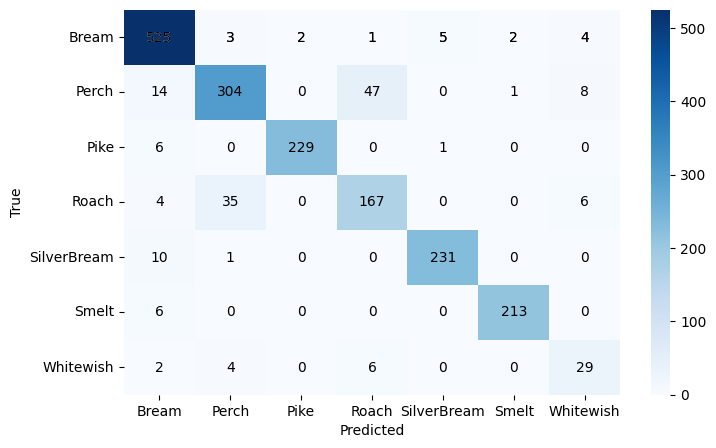

Support Vector Classifier


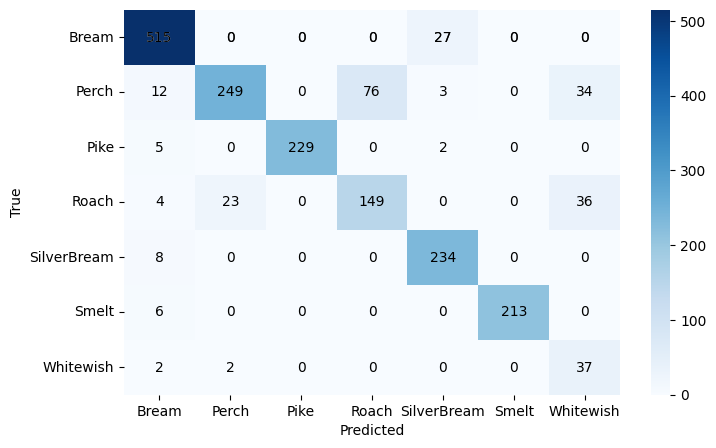

K-Nearest Neighbors


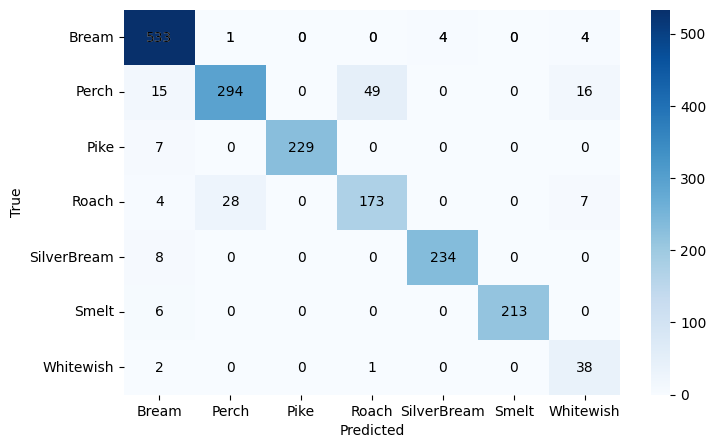

Decision Tree


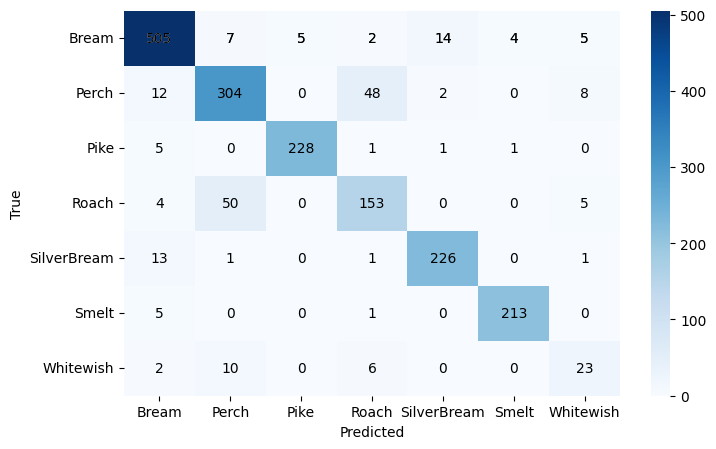

Random Forest


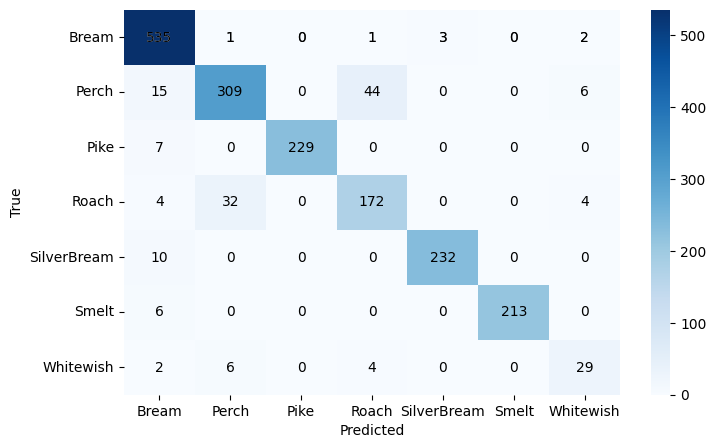

Neural Network


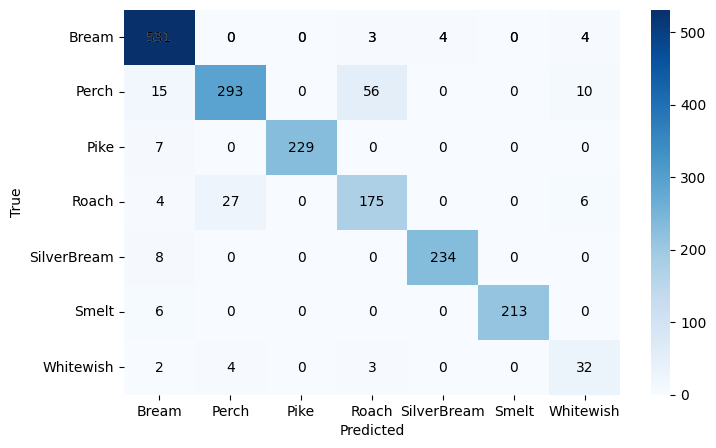

In [193]:
confusion_matrix_avg=[]
for name, result in results.items():
    print(name)
    confusion_matrix_avg+=result['Confusion Matrix']
plot_confusion_matrix(confusion_matrix_avg/6)

In [196]:
# Initialize a list to hold sets of mislabeled high confidence indices
all_mislabeled_high_confidence = []

# Iterate through the results to collect mislabeled high confidence indices
for name, result in results.items():
    mislabeled_high_confidence = result["Mislabeled High Confidence"]
    mislabeled_indices = set([x[0] for x in mislabeled_high_confidence])
    all_mislabeled_high_confidence.append(mislabeled_indices)

# Identify mislabeled high confidence that appear in all classifiers
common_mislabeled_indices = set.intersection(*all_mislabeled_high_confidence)

# Print common mislabeled high confidence instances
common_mislabeled_high_confidence = [(index, class_labels[fish_y_encoded[index]]) for index in common_mislabeled_indices]
print("Common Mislabeled High Confidence Instances Across All Classifiers:")
for item in common_mislabeled_high_confidence:
    print(item)

# Calculate the average confusion matrix
confusion_matrix_avg = np.zeros_like(next(iter(results.values()))["Confusion Matrix"])

for result in results.values():
    confusion_matrix_avg += result["Confusion Matrix"]

confusion_matrix_avg = confusion_matrix_avg / len(results)

print("Average Confusion Matrix:")
print(confusion_matrix_avg)

Common Mislabeled High Confidence Instances Across All Classifiers:
(388, 'Roach')
(1415, 'Roach')
(655, 'Perch')
(1552, 'Smelt')
(659, 'Perch')
(1555, 'Perch')
(1048, 'Pike')
(926, 'Roach')
(672, 'Roach')
(1706, 'Pike')
(302, 'Perch')
(947, 'Perch')
(1462, 'SilverBream')
(1339, 'Pike')
(955, 'Perch')
(1596, 'SilverBream')
(447, 'Smelt')
(1091, 'Perch')
(1603, 'Smelt')
(1101, 'Perch')
(1495, 'Smelt')
(1112, 'SilverBream')
(1507, 'Perch')
(1642, 'Smelt')
(118, 'Pike')
Average Confusion Matrix:
[[5.24000000e+02 2.00000000e+00 1.16666667e+00 1.16666667e+00
  9.50000000e+00 1.00000000e+00 3.16666667e+00]
 [1.38333333e+01 2.92166667e+02 0.00000000e+00 5.33333333e+01
  8.33333333e-01 1.66666667e-01 1.36666667e+01]
 [6.16666667e+00 0.00000000e+00 2.28833333e+02 1.66666667e-01
  6.66666667e-01 1.66666667e-01 0.00000000e+00]
 [4.00000000e+00 3.25000000e+01 0.00000000e+00 1.64833333e+02
  0.00000000e+00 0.00000000e+00 1.06666667e+01]
 [9.50000000e+00 3.33333333e-01 0.00000000e+00 1.66666667e-01


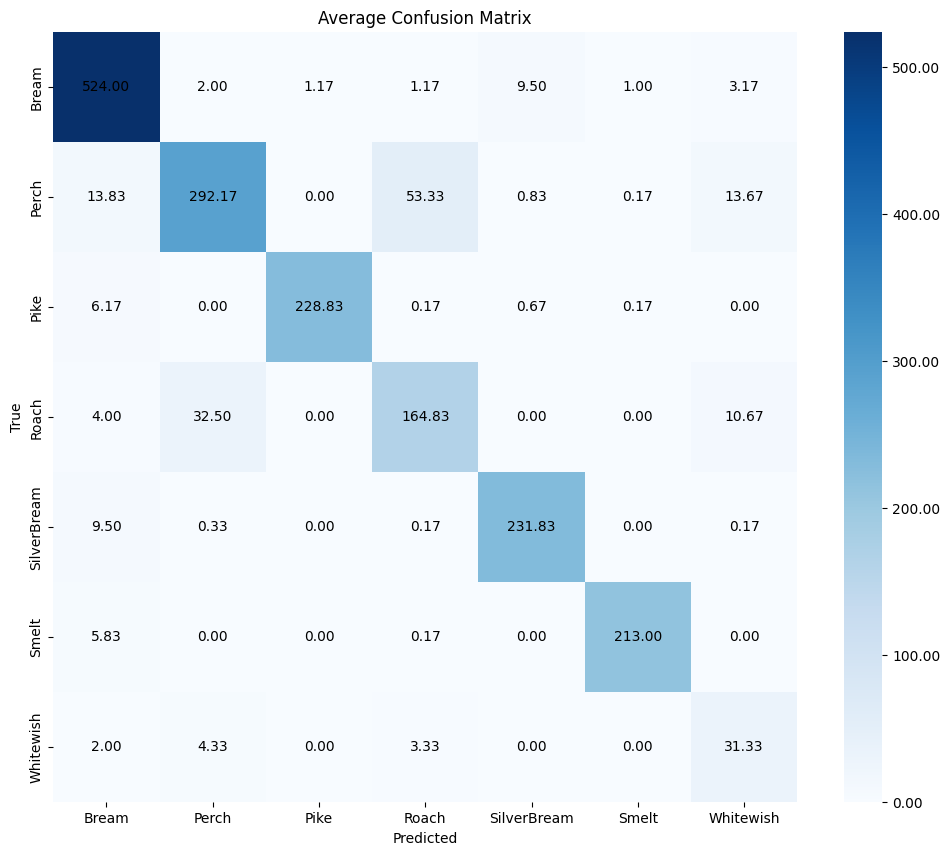

In [217]:
# Create a DataFrame for the confusion matrix
conf_df = pd.DataFrame(confusion_matrix_avg, columns=class_labels, index=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))  # Increase the figure size
sns.heatmap(conf_df, annot=False, fmt='.2f', cmap='Blues', cbar_kws={'format': '%.2f'}, annot_kws={"size": 12})

# Ensure all cells including zero values are annotated
for i in range(confusion_matrix_avg.shape[0]):
    for j in range(confusion_matrix_avg.shape[1]):
        plt.text(j + 0.5, i + 0.5, f'{confusion_matrix_avg[i, j]:.2f}', 
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()

In [218]:
common_mislabeled_high_confidence

[(388, 'Roach'),
 (1415, 'Roach'),
 (655, 'Perch'),
 (1552, 'Smelt'),
 (659, 'Perch'),
 (1555, 'Perch'),
 (1048, 'Pike'),
 (926, 'Roach'),
 (672, 'Roach'),
 (1706, 'Pike'),
 (302, 'Perch'),
 (947, 'Perch'),
 (1462, 'SilverBream'),
 (1339, 'Pike'),
 (955, 'Perch'),
 (1596, 'SilverBream'),
 (447, 'Smelt'),
 (1091, 'Perch'),
 (1603, 'Smelt'),
 (1101, 'Perch'),
 (1495, 'Smelt'),
 (1112, 'SilverBream'),
 (1507, 'Perch'),
 (1642, 'Smelt'),
 (118, 'Pike')]

In [219]:
all_mislabeled_high_confidence = []
mislabeled_details = []

# Iterate through the results to collect mislabeled high confidence indices
for name, result in results.items():
    mislabeled_high_confidence = result["Mislabeled High Confidence"]
    mislabeled_indices = set([x[0] for x in mislabeled_high_confidence])
    all_mislabeled_high_confidence.append(mislabeled_indices)
    
    # Collect details for all mislabeled instances
    for index, predicted, confidence, actual in mislabeled_high_confidence:
        mislabeled_details.append({
            "Index": index,
            "Predicted": predicted,
            "Confidence": confidence,
            "Actual": actual
        })

# Identify mislabeled high confidence that appear in all classifiers
common_mislabeled_indices = set.intersection(*all_mislabeled_high_confidence)

# Filter the details to only include common mislabeled instances
common_mislabeled_details = [detail for detail in mislabeled_details if detail["Index"] in common_mislabeled_indices]

# Create a DataFrame for better visualization
df_common_mislabeled = pd.DataFrame(common_mislabeled_details).drop_duplicates(subset=["Index"])

# Display the DataFrame
print(df_common_mislabeled)

    Index Predicted  Confidence       Actual
0     118     Bream    0.999474         Pike
1     302     Bream    1.000000        Perch
2     388     Bream    1.000000        Roach
3     447     Bream    1.000000        Smelt
4     655     Bream    1.000000        Perch
5     659     Roach    1.000000        Perch
6     672     Bream    1.000000        Roach
7     926     Perch    1.000000        Roach
8     947     Bream    1.000000        Perch
9     955     Roach    1.000000        Perch
10   1048     Bream    0.999999         Pike
11   1091     Roach    0.999990        Perch
12   1101     Bream    1.000000        Perch
13   1112     Bream    1.000000  SilverBream
14   1339     Bream    1.000000         Pike
15   1415     Perch    1.000000        Roach
16   1462     Bream    1.000000  SilverBream
17   1495     Bream    1.000000        Smelt
18   1507     Bream    1.000000        Perch
19   1552     Bream    1.000000        Smelt
20   1555     Bream    1.000000        Perch
21   1596 